Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf

# !pip install tensorflow==2.15.0


print(tf.__version__)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())



2.15.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8804258783734416696
xla_global_id: -1
]


In [ ]:
# >>>>>>> 1st load the dataset
##NEW unzip the dataset and move to the right folder - colab may not the data , so you may have to do this everytime
# unzip the files
!unzip /content/drive/MyDrive/IDS-Research/CICDDOS_2019_Full/CSV-03-11.zip -d /content/drive/MyDrive/IDS-Research/CICDDOS_2019_Full
# # !pwd
!mv /content/drive/MyDrive/IDS-Research/CICDDOS_2019_Full/03-11/* /content/drive/MyDrive/IDS-Research/CICDDOS2019/
# !ls /content/drive/MyDrive/IDS-Research/CICDDOS2019/
# !rm -r /content/gdrive/MyDrive/IDS-Research/CICDDOS2019/.ipynb_checkpoints/*

unzip:  cannot find or open /content/drive/MyDrive/IDS-Research/CICDDOS_2019_Full/CSV-03-11.zip, /content/drive/MyDrive/IDS-Research/CICDDOS_2019_Full/CSV-03-11.zip.zip or /content/drive/MyDrive/IDS-Research/CICDDOS_2019_Full/CSV-03-11.zip.ZIP.
mv: cannot stat '/content/drive/MyDrive/IDS-Research/CICDDOS_2019_Full/03-11/*': No such file or directory


In [ ]:
# >>>>>>> 2. Import libraries and load the data as dataframe to respective virables named after the attack types
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
# New Data CIC2019
#2 Load data
ldap = pd.read_csv("/content/drive/MyDrive/IDS-Research/CICDDOS2019/LDAP.csv")
mssql = pd.read_csv("/content/drive/MyDrive/IDS-Research/CICDDOS2019/MSSQL.csv")
netbios = pd.read_csv("/content/drive/MyDrive/IDS-Research/CICDDOS2019/NetBIOS.csv")
portmap = pd.read_csv("/content/drive/MyDrive/IDS-Research/CICDDOS2019/Portmap.csv")
syn = pd.read_csv("/content/drive/MyDrive/IDS-Research/CICDDOS2019/Syn.csv")
udp = pd.read_csv("/content/drive/MyDrive/IDS-Research/CICDDOS2019/UDP.csv")
udplag = pd.read_csv("/content/drive/MyDrive/IDS-Research/CICDDOS2019/UDPLag.csv")


In [ ]:
## >>>>>>> 3.  Drop unnecessary columns
drop_cols = ['SimillarHTTP', 'Unnamed: 0']
# for df in [ldap, mssql, netbios, portmap, syn, udp, udplag]:
#     df.drop(columns=drop_cols, inplace=True)
ldap.drop(drop_cols, inplace = True, axis = 1)
mssql.drop(drop_cols, inplace = True, axis = 1)
netbios.drop(drop_cols, inplace = True, axis = 1)
portmap.drop(drop_cols, inplace = True, axis = 1)
syn.drop(drop_cols, inplace = True, axis = 1)
udp.drop(drop_cols, inplace = True, axis = 1)
udplag.drop(drop_cols, inplace = True, axis = 1)


In [ ]:
# drop_cols = ['SimillarHTTP', 'Unnamed: 0']

In [ ]:
## >>>>>>> 3.  Drop unnecessary columns Print number of rows and columns for each DataFrame
dataframes = {
    "LDAP": ldap,
    "MSSQL": mssql,
    "NetBIOS": netbios,
    "Portmap": portmap,
    "SYN": syn,
    "UDP": udp,
    "UDPLag": udplag
}

for name, df in dataframes.items():
    print(f"{name} - Rows: {df.shape[0]} , Columns: {df.shape[1]}")
# Find the minimum number of rows
rows = min(df.shape[0] for df in dataframes.values())

# Print the minimum number of rows
print(f"Minimum number of rows: {rows}")

LDAP - Rows: 2113234 , Columns: 86
MSSQL - Rows: 5775786 , Columns: 86
NetBIOS - Rows: 3455899 , Columns: 86
Portmap - Rows: 191694 , Columns: 86
SYN - Rows: 4320541 , Columns: 86
UDP - Rows: 3782206 , Columns: 86
UDPLag - Rows: 725165 , Columns: 86
Minimum number of rows: 191694


In [ ]:

### >>>>>>> 4.  Drop unnecessary columns Check class distribution within each dataframe
for name, df in dataframes.items():
    print(f"Class distribution in {name}:")
    print(df[' Label'].value_counts())  # don't omit the space before the word Label
    print("\n")



Class distribution in LDAP:
 Label
LDAP       1905191
NetBIOS     202919
BENIGN        5124
Name: count, dtype: int64


Class distribution in MSSQL:
 Label
MSSQL     5763061
LDAP         9931
BENIGN       2794
Name: count, dtype: int64


Class distribution in NetBIOS:
 Label
NetBIOS    3454578
BENIGN        1321
Name: count, dtype: int64


Class distribution in Portmap:
 Label
Portmap    186960
BENIGN       4734
Name: count, dtype: int64


Class distribution in SYN:
 Label
Syn       4284751
BENIGN      35790
Name: count, dtype: int64


Class distribution in UDP:
 Label
UDP       3754680
MSSQL       24392
BENIGN       3134
Name: count, dtype: int64


Class distribution in UDPLag:
 Label
Syn       606749
UDP       112475
BENIGN      4068
UDPLag      1873
Name: count, dtype: int64




In [ ]:
# ## >>>>>>> 5.  Drop unnecessary columnsselect the first 'row' number of records from each files and merge them, rows is computed above as rows = min(df.shape[0] for df in dataframes.values())
df = pd.concat([ldap[:rows], mssql[:rows], netbios[:rows], portmap[:rows], syn[:rows], udp[:rows], syn[:rows], udplag[:rows]])
print('=====CICDDOS_2019 Data=========')
print(df.shape)
print('=====Attack Types=========')
df[" Label"].value_counts()

=====CICDDOS_2019 Data=========
(1533552, 86)
=====Attack Types=========


Label
Syn        456782
NetBIOS    383183
UDP        278059
MSSQL      205744
Portmap    186960
BENIGN      11020
LDAP         9931
UDPLag       1873
Name: count, dtype: int64

In [ ]:
## >>>>>>> 6.  Drop unnecessary columns
df.replace([np.inf, -np.inf], np.nan, inplace= True)
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1464864 entries, 0 to 191693
Data columns (total 86 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Flow ID                       1464864 non-null  object 
 1    Source IP                    1464864 non-null  object 
 2    Source Port                  1464864 non-null  int64  
 3    Destination IP               1464864 non-null  object 
 4    Destination Port             1464864 non-null  int64  
 5    Protocol                     1464864 non-null  int64  
 6    Timestamp                    1464864 non-null  object 
 7    Flow Duration                1464864 non-null  int64  
 8    Total Fwd Packets            1464864 non-null  int64  
 9    Total Backward Packets       1464864 non-null  int64  
 10  Total Length of Fwd Packets   1464864 non-null  float64
 11   Total Length of Bwd Packets  1464864 non-null  float64
 12   Fwd Packet Length Max        1464

In [ ]:
### >>>>>>> 7.  Drop unnecessary columns Preprocess 'Label' column Multi
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Display unique label values before applying binary encoding
print("Unique labels before binary trans :", np.unique(df[' Label']))
labelencoder.fit(df[' Label'])
df['Label'] = labelencoder.fit_transform(df[' Label'])

# Display unique label values before applying  encoding
print("Unique labels before binary trasnf :", np.unique(df[' Label']))
# Display unique label values after applying binary encoding
print("Unique labels after binary transform:", np.unique(df['Label']))


Unique labels before binary trans : ['BENIGN' 'LDAP' 'MSSQL' 'NetBIOS' 'Portmap' 'Syn' 'UDP' 'UDPLag']
Unique labels before binary trasnf : ['BENIGN' 'LDAP' 'MSSQL' 'NetBIOS' 'Portmap' 'Syn' 'UDP' 'UDPLag']
Unique labels after binary transform: [0 1 2 3 4 5 6 7]


In [ ]:
### >>>>>>> 8.  Drop unnecessary columns , transform the specified categorical columns into numeric values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit(df['Flow ID'])
df['Flow ID'] = labelencoder.fit_transform(df['Flow ID'])
labelencoder.fit(df[' Source IP'])
df[' Source IP'] = labelencoder.fit_transform(df[' Source IP'])
labelencoder.fit(df[' Destination IP'])
df[' Destination IP'] = labelencoder.fit_transform(df[' Destination IP'])
labelencoder.fit(df[' Timestamp'])
df[' Timestamp'] = labelencoder.fit_transform(df[' Timestamp'])
# labelencoder.fit(df[' Label'])
# df[' Label'] = labelencoder.fit_transform(df[' Label'])


# print("Unique transformed labels:", np.unique(y))


In [ ]:
## >>>>>>> 9.  Drop unnecessary columns
y = df['Label'].values.reshape(-1,1)

df.drop(["Label"],axis=1,inplace=True)
df.drop([" Label"],axis=1,inplace=True)
print("Unique transformed labels:", np.unique(y))



Unique transformed labels: [0 1 2 3 4 5 6 7]


In [ ]:
## >>>>>>> 10.  Drop unnecessary columns
X_data=df
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
df_pre=sc_x.fit_transform(X_data)
print('=====Data Preprocessing=========')
print(df_pre)

=====Data Preprocessing=========
[[ 1.42904074 -0.08705677 -1.071509   ... -0.33162011 -0.30572065
   0.08759442]
 [ 1.43278126 -0.08705677 -1.07146718 ... -0.33162011 -0.30572065
   0.08759442]
 [ 0.73440424 -0.08705677 -1.08079239 ... -0.33162011 -0.30572065
   0.08759442]
 ...
 [-1.53590232 -0.08705677 -0.53541431 ...  4.70223439  6.58030842
   0.08759442]
 [ 0.15958176 -0.08705677  1.37817609 ... -0.33162011 -0.30572065
   0.08759442]
 [ 0.60742374 -0.08705677  1.5755526  ...  1.79371838  2.62559056
   0.08759442]]


In [ ]:
# ## >>>>>>> 11.  Drop unnecessary columns: Verify shapes of X and y
X = df_pre
y = np.ravel(y)
print("Shape of X:", X.shape)
print("Shape of y:", (y.shape))
print(X.dtype)
print(y.dtype)

Shape of X: (1464864, 85)
Shape of y: (1464864,)
float64
int64


In [ ]:
## >>>>>>> 12.  split and keep data in temporary variable to be used by more models
# y=np.ravel(y)  Multi -
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size =0.2,random_state=45)
AX_train=X_train
AX_test=X_test
AY_train=Y_train
AY_test=Y_test

In [ ]:
## >>>>>>> 12.  Check the class distribution before  applying SMOTE
import numpy as np


unique, counts = np.unique(AY_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution before applying SMOTE:")
print(class_distribution)

Class distribution before applying SMOTE:
{0: 8726, 1: 7961, 2: 156722, 3: 290102, 4: 141865, 5: 343831, 6: 221193, 7: 1491}


In [ ]:
## ## >>>>>>> 13.   class is highly unbalanced , so we do re-samplying for minority calss using SMOTE method on training set as follows
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=45)

# Apply SMOTE only on the training set
AX_train, AY_train = smote.fit_resample(AX_train, AY_train)

In [ ]:
## >>>>>>> 14. # Check the class distribution after applying SMOTE
import numpy as np


unique, counts = np.unique(AY_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution after applying SMOTE:")
print(class_distribution)
# ####
# uniquex, countsx = np.unique(AX_train, return_counts=True)
# class_distributionx = dict(zip(uniquex, countsx))
# print("Class distribution after applying SMOTE:")
# print(class_distributionx)


Class distribution after applying SMOTE:
{0: 343831, 1: 343831, 2: 343831, 3: 343831, 4: 343831, 5: 343831, 6: 343831, 7: 343831}


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn import metrics
import os

# Ensure the plot directory exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          plot_size=(8, 6),
                          plot_path='confusion_matrix.svg'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print("This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.")
    plt.figure(figsize=plot_size)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        fmt = '.2f'  # Format for displaying two significant digits
    else:
        print('Confusion matrix, without normalization')
        fmt = 'd'  # Integer format for non-normalized matrix

    # Plotting normalized or non-normalized values
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Save the plot as an SVG file
    plt.savefig(os.path.join(plot_directory, plot_path), format='svg')
    plt.show()

# Assuming you have already computed `cm` (confusion matrix) and `classes` (class labels)
# Replace `cm` with your actual confusion matrix and adjust `classes` accordingly
cm = np.array([[500, 10], [5, 485]])  # Example confusion matrix, replace with actual values
classes = ['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag']

# Plot confusion matrix
plot_confusion_matrix(cm, classes=classes,
                      normalize=True,  # Set to True for normalized matrix
                      title='Confusion matrix',
                      plot_size=(8, 6),
                      plot_path='Normalized_Confusion_Matrix.svg')


In [ ]:
#### >>>>>>> 16 - some import libratires to be used by the below models
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout,LeakyReLU,GRU,LSTM,Concatenate,BatchNormalization,Bidirectional,Input,MaxPooling1D
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
import itertools

In [ ]:
## ## >>>>>>> 17 prepare input
X_train=AX_train
X_test=AX_test
Y_train=AY_train
Y_test=AY_test
X_train1 = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test1 = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
### DATA LOAD AND SAVE save the data to file and re-load them
import numpy as np
import os

# Define paths for saving  and  loading data
save_dir = '/content/drive/MyDrive/IDS-Research/train_test_data_cicddos2019'



# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save data
# np.save(os.path.join(save_dir, 'X_train1.npy'), X_train1)
# np.save(os.path.join(save_dir, 'X_test1.npy'), X_test1)
# np.save(os.path.join(save_dir, 'Y_train.npy'), Y_train)
# np.save(os.path.join(save_dir, 'Y_test.npy'), Y_test)



# Load data
X_train1 = np.load(os.path.join(save_dir, 'X_train1.npy'))
X_test1 = np.load(os.path.join(save_dir, 'X_test1.npy'))
Y_train = np.load(os.path.join(save_dir, 'Y_train.npy'))
Y_test = np.load(os.path.join(save_dir, 'Y_test.npy'))

# verfiy shape
print(X_train1.dtype)
print(X_test1.dtype)
print(Y_train.dtype)
print(Y_test.dtype)

float64
float64
int64
int64


In [ ]:
## >>>>>>> 18 print to check size - sanity check
print(X_train1.dtype)
print(X_test1.dtype)
print(Y_train.dtype)
print(Y_test.dtype)


float64
float64
int64
int64


In [ ]:

# Define the model with attention mechanism
from keras.layers import Flatten, Dense, Dropout, GRU, Bidirectional, Input, Attention
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from keras.models import Model
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, roc_curve, auc, matthews_corrcoef
import seaborn as sns
import os
import itertools

# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Define the model architecture
dropout = 0.5
input_shape = (X_train1.shape[1], 1)

input_layer = Input(shape=input_shape)
x = Bidirectional(GRU(128, return_sequences=True))(input_layer)
x = Dropout(dropout)(x)
x = Bidirectional(GRU(256, return_sequences=True))(x)
x = Dropout(dropout)(x)

# # Attention mechanism - FREOZEN FOR TEST
# attention = Attention()([x, x])
# x = Flatten()(attention)

output_layer = Dense(units=8, activation='softmax')(x)

# Compile the model
bigru_attention_model = Model(inputs=input_layer, outputs=output_layer)
optimizer = Adam(learning_rate=0.0001)
bigru_attention_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
bigru_attention_model.summary()

# Define ModelCheckpoint callback
checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
# checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725__NO_ATT.h5'
bigru_attention_model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
callbacks = [bigru_attention_model_checkpoint_callback, early_stopping, reduce_lr]

# Check if there's a previous checkpoint
if os.path.exists(checkpoint_path):
    bigru_attention_model.load_weights(checkpoint_path)

# Measure training time
start_time = time.time()
print("Training starts here at ", start_time)
bigru_attention_model_history = bigru_attention_model.fit(X_train1, Y_train, epochs=30, batch_size=64, validation_data=(X_test1, Y_test), callbacks=callbacks)
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Save history
# history_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MDcic2023_history_0725.npz'
history_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MDcic2023_history_0725_NO_ATT.npz'
np.savez_compressed(history_path,
                    accuracy=bigru_attention_model_history.history['accuracy'],
                    val_accuracy=bigru_attention_model_history.history['val_accuracy'],
                    loss=bigru_attention_model_history.history['loss'],
                    val_loss=bigru_attention_model_history.history['val_loss'])

# Make predictions
y_pred_probs = bigru_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate performance metrics for each class
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

# Summarize history for accuracy
plt.figure(figsize=(8, 5))
plt.plot(bigru_attention_model_history.history['accuracy'], color="green", marker='o')
plt.plot(bigru_attention_model_history.history['val_accuracy'], color="blue", marker='o')
plt.title('Bi-GRU with Attention Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(os.path.join(plot_directory, 'Model_Accuracy.svg'), format='svg')
plt.show()

# Summarize history for loss
plt.figure(figsize=(8, 5))
plt.plot(bigru_attention_model_history.history['loss'], color="green", marker='o')
plt.plot(bigru_attention_model_history.history['val_loss'], color="blue", marker='o')
plt.title('Bi-GRU with Attention Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(os.path.join(plot_directory, 'Model_Loss.svg'), format='svg')
plt.show()

# Load the model
gru_attention_model = tf.keras.models.load_model(checkpoint_path)
y_predict = gru_attention_model.predict(X_test1)
y_predict = np.argmax(y_predict, axis=1)
y_true = Y_test

# Calculate performance metrics
test_accuracy = accuracy_score(y_true, y_predict)
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_predict, average='weighted')
mcc = matthews_corrcoef(y_true, y_predict)

# Print metrics
print('Accuracy : ' + str(test_accuracy))
print('Precision : ' + str(precision))
print('Recall of : ' + str(recall))
print('F1-score : ' + str(fscore))
print('MCC : ' + str(mcc))

# Confusion matrix
cm = confusion_matrix(y_true, y_predict)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print("This function prints and plots the confusion matrix.Normalization can be applied by setting `normalize=True`.")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print(" confusion matrix")
        fmt = '.1f'  # Format for displaying one significant digit
    else:
        print('Confusion matrix, without normalization')
        fmt = 'd'  # Integer format for non-normalized matrix

    # Plotting normalized or non-normalized values
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot and save confusion matrix
plt.figure(figsize=(8, 5))
plot_confusion_matrix(cm, classes=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'],
                      normalize=True, title='Normalized confusion matrix')
plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix.svg'), format='svg')
plt.show()

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(np.unique(Y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((Y_test == i).astype(int), y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 5))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig(os.path.join(plot_directory, 'ROC_Curves.svg'), format='svg')
plt.show()

# Plot bar graph for Accuracy, Precision, Recall, F1-score, and MCC
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'MCC']
metrics_values = [test_accuracy, precision, recall, fscore, mcc]

plt.figure(figsize=(8, 5))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'cyan', 'purple'])
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.savefig(os.path.join(plot_directory, 'Performance_Metrics_Bar_Graph.svg'), format='svg')
plt.show()

# Compute and plot additional metrics
tp = cm.diagonal()
fp = cm.sum(axis=0) - tp
fn = cm.sum(axis=1) - tp
tn = cm.sum() - (fp + fn + tp)

tpr = tp / (tp + fn)  # True positive rate
fpr = fp / (fp + tn)  # False positive rate
tnr = tn / (tn + fp)  # True negative rate
fdr = fp / (fp + tp)  # False discovery rate
for_rate = fn / (fn + tn)  # False omission rate
fnr = fn / (fn + tp)  # False negative rate

additional_metrics_names = ['TPR', 'FPR', 'TNR', 'FDR', 'FOR', 'FNR']
additional_metrics_values = [np.mean(tpr), np.mean(fpr), np.mean(tnr), np.mean(fdr), np.mean(for_rate), np.mean(fnr)]

plt.figure(figsize=(8, 5))
plt.bar(additional_metrics_names, additional_metrics_values, color=['blue', 'green', 'red', 'cyan', 'purple', 'yellow'])
plt.title('Additional Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.savefig(os.path.join(plot_directory, 'Extended_Performance_Metrics_Bar_Graph.svg'), format='svg')
plt.show()

# Measure testing time
start_time = time.time()
y_pred_probs = bigru_attention_model.predict(X_test1)
end_time = time.time()
testing_time = end_time - start_time

# Plot testing time
plt.figure(figsize=(8, 5))
plt.bar(['Testing Execution Time'], [testing_time], color='blue')
plt.ylabel('Time (seconds)')
plt.title('Execution Time for Testing')
plt.savefig(os.path.join(plot_directory, 'Testing_Execution_Time.svg'), format='svg')
plt.show()

# Plot attention weights for a sample
attention_model = Model(inputs=input_layer, outputs=attention)
attention_weights = attention_model.predict(X_test1)

# Plot attention weights for one sample
sample_index = 0  # Adjust this index based on which sample you want to visualize
sample_attention_weights = attention_weights[sample_index]
plt.figure(figsize=(8, 6))
sns.heatmap(sample_attention_weights, cmap='viridis')
plt.title(f'Attention Weights Heatmap for Sample Index {sample_index}')
plt.xlabel('Attention Heads')
plt.ylabel('Time Steps')
plt.savefig(os.path.join(plot_directory, f'Attention_Weights_Heatmap_{sample_index}.svg'), format='svg')
plt.show()


ImportError: cannot import name 'disable_resource_variables' from 'tensorflow.python.ops.variable_scope' (/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/variable_scope.py)

9156/9156 [==============================] - 64s 7ms/step


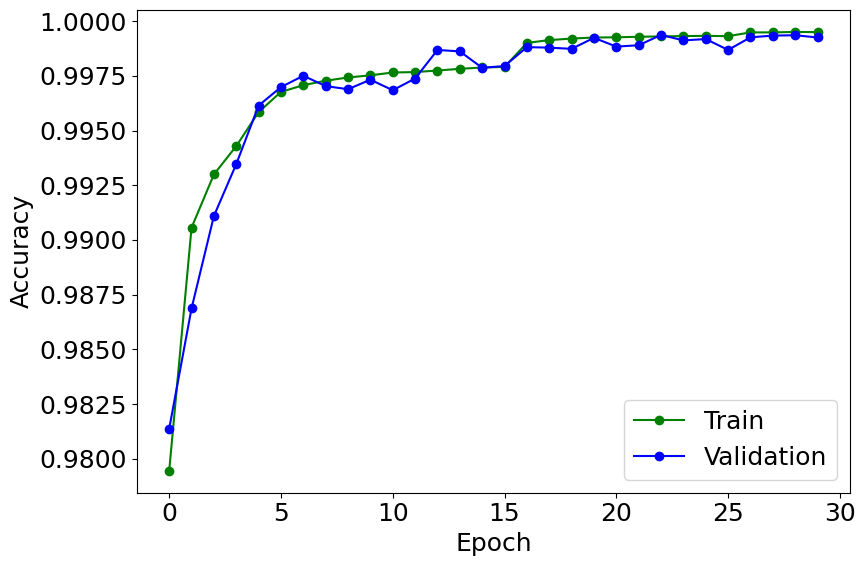

In [ ]:
## September -2  plot loss , acc , roc , conf mat ..svg jpeg
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize

# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the pre-trained model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
bigru_attention_model = load_model(checkpoint_path)

# Load the training history
history_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MDcic2023_history_0725.npz'
history = np.load(history_path, allow_pickle=True)
history = {key: history[key] for key in history}

# Adjust font sizes
plt.rcParams.update({'font.size': 18, 'axes.labelsize': 18, 'legend.fontsize': 18, 'xtick.labelsize': 18, 'ytick.labelsize': 18})

# Make predictions
y_pred_probs = bigru_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# # Classification report
# class_report = classification_report(Y_test, y_pred)
# print("Classification Report:")
# print(class_report)

# Plot loss
plt.figure(figsize=(9, 6))
plt.plot(history['loss'], color="green", marker='o', label='Train')
plt.plot(history['val_loss'], color="blue", marker='o', label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(0, 31, 5))  # Ticks every 5 epochs
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(os.path.join(plot_directory, 'Model_Loss_2019.svg'), format='svg')
plt.savefig(os.path.join(plot_directory, 'Model_Loss_2019_SP_2.jpeg'), format='jpeg')
plt.show()

# # Plot accuracy
plt.figure(figsize=(9, 6))
plt.plot(history['accuracy'], color="green", marker='o', label='Train')
plt.plot(history['val_accuracy'], color="blue", marker='o', label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(0, 31, 5))  # Ticks every 5 epochs
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig(os.path.join(plot_directory, 'Model_Accuracy_2019.svg'), format='svg')
plt.savefig(os.path.join(plot_directory, 'Model_Accuracy_2019_SP_2.jpeg'), format='jpeg')
plt.show()



#Confusion matrix
cm = confusion_matrix(Y_test, y_pred, normalize='true')
plt.figure(figsize=(9, 6))

sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'],
            yticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'],
            cbar_kws={})

# Set the orientation
plt.xticks(rotation=0)  # Make X-axis labels horizontal
plt.yticks(rotation=90)  # Make Y-axis labels vertical (top-to-bottom)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Tight layout to prevent clipping of the labels
plt.tight_layout()

# Save the figure in both formats
# plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019.svg'), format='svg')
plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019_SP.jpeg'), format='jpeg')
plt.show()

cm = confusion_matrix(Y_test, y_pred, normalize='true')
plt.figure(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'],
            yticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
# plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019.svg'), format='svg')
plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019.jpeg'), format='jpeg')
plt.show()

# Compute ROC curve and ROC area for each class
n_classes = len(np.unique(Y_test))
y_test_binarized = label_binarize(Y_test, classes=np.arange(n_classes))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves for each class, micro-average, and macro-average
plt.figure(figsize=(9, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {["BENIGN", "Syn", "NetBIOS", "UDP", "MSSQL", "Portmap", "LDAP", "UDPLag"][i]} (area = {roc_auc[i]:.4f})')
plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:.4f})',
         color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro-average ROC curve (area = {roc_auc["macro"]:.4f})',
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.tight_layout()
# plt.savefig(os.path.join(plot_directory, 'ROC_Curves_2019.svg'), format='svg')
plt.savefig(os.path.join(plot_directory, 'ROC_Curves_2019_SP.jpeg'), format='jpeg')
plt.show()


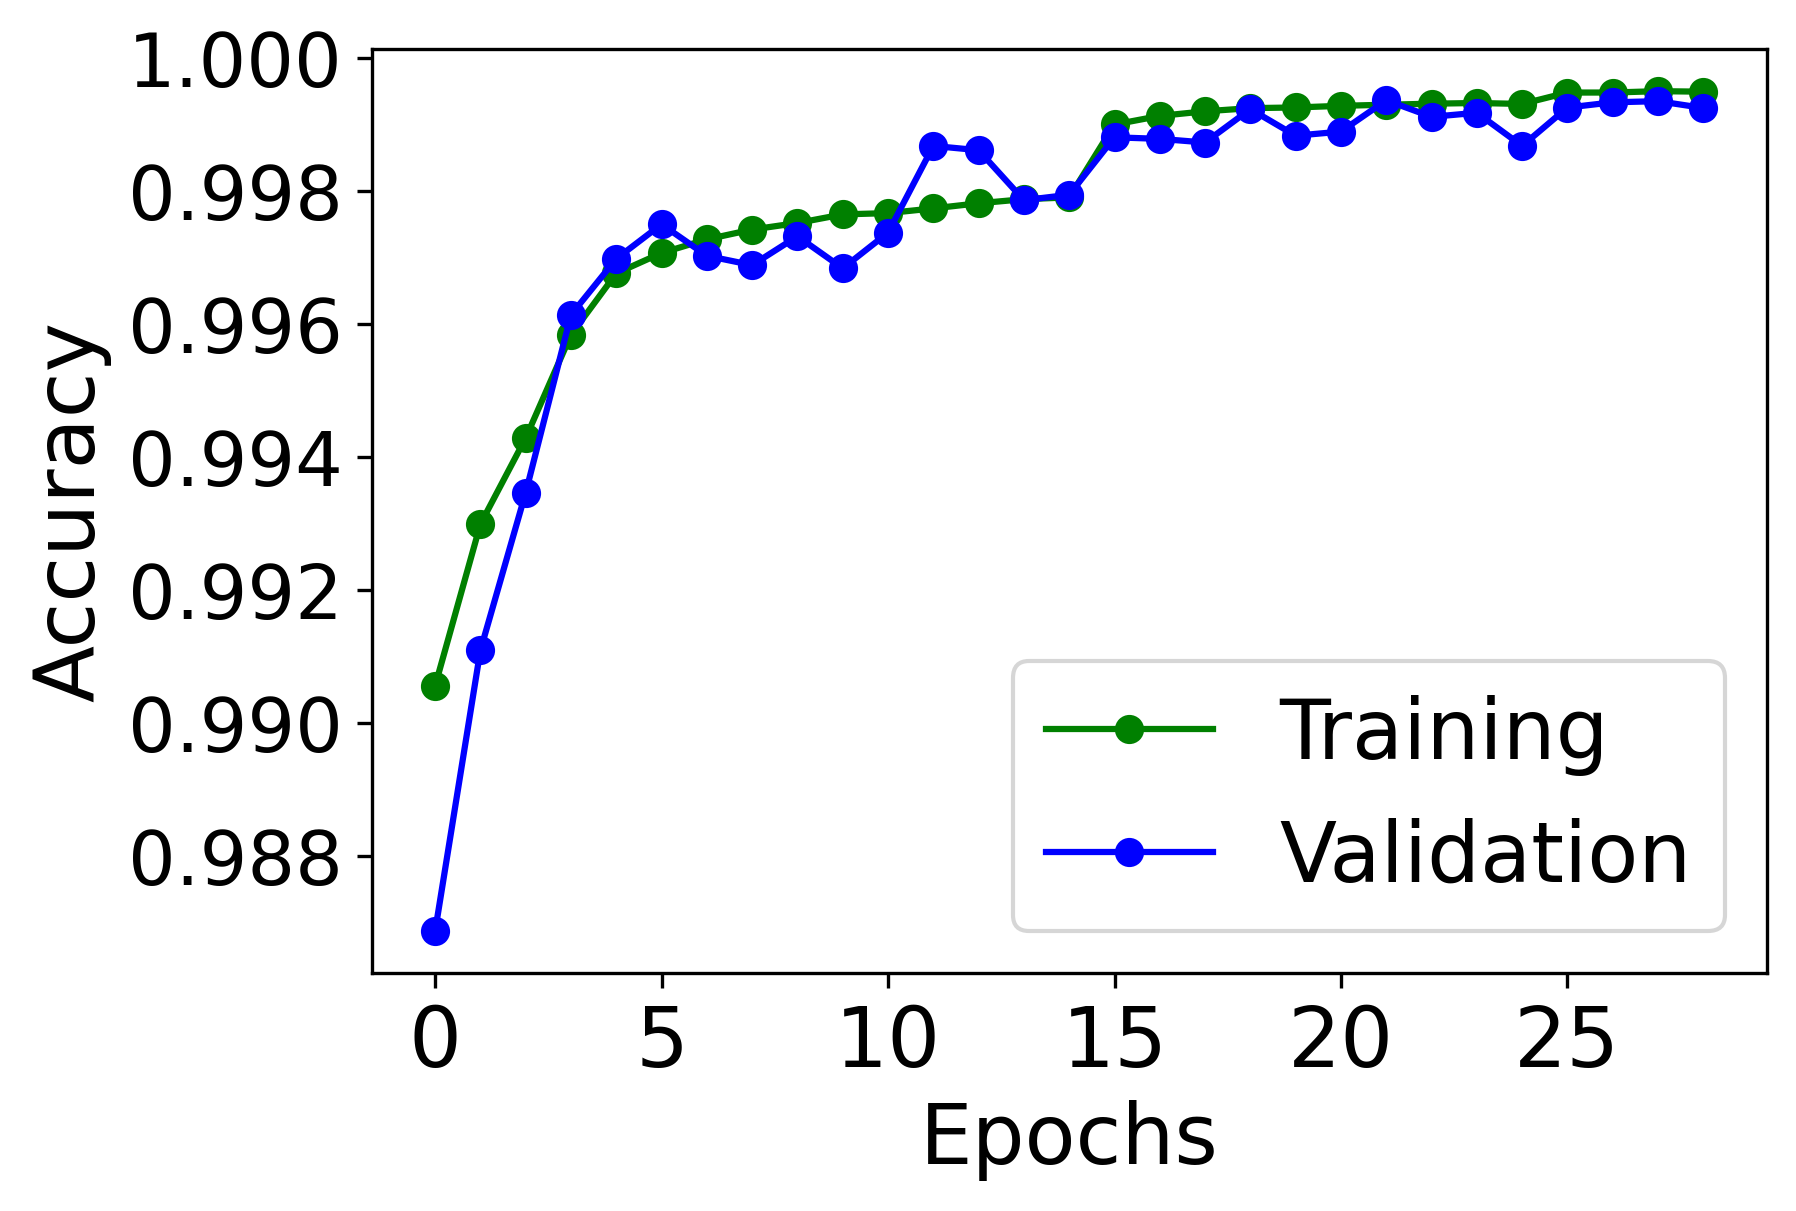

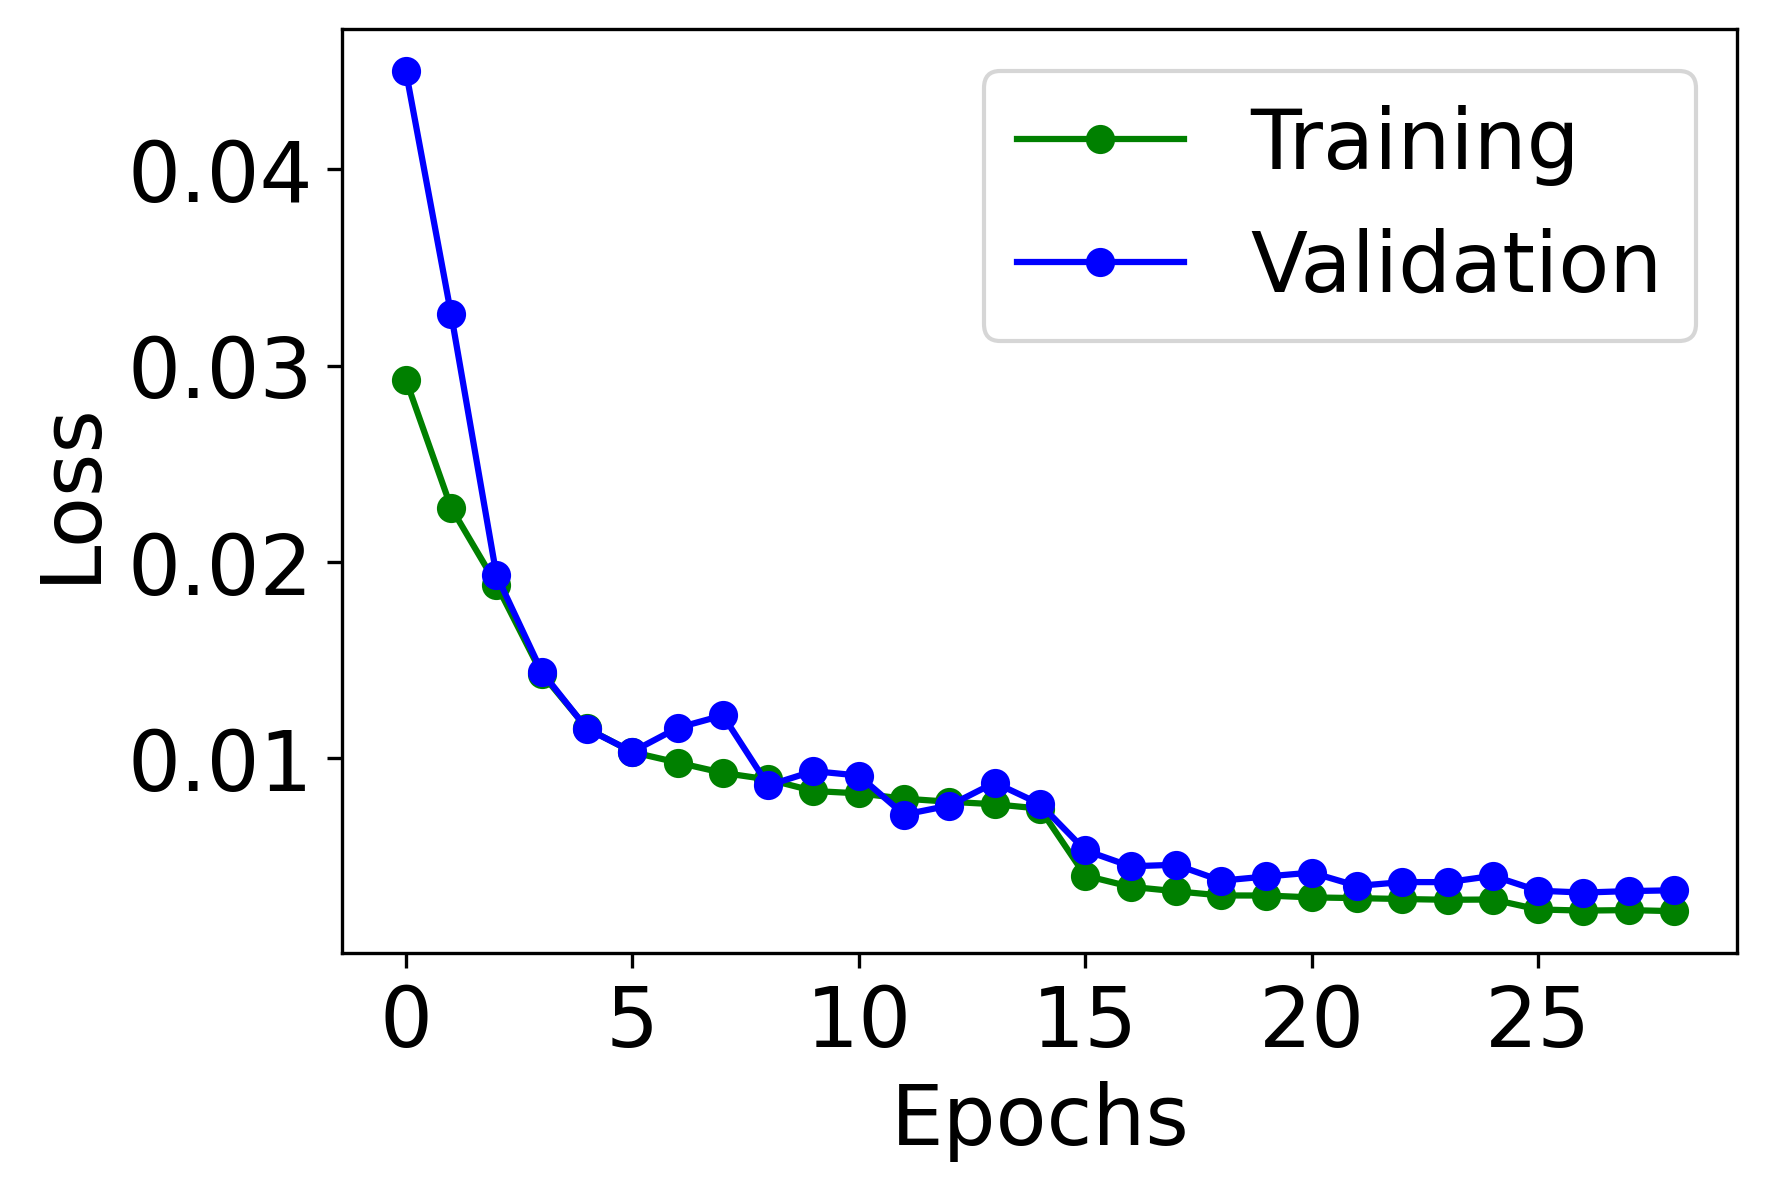

In [ ]:
### plot loss/acc cicddos 2019  Novermber 2024
## September -2  plot loss , acc , roc , conf mat ..svg jpeg
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize

# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the pre-trained model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
bigru_attention_model = load_model(checkpoint_path)

# Load the training history
history_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MDcic2023_history_0725.npz'
history = np.load(history_path, allow_pickle=True)
history = {key: history[key] for key in history}
# Step 1: Reload the history data and slice out the initial epoch for consistency

history = np.load(history_path, allow_pickle=True)
accuracy = history['accuracy'][1:]  # Slice to start from second epoch
val_accuracy = history['val_accuracy'][1:]
loss = history['loss'][1:]
val_loss = history['val_loss'][1:]

#  Define epochs based on the length of the accuracy array
epochs = len(accuracy)

# Plot training & validation accuracy
plt.figure(figsize=(6.0, 4.0), dpi=300)  # Adjust figure size and DPI for high resolution
plt.plot(accuracy, label='Training', color='green', marker='o')  # Style and marker
plt.plot(val_accuracy, label='Validation', color='blue', marker='o')  # Style and marker
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=20)

# Set x and y-axis ticks
plt.xticks(np.arange(0, epochs, step=5), fontsize=20)  # Adjust the step size for x-ticks
plt.yticks(fontsize=18)

# Display legend and save the accuracy plot
plt.legend(loc='lower right', fontsize=20)
plt.savefig(os.path.join(plot_directory, 'Model_Accuracy_2019_1104.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')  # Updated to original filename
plt.show()

# Plot training & validation loss
plt.figure(figsize=(6.0, 4.0), dpi=300)  # Adjust figure size and DPI for high resolution
plt.plot(loss, label='Training', color='green', marker='o')  # Style and marker
plt.plot(val_loss, label='Validation', color='blue', marker='o')  # Style and marker
plt.ylabel('Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=20)

# Set x and y-axis ticks
plt.xticks(np.arange(0, epochs, step=5), fontsize=20)  # Adjust the step size for x-ticks
plt.yticks(fontsize=20)

# Display legend and save the loss plot
plt.legend(loc='upper right', fontsize=20)
plt.savefig(os.path.join(plot_directory, 'Model_Loss_2019_1104.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')  # Updated to original filename
plt.show()


X_test: (292973, 85, 1)
Y_test: (292973,)
Model Input Shape: (None, 85, 1)
Model Output Shape: (None, 8)
1/1 [==============================] - 1s 1s/step
Sample 0: Total x-ticks = 512


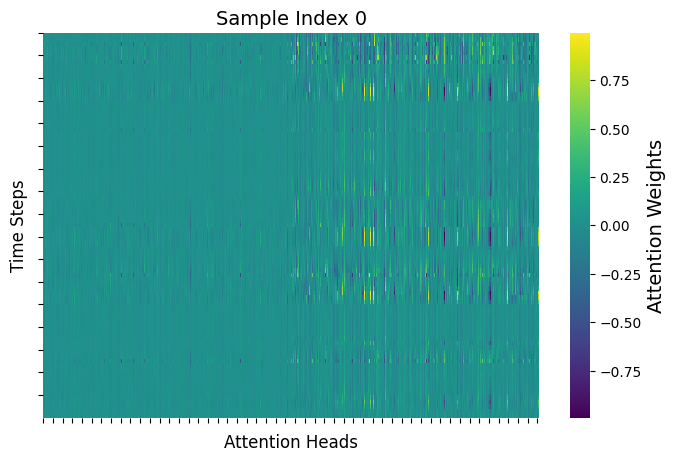

Sample 1: Total x-ticks = 512


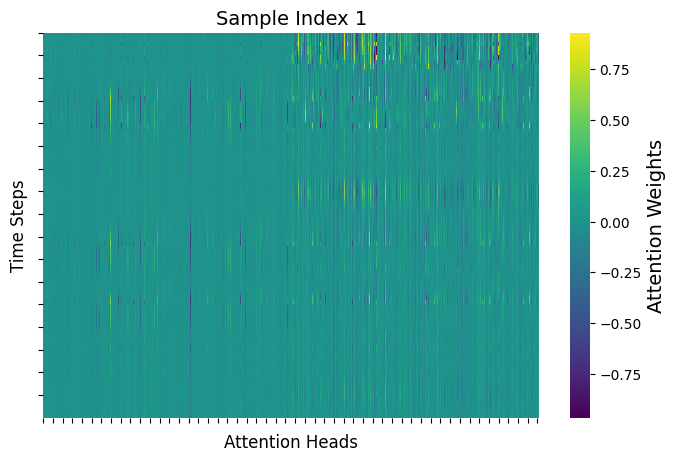

Sample 2: Total x-ticks = 512


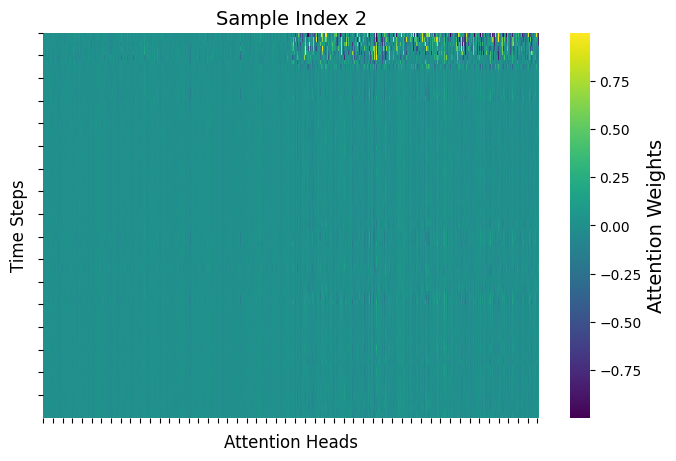

Sample 3: Total x-ticks = 512


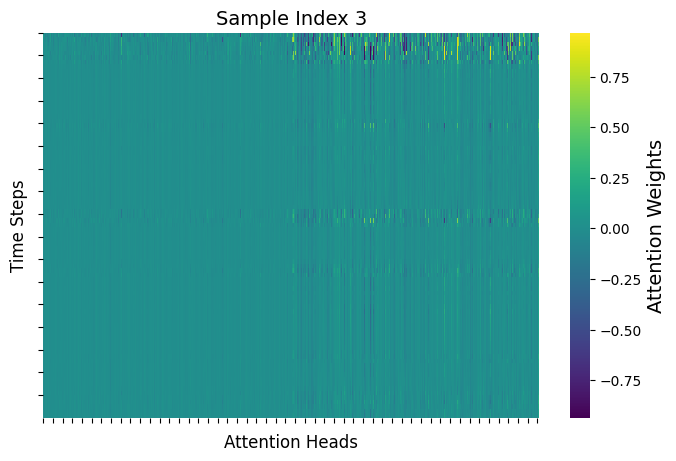

In [ ]:
### Attentionplot2019
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from keras.models import Model
from keras.utils import to_categorical
from matplotlib.ticker import MaxNLocator  # For controlling the number of ticks

# # Ensure directory for plots exists
# plot_directory = '/content/drive/MyDrive/IDS-Research/CIC2013_plots'
# if not os.path.exists(plot_directory):
#     os.makedirs(plot_directory)

# # Directory for saving plots
# save_dir = '/content/drive/MyDrive/IDS-Research/CICIoT2023_plots_train_test_set'
# model_checkpoint = '/content/drive/MyDrive/IDS-Research/BI_GRU_Attention_CICIoT2023_0814.h5'

plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the pre-trained model
model_checkpoint = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
# bigru_attention_model = load_model(checkpoint_path)

save_dir = '/content/drive/MyDrive/IDS-Research/train_test_data_cicddos2019'

# Load the model
gru_attention_model = tf.keras.models.load_model(model_checkpoint)

# Load data
# X_test = np.load(os.path.join(save_dir, 'X_test.npy'))
# Y_test = np.load(os.path.join(save_dir, 'y_test.npy'))

# Load data
# X_train1 = np.load(os.path.join(save_dir, 'X_train1.npy'))
X_test = np.load(os.path.join(save_dir, 'X_test1.npy'))
# Y_train = np.load(os.path.join(save_dir, 'Y_train.npy'))
Y_test = np.load(os.path.join(save_dir, 'Y_test.npy'))

# Sanity checks
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)
print("Model Input Shape:", gru_attention_model.input_shape)
print("Model Output Shape:", gru_attention_model.output_shape)

# Prepare attention model
attention_model = Model(inputs=gru_attention_model.input, outputs=gru_attention_model.get_layer('attention_1').output)

# Select a few samples to display
sample_indices = [0, 1, 2, 3]  # Four samples for visualization
X_test_subset = X_test[sample_indices]

# Predict attention weights for the subset
with tf.device('/CPU:0'):  # Force execution on CPU to avoid CuDNN issues
    attention_weights_subset = attention_model.predict(X_test_subset, batch_size=16)

# Plot attention weights for selected samples
for i, sample_attention_weights in enumerate(attention_weights_subset):
    plt.figure(figsize=(8, 5))  # Individual figure size
    sns.heatmap(
        sample_attention_weights,
        cmap="viridis",
        cbar=True,
        xticklabels=True,  # Default x-tick labels
        yticklabels=True   # Default y-tick labels
    )
    plt.title(f'Sample Index {sample_indices[i]}', fontsize=14)
    plt.xlabel('Attention Heads', fontsize=12)
    plt.ylabel('Time Steps', fontsize=12)

    # Calculate and print total x-ticks
    num_xticks = sample_attention_weights.shape[1]
    print(f"Sample {sample_indices[i]}: Total x-ticks = {num_xticks}")

    # Adjust x-ticks: Use np.arange() to control step size
    step_size = 10  # Initial step size
    x_ticks = np.arange(0, num_xticks, step_size)
    plt.xticks(x_ticks, fontsize=10, rotation=45)  # Rotate and adjust x-tick size

    # Use MaxNLocator to control tick labels display
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure integer ticks
    ax.set_xticks(x_ticks)

    # Adjust y-ticks (optional)
    step_size_y = 5  # Adjust this step size to suit your matrix
    y_ticks = np.arange(0, sample_attention_weights.shape[0], step_size_y)
    plt.yticks(y_ticks, fontsize=10)

    plt.yticks(fontsize=10)

    # Adjust colormap label (make it larger)
    cbar = plt.gca().collections[0].colorbar
    cbar.set_label('Attention Weights', fontsize=14)

    # Adjust the spacing around the plot to avoid clipping of tick labels
    # plt.subplots_adjust(bottom=0.3, left=0.2, right=0.9, top=0.9)

    # Save the figure
    individual_output_path = os.path.join(plot_directory, f'Attention_Weights_Heatmap_2019{sample_indices[i]}.jpeg')
    plt.savefig(individual_output_path, format='jpeg', dpi=300)
    plt.show()


X_test: (292973, 85, 1)
Y_test: (292973,)
Model Input Shape: (None, 85, 1)
Model Output Shape: (None, 8)


1/1 [==============================] - 1s 1s/step


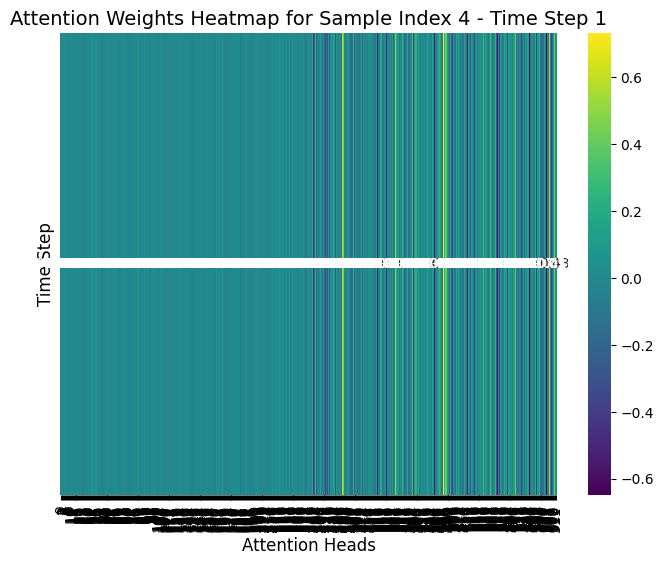

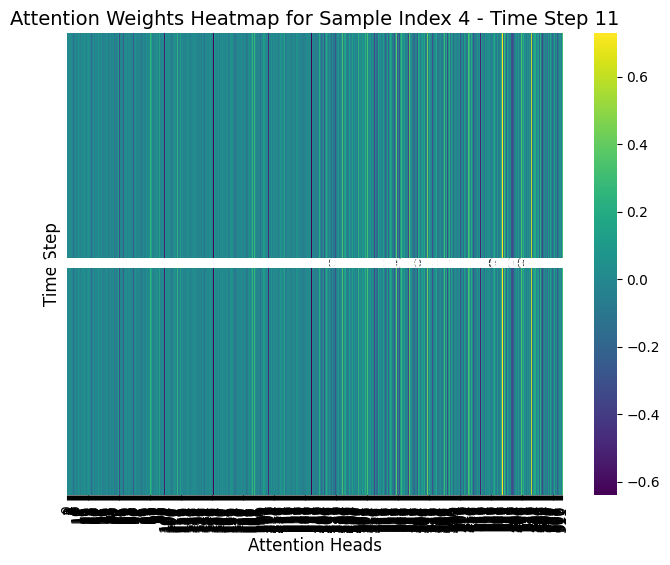

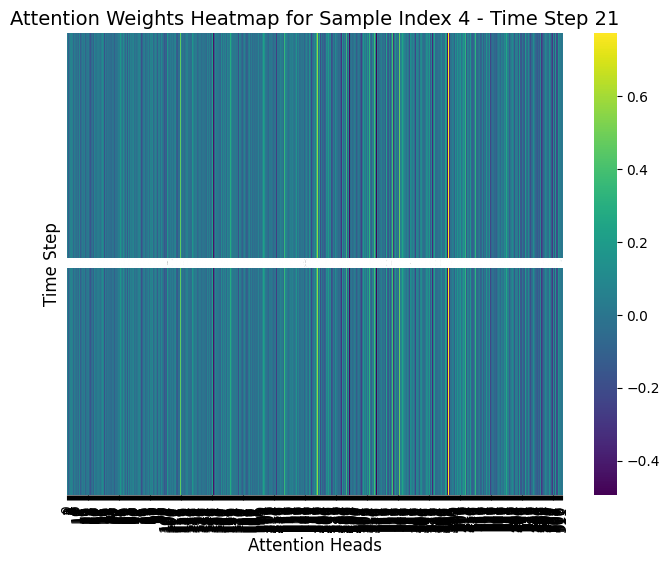

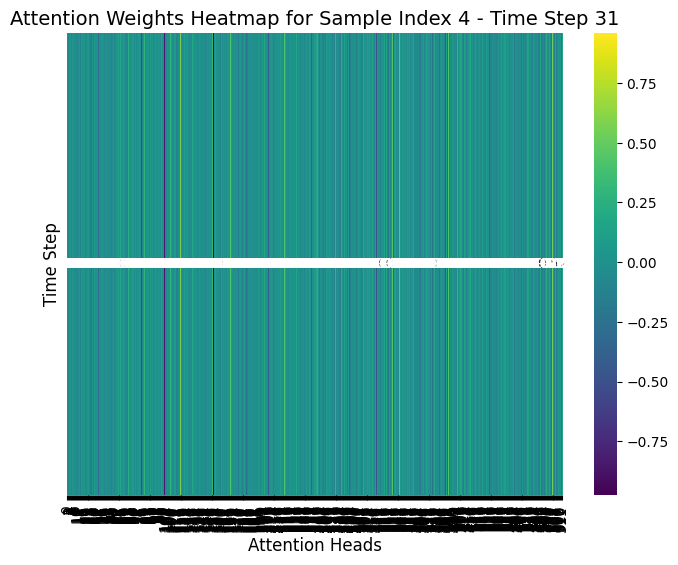

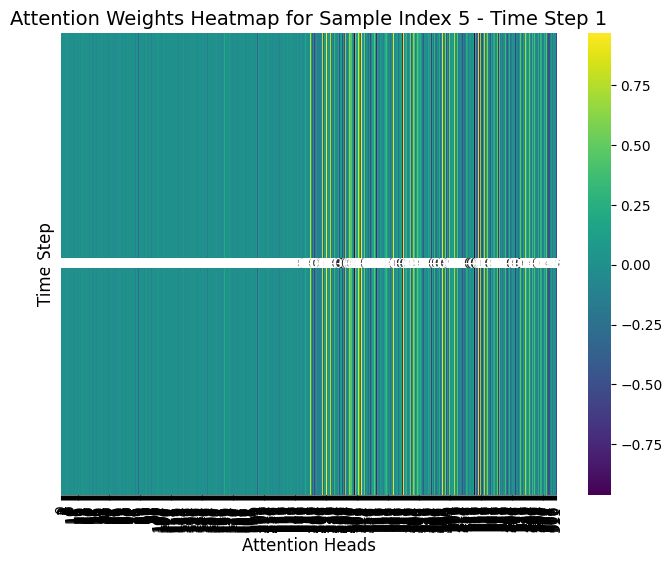

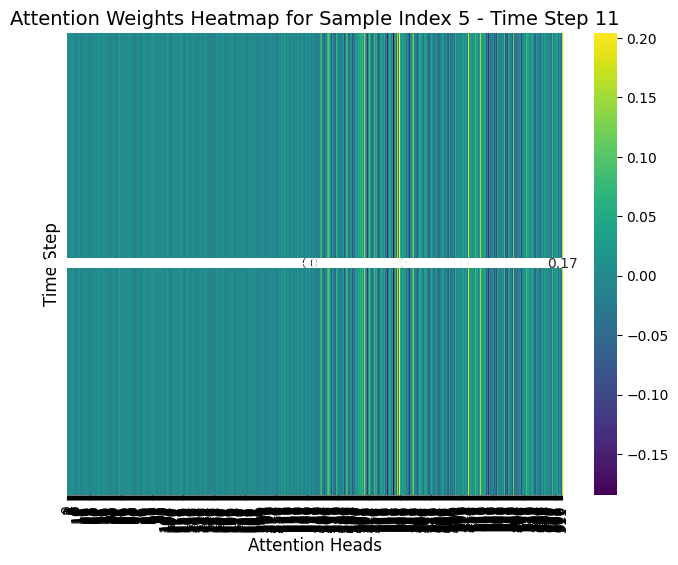

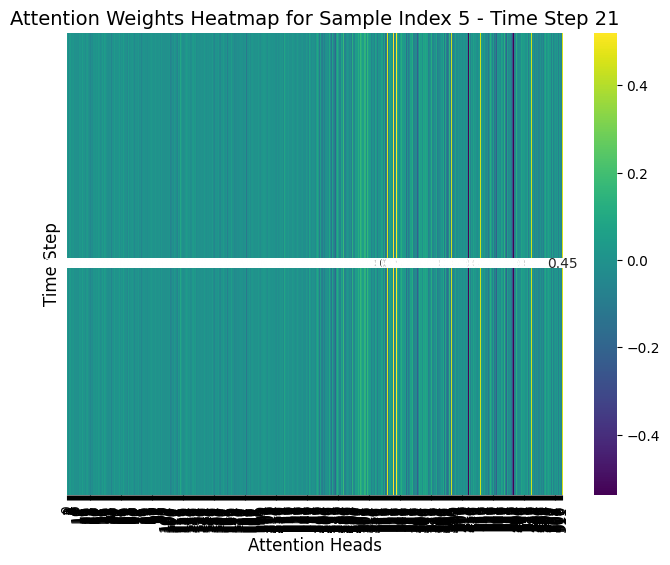

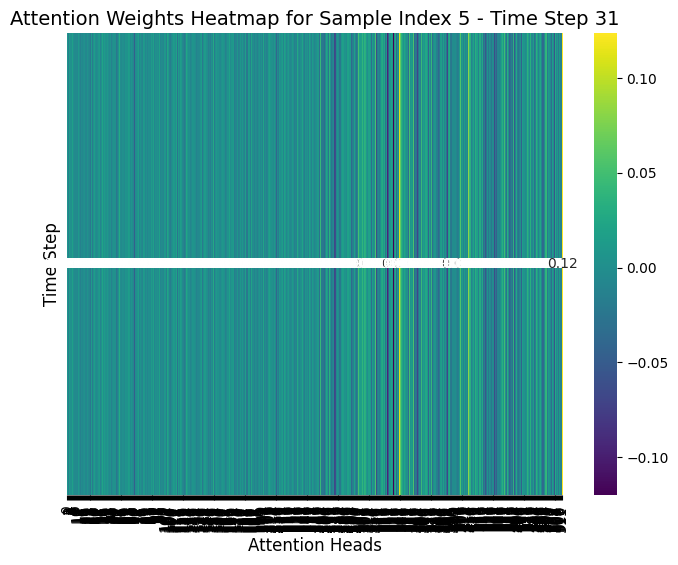

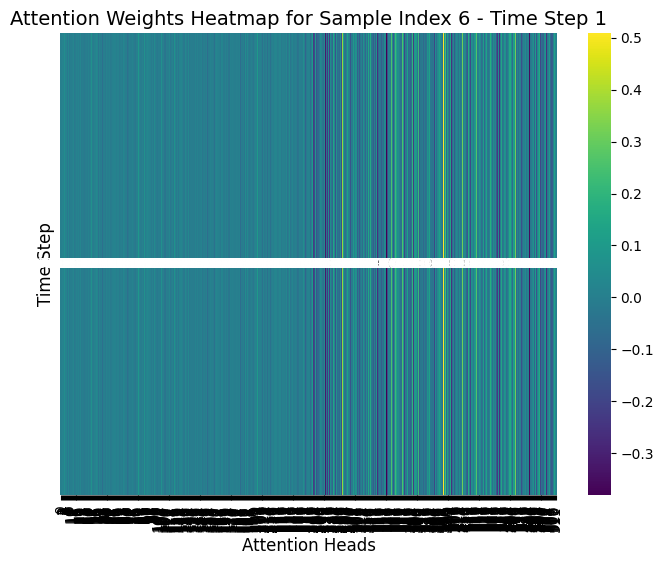

KeyboardInterrupt: 

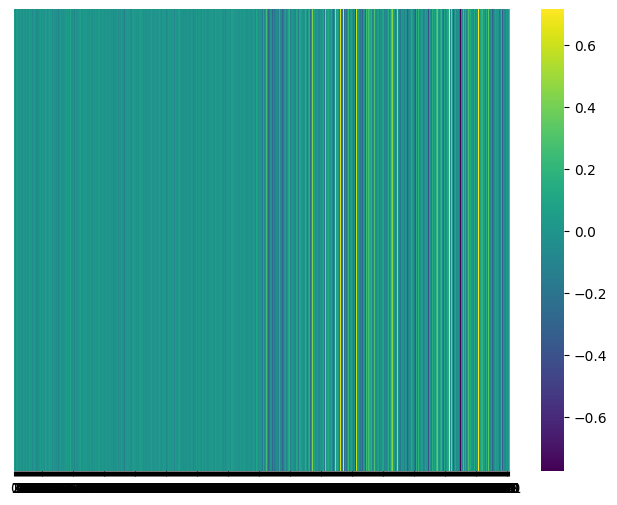

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from keras.models import Model

# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the pre-trained model
model_checkpoint = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
gru_attention_model = tf.keras.models.load_model(model_checkpoint)

# Load data
save_dir = '/content/drive/MyDrive/IDS-Research/train_test_data_cicddos2019'
X_test = np.load(os.path.join(save_dir, 'X_test1.npy'))
Y_test = np.load(os.path.join(save_dir, 'Y_test.npy'))

# Sanity checks
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)
print("Model Input Shape:", gru_attention_model.input_shape)
print("Model Output Shape:", gru_attention_model.output_shape)

# Prepare attention model
attention_model = Model(inputs=gru_attention_model.input, outputs=gru_attention_model.get_layer('attention_1').output)

# Select a few samples to display
sample_indices = [4, 5, 6, 7]  # Adjust this list based on which samples you want to visualize
X_test_subset = X_test[sample_indices]

# Predict attention weights for the subset, force execution on CPU
with tf.device('/CPU:0'):  # Force execution on CPU to avoid CuDNN issues
    attention_weights_subset = attention_model.predict(X_test_subset, batch_size=16)

# Select specific time steps to display (adjust these as needed)
selected_time_steps = [0, 10, 20, 30]  # Modify based on your dataset's time steps

# Plot attention weights for selected time steps
for i, sample_attention_weights in enumerate(attention_weights_subset):
    # Ensure that we do not exceed the number of time steps in the attention_weights
    max_time_steps = sample_attention_weights.shape[0]

    # Limit the time steps to the selected ones (make sure the index is valid)
    valid_time_steps = [t for t in selected_time_steps if t < max_time_steps]

    # Plot heatmaps for the selected time steps
    for t in valid_time_steps:
        plt.figure(figsize=(8, 6))  # Figure size

        # Extract attention weights for the current time step and reshape if needed
        time_step_attention_weights = sample_attention_weights[t].reshape(1, -1)  # Reshape to (1, num_attention_heads)

        # Plot the heatmap
        sns.heatmap(time_step_attention_weights, cmap='viridis', cbar=True, annot=True, xticklabels=True, yticklabels=False)

        # Title and labels
        plt.title(f'Attention Weights Heatmap for Sample Index {sample_indices[i]} - Time Step {t+1}', fontsize=14)
        plt.xlabel('Attention Heads', fontsize=12)
        plt.ylabel('Time Step', fontsize=12)

        # Save the figure
        individual_output_path = os.path.join(plot_directory, f'Attention_Weights_Heatmap_Sample{sample_indices[i]}_TimeStep{t+1}.jpeg')
        plt.savefig(individual_output_path, format='jpeg', dpi=300)
        plt.show()


X_test: (292973, 85, 1)
Y_test: (292973,)
Model Input Shape: (None, 85, 1)
Model Output Shape: (None, 8)
4/4 [==============================] - 5s 56ms/step
Attention Weights Shape for Sample 4: (1, 512)


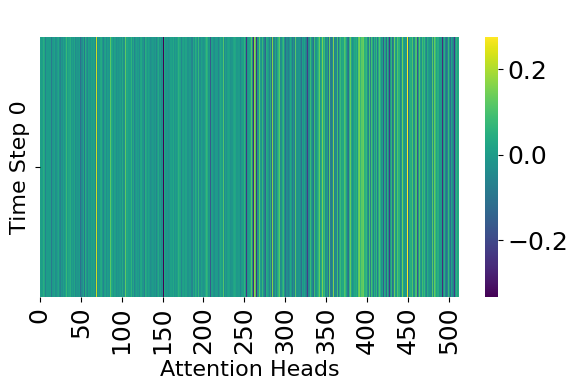

Attention Weights Shape for Sample 5: (1, 512)


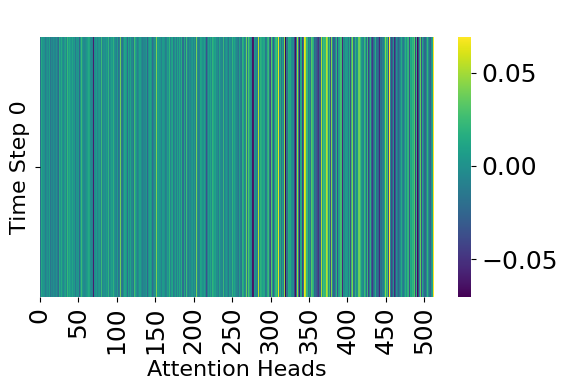

Attention Weights Shape for Sample 6: (1, 512)


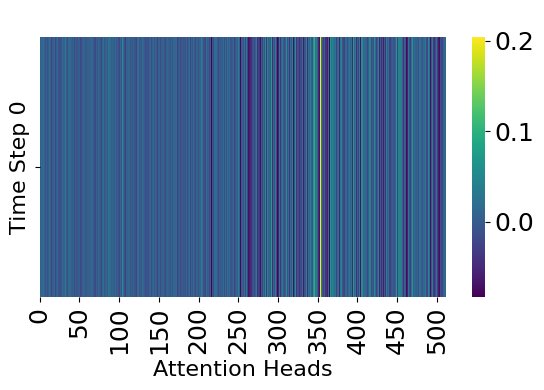

Attention Weights Shape for Sample 7: (1, 512)


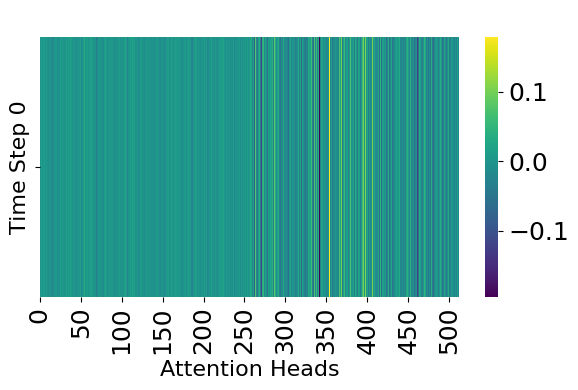

In [ ]:
### attentionplot2019  lastest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from keras.models import Model

# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the pre-trained model
model_checkpoint = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
gru_attention_model = tf.keras.models.load_model(model_checkpoint)

# Load data
save_dir = '/content/drive/MyDrive/IDS-Research/train_test_data_cicddos2019'
X_test = np.load(os.path.join(save_dir, 'X_test1.npy'))
Y_test = np.load(os.path.join(save_dir, 'Y_test.npy'))

# Sanity checks
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)
print("Model Input Shape:", gru_attention_model.input_shape)
print("Model Output Shape:", gru_attention_model.output_shape)

# Prepare attention model
attention_model = Model(inputs=gru_attention_model.input, outputs=gru_attention_model.get_layer('attention_1').output)

# Select a few samples to display
sample_indices = [4,5,6,7]  # Adjust this list based on which samples you want to visualize
X_test_subset = X_test[sample_indices]

# Predict attention weights for the subset, force execution on CPU
with tf.device('/CPU:0'):  # Force execution on CPU to avoid CuDNN issues
    attention_weights_subset = attention_model.predict(X_test_subset, batch_size=1)

# Select a specific time step to display (adjust based on dataset)
selected_time_step = 36  # Modify this as needed, or iterate through time steps if desired

# Plot attention weights for selected time step for each sample
for i, sample_attention_weights in enumerate(attention_weights_subset):
    plt.figure(figsize=(6.0, 4.0))  # Adjust the figure size

    # Extract attention weights for the selected time step
    time_step_attention_weights = sample_attention_weights[selected_time_step].reshape(1, -1)  # Reshape to (1, num_attention_heads)
    print(f"Attention Weights Shape for Sample {sample_indices[i]}: {time_step_attention_weights.shape}")

    # Plot heatmap for the selected time step
    ax = sns.heatmap(
        time_step_attention_weights,
        cmap="viridis",
        cbar=True,
        # xticklabels=np.arange(0, time_step_attention_weights.shape[1], step=3),  # Adjust spacing as needed
        yticklabels=["Time Step " + str(selected_time_step-36)]  # Time step label on y-axis
    )

    # Access the colorbar and adjust tick labels
    colorbar = ax.collections[0].colorbar  # Get the colorbar associated with the heatmap
    colorbar.ax.tick_params(labelsize=18)  # Set the tick label size
    colorbar.set_label('', fontsize=16)  # Set label size for colorbar

    # Title and labels
    plt.title(f' ', fontsize=18)
    plt.xlabel('Attention Heads', fontsize=16)
    plt.ylabel('', fontsize=18)
    # plt.xticks(np.arange(0, sample_attention_weights.shape[1], step=33),fontsize=18, rotation=90 )
    tick_step = 50
    tick_positions = np.arange(0, time_step_attention_weights.shape[1], step=tick_step)

    plt.xticks(tick_positions ,labels=[str(pos) for pos in tick_positions],fontsize=18, rotation=90 )
    plt.yticks(fontsize=16)
    plt.tight_layout()

    # Save the figure
    individual_output_path = os.path.join(plot_directory, f'Attention_Weights_Heatmap_Sample_2019{sample_indices[i]}_TimeStep_{selected_time_step}.jpeg')
    plt.savefig(individual_output_path, format='jpeg', dpi=300)
    plt.show()


9156/9156 [==============================] - 749s 82ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2184
           1       0.98      1.00      0.99      1963
           2       1.00      1.00      1.00     39342
           3       1.00      1.00      1.00     72494
           4       1.00      1.00      1.00     35332
           5       1.00      1.00      1.00     86186
           6       1.00      1.00      1.00     55090
           7       0.92      0.92      0.92       382

    accuracy                           1.00    292973
   macro avg       0.99      0.99      0.99    292973
weighted avg       1.00      1.00      1.00    292973



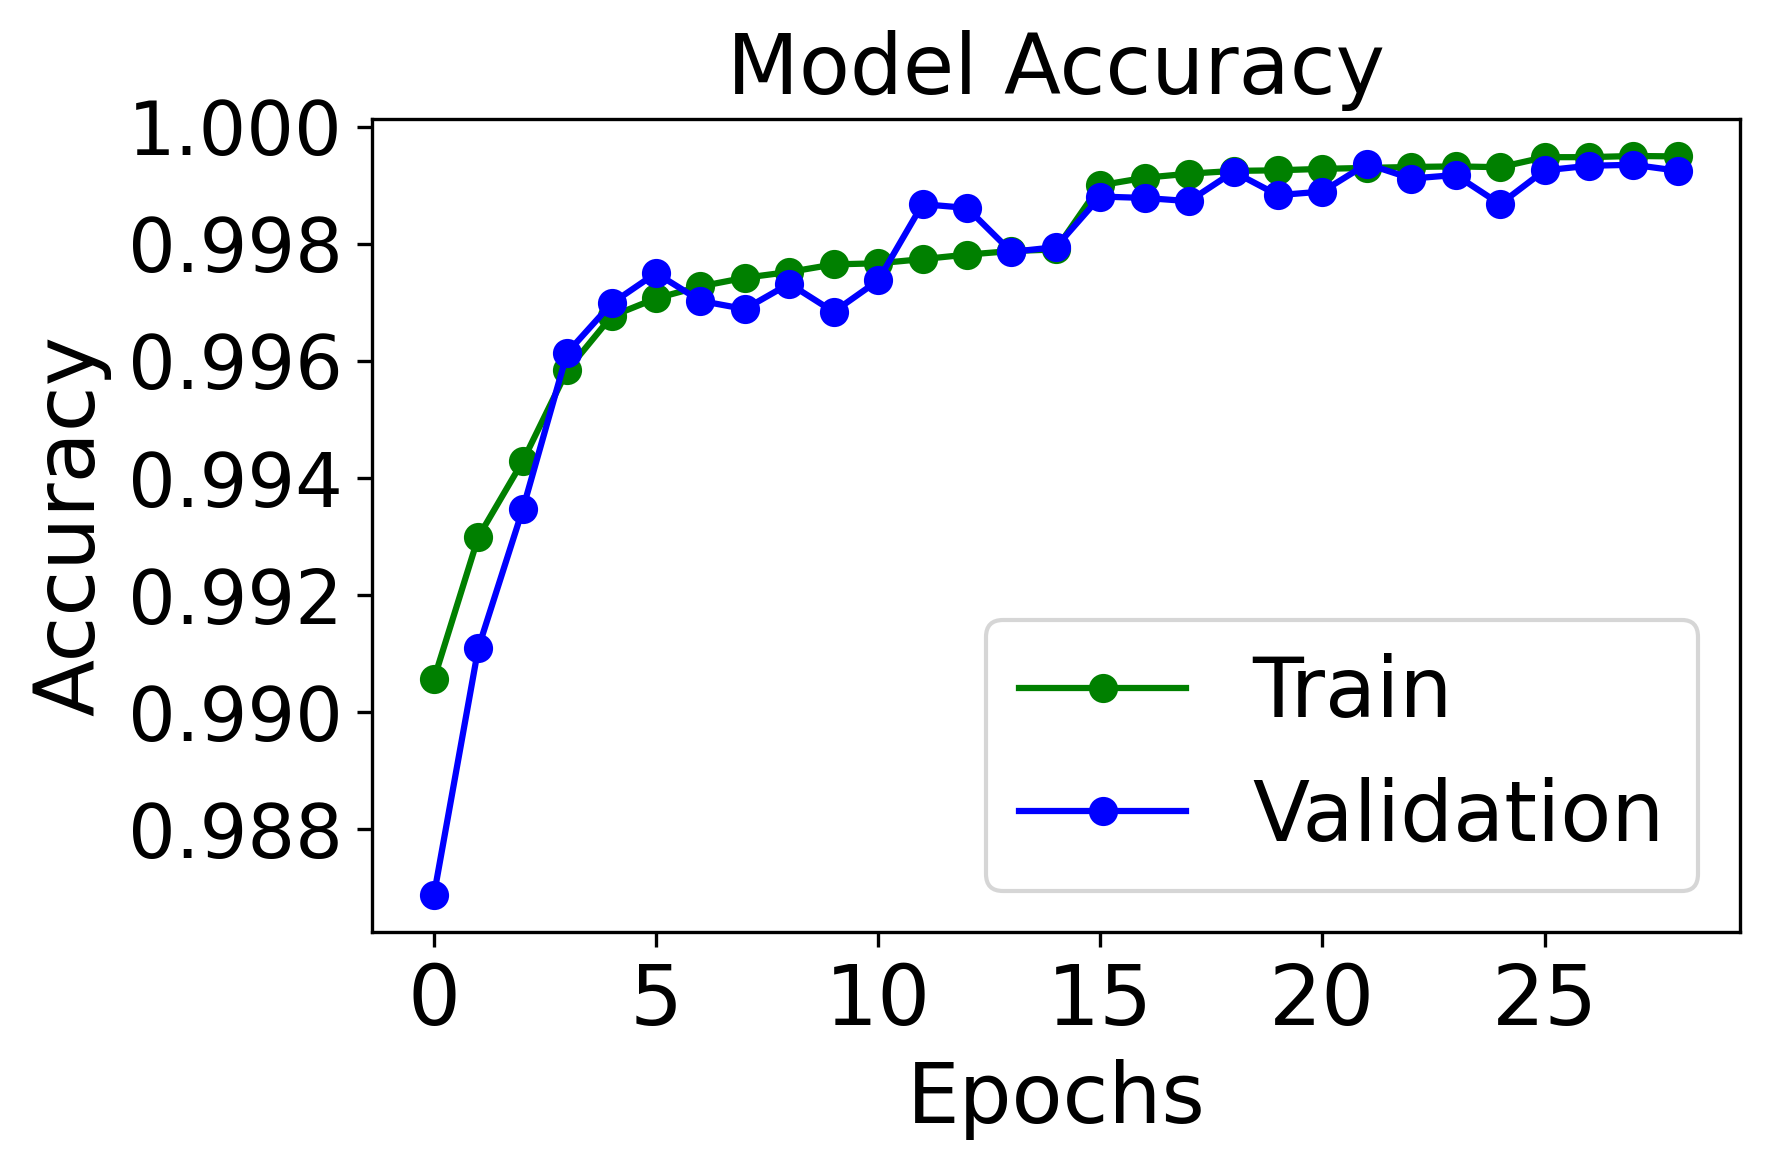

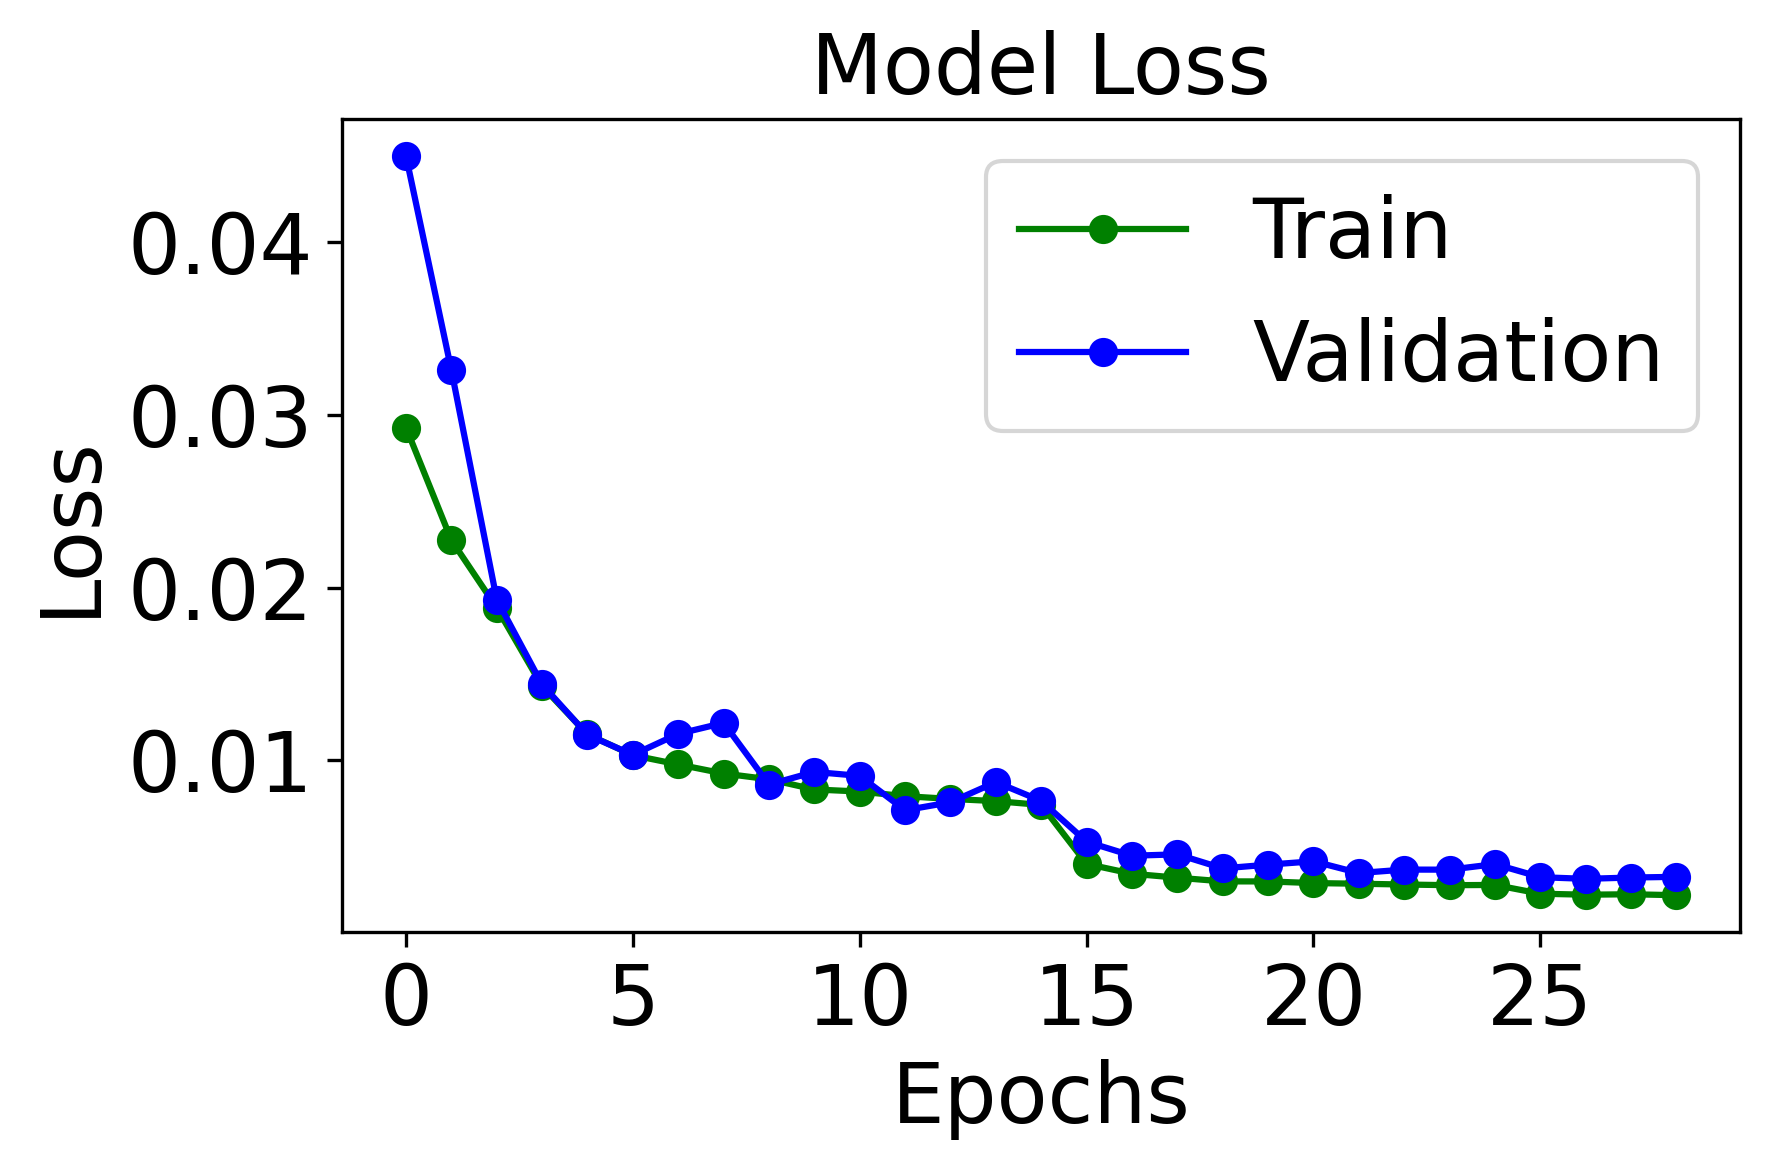

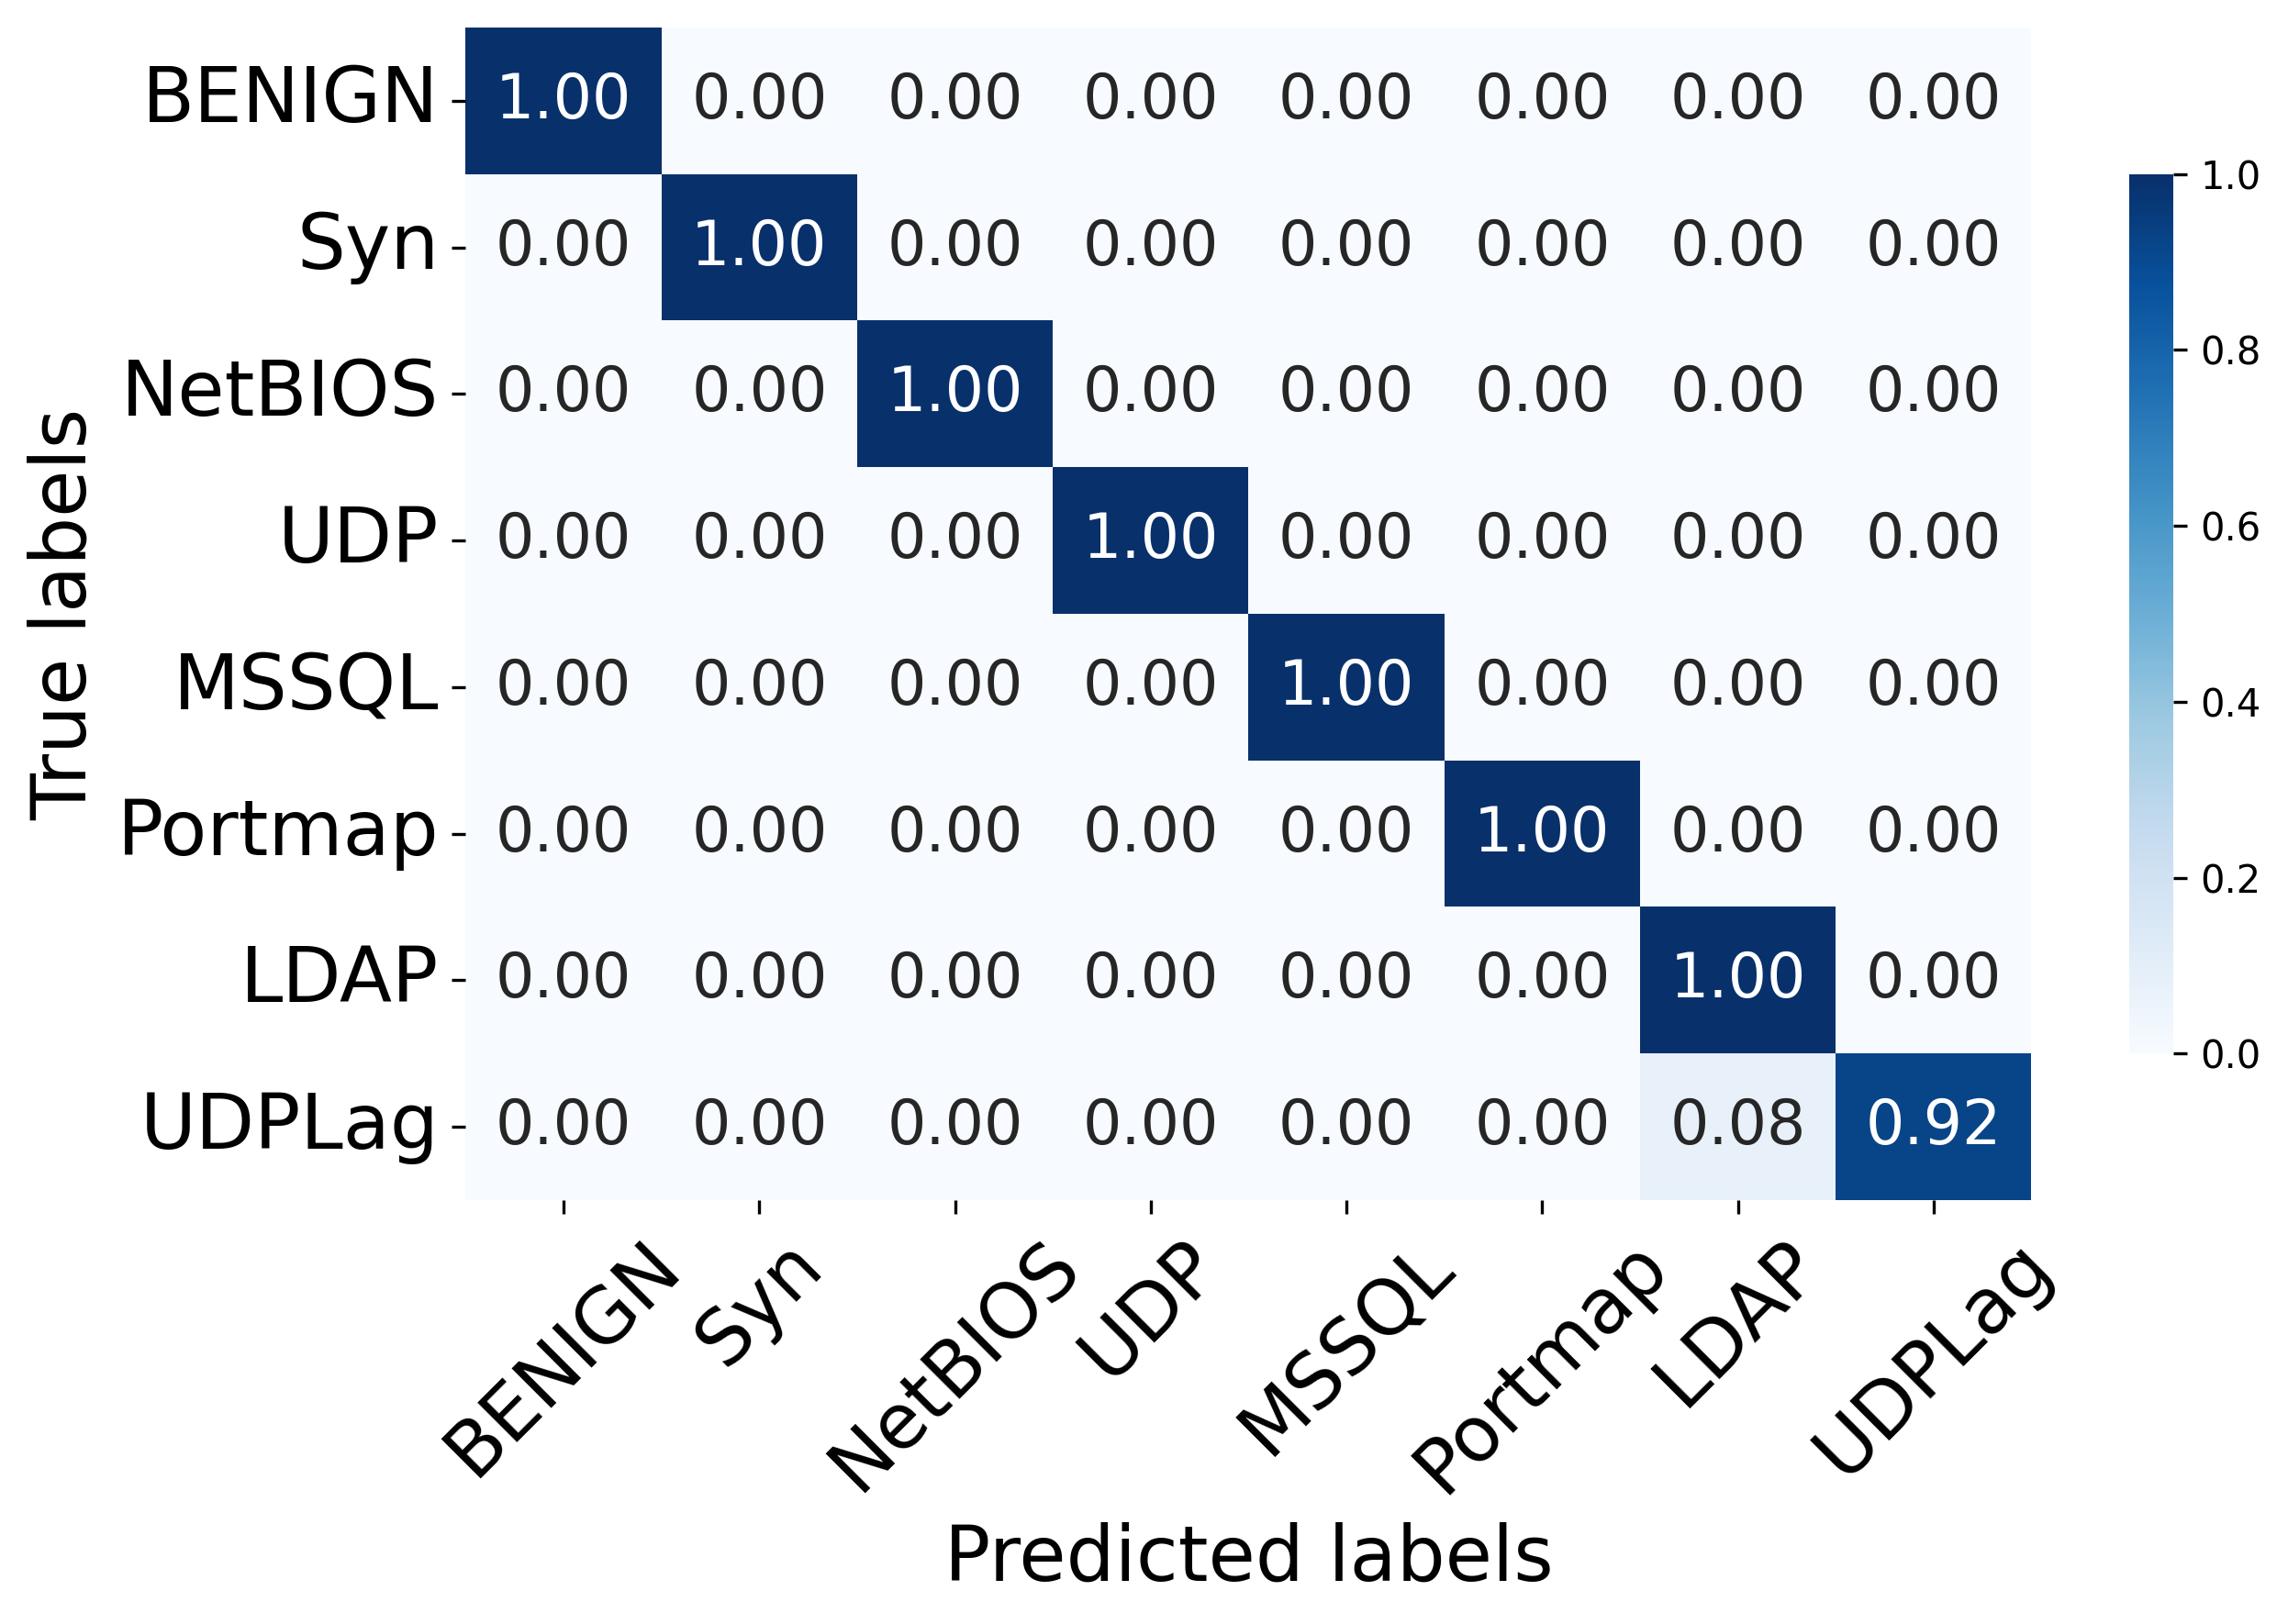

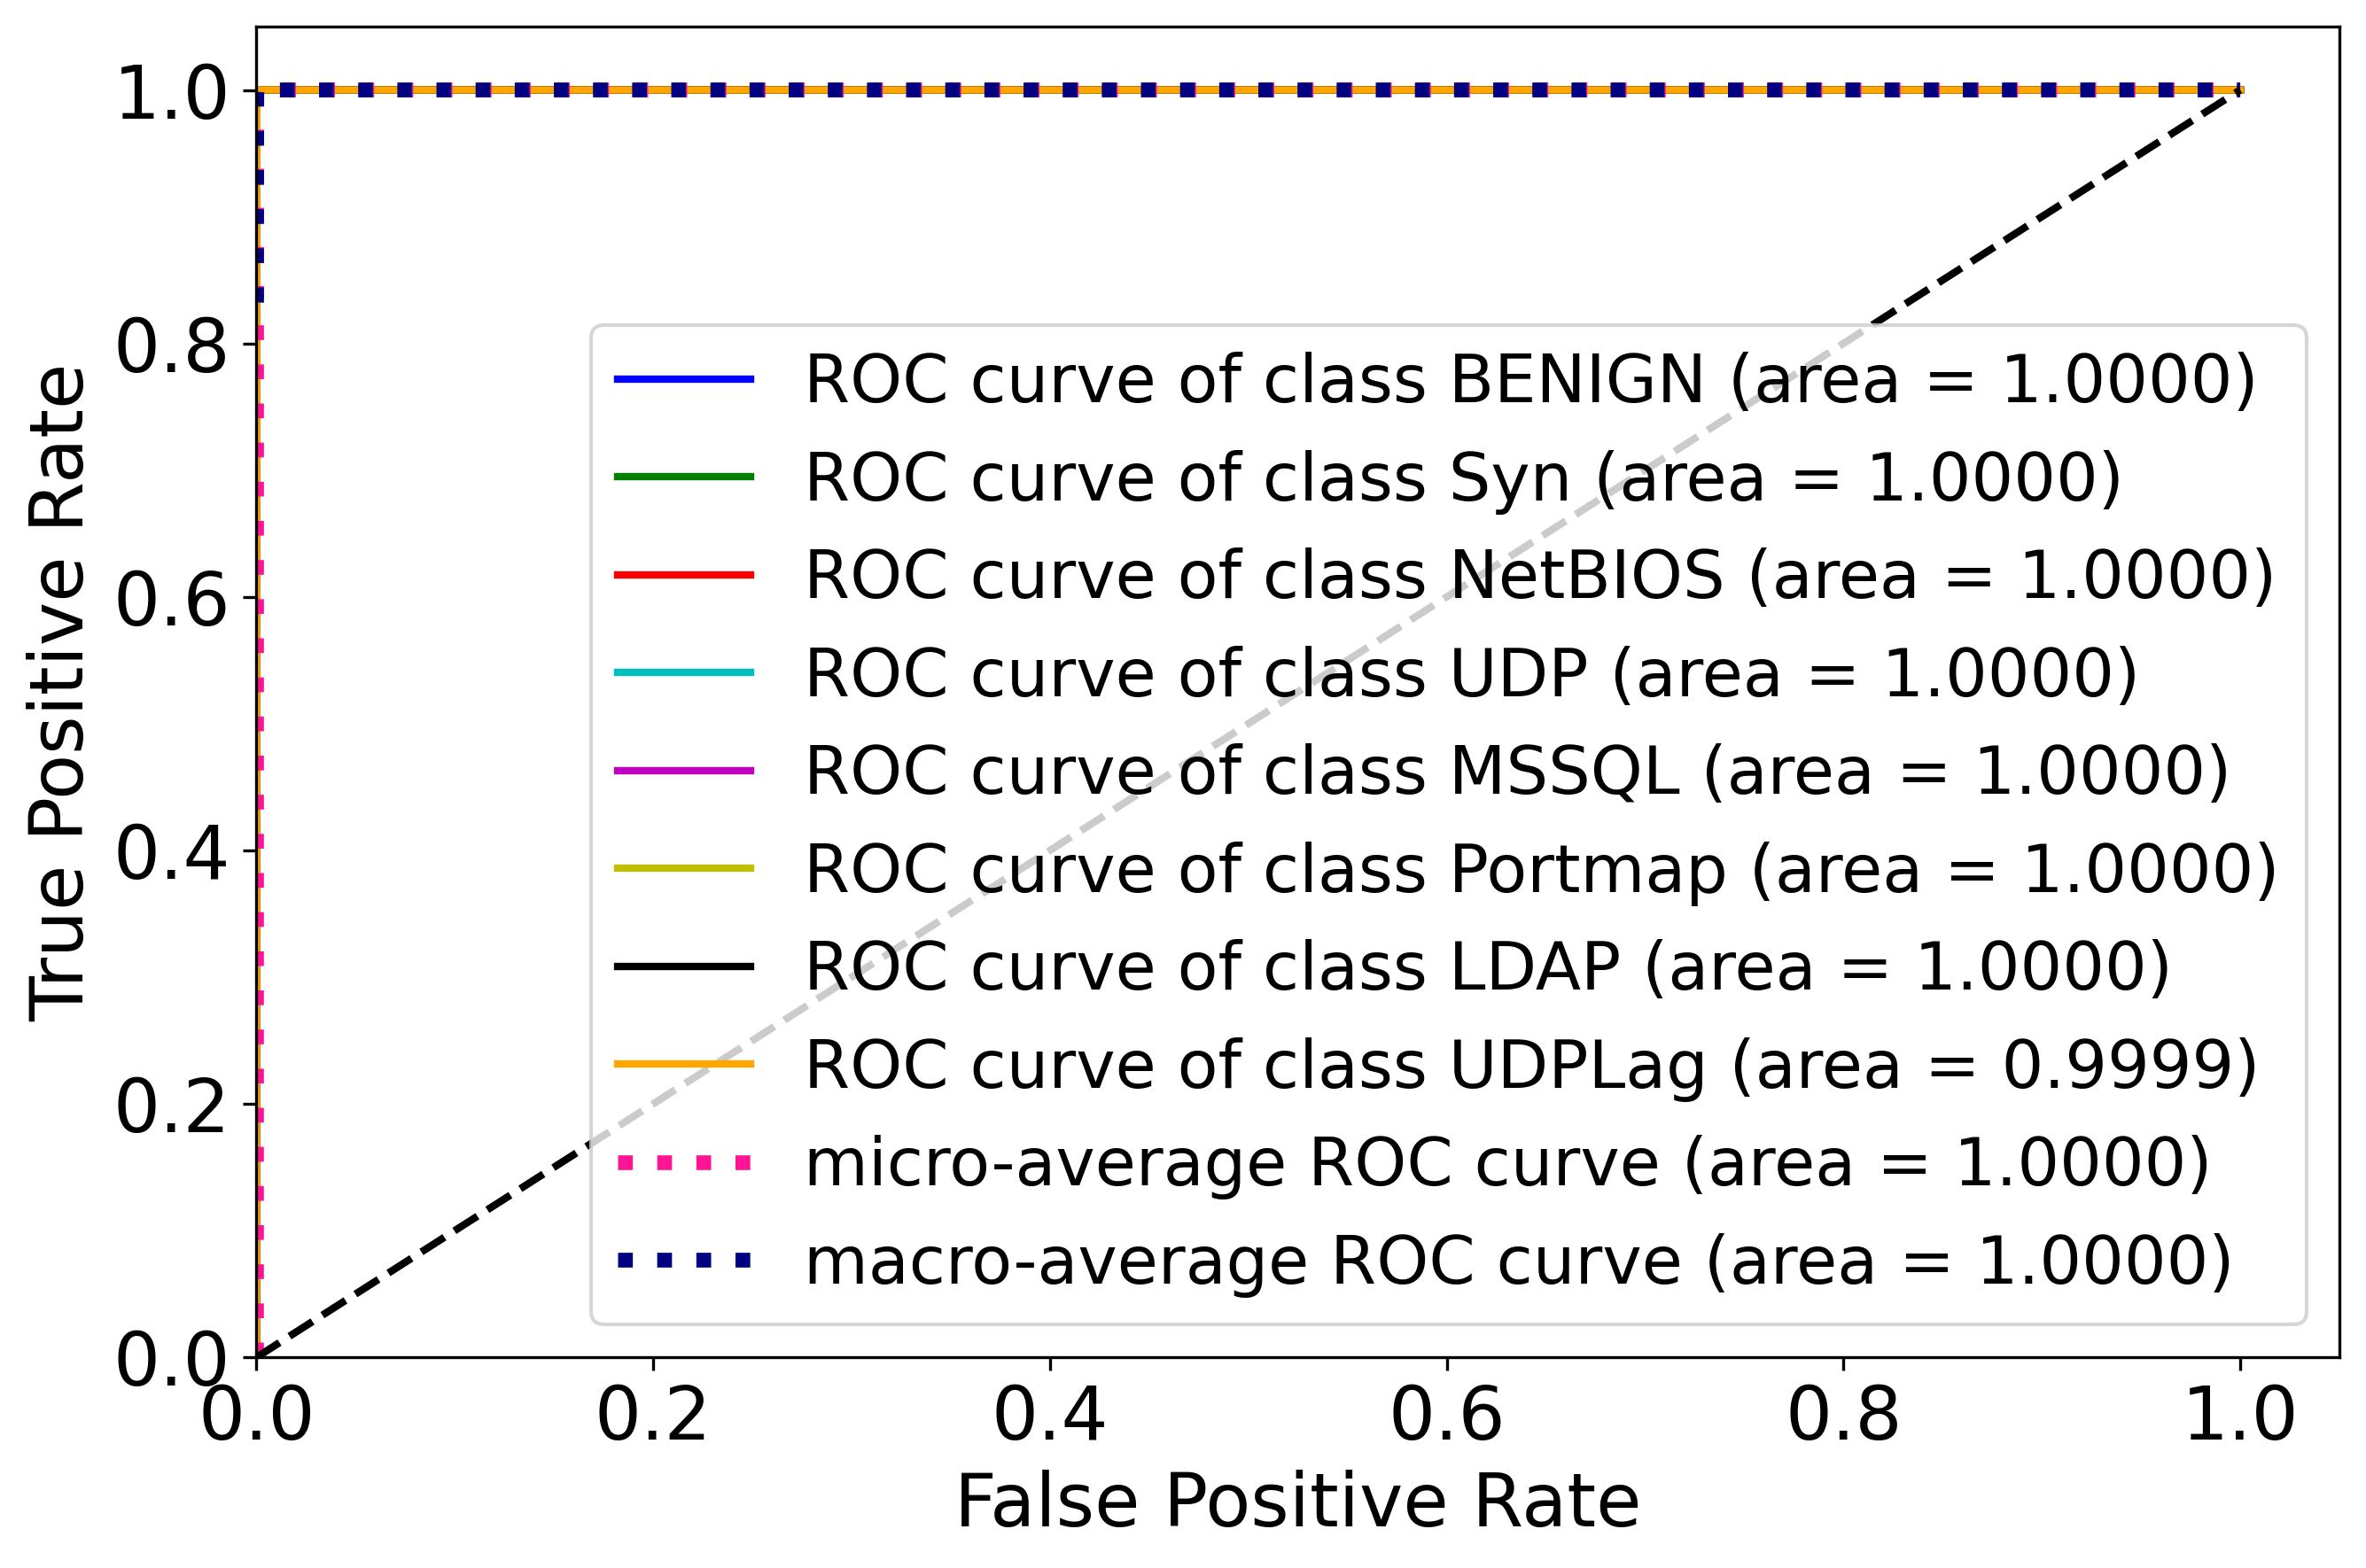

In [ ]:
## September plot loss , acc , roc , conf mat ..svg jpeg
# Nov7
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize

# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the pre-trained model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
bigru_attention_model = load_model(checkpoint_path)

# Load the training history
history_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MDcic2023_history_0725.npz'
history = np.load(history_path, allow_pickle=True)
history = {key: history[key] for key in history}

### load predicaiton test data
save_dir = '/content/drive/MyDrive/IDS-Research/train_test_data_cicddos2019'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save data
# np.save(os.path.join(save_dir, 'X_train1.npy'), X_train1)
# np.save(os.path.join(save_dir, 'X_test1.npy'), X_test1)
# np.save(os.path.join(save_dir, 'Y_train.npy'), Y_train)
# np.save(os.path.join(save_dir, 'Y_test.npy'), Y_test)



# Load data
# X_train1 = np.load(os.path.join(save_dir, 'X_train1.npy'))
X_test1 = np.load(os.path.join(save_dir, 'X_test1.npy'))
# Y_train = np.load(os.path.join(save_dir, 'Y_train.npy'))
Y_test = np.load(os.path.join(save_dir, 'Y_test.npy'))

# Make predictions
y_pred_probs = bigru_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot accuracy
# Plot accuracy
plt.figure(figsize=(6.0, 4.0), dpi=300)
plt.plot(history['accuracy'][1:], color="green", marker='o', label='Train')
plt.plot(history['val_accuracy'][1:], color="blue", marker='o', label='Validation')
plt.title('Model Accuracy', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.xticks(np.arange(0, len(history['accuracy'][1:]), step=5), fontsize=20)
plt.yticks(fontsize=18)
plt.legend(loc='lower right', fontsize=20)
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Model_Accuracy_2019_SP_1105.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

# Plot loss
plt.figure(figsize=(6.0, 4.0), dpi=300)
plt.plot(history['loss'][1:], color="green", marker='o', label='Train')
plt.plot(history['val_loss'][1:], color="blue", marker='o', label='Validation')
plt.title('Model Loss', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.xticks(np.arange(0, len(history['loss'][1:]), step=5), fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Model_Loss_2019_SP_1105.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
plt.show()


# # Confusion matrix
# cm = confusion_matrix(Y_test, y_pred, normalize='true')
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'], yticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'])
# plt.title('Normalized Confusion Matrix')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.tight_layout()
# # plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019.svg'), format='svg')
# plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019_SP.jpeg'), format='jpeg')
# plt.show()

# Confusion matrix
# Confusion matrix
cm = confusion_matrix(Y_test, y_pred, normalize='true')
plt.figure(figsize=(9.0, 6.0), dpi=300)
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'],
            yticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'],
            cbar_kws={'shrink': 0.75,'ticks':np.arange(0.0, 1.1, 0.2)},annot_kws={"size": 16},vmin=0.0, vmax=1.0)  # Shrink color bar to fit better
plt.xlabel('Predicted labels', fontsize=20)
plt.ylabel('True labels', fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=0)  # Keep y-ticks horizontal to avoid overlap
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019_SP_1107.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
# plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019_1105.svg'), format='svg', dpi=300, bbox_inches='tight')
plt.show()


### compute

# Compute ROC curve and ROC area for each class
# Plot ROC curves for each class, micro-average, and macro-average
# Compute ROC curve and ROC area for each class
Y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = Y_test_binarized.shape[1]
fpr, tpr, roc_auc = {}, {}, {}

# Calculate FPR, TPR and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_binarized.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
####

####
# Plot ROC curves for each class, micro-average, and macro-average
plt.figure(figsize=(9.0, 6.0), dpi=300)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {["BENIGN", "Syn", "NetBIOS", "UDP", "MSSQL", "Portmap", "LDAP", "UDPLag"][i]} (area = {roc_auc[i]:.4f})')
plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:.4f})',
         color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:.4f})',
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
plt.xticks(np.arange(0.0, 1.1, step=0.2), fontsize=20)  # Set x-ticks
plt.yticks(np.arange(0.0, 1.1, step=0.2), fontsize=20)  # Set y-ticks
plt.legend(loc="lower right", fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'ROC_Curves_2019_SP_1107.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(plot_directory, 'ROC_Curves_2019_SP_1107.svg'), format='svg', dpi=300, bbox_inches='tight')
plt.show()




In [ ]:
## March for review
## September plot loss , acc , roc , conf mat ..svg jpeg
# Nov7
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize

# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the pre-trained model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
bigru_attention_model = load_model(checkpoint_path)

# Load the training history
history_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MDcic2023_history_0725.npz'
history = np.load(history_path, allow_pickle=True)
history = {key: history[key] for key in history}

### load predicaiton test data
save_dir = '/content/drive/MyDrive/IDS-Research/train_test_data_cicddos2019'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save data
# np.save(os.path.join(save_dir, 'X_train1.npy'), X_train1)
# np.save(os.path.join(save_dir, 'X_test1.npy'), X_test1)
# np.save(os.path.join(save_dir, 'Y_train.npy'), Y_train)
# np.save(os.path.join(save_dir, 'Y_test.npy'), Y_test)



# Load data
# X_train1 = np.load(os.path.join(save_dir, 'X_train1.npy'))
X_test1 = np.load(os.path.join(save_dir, 'X_test1.npy'))
# Y_train = np.load(os.path.join(save_dir, 'Y_train.npy'))
Y_test = np.load(os.path.join(save_dir, 'Y_test.npy'))

# Make predictions
y_pred_probs = bigru_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot accuracy
# Plot accuracy
plt.figure(figsize=(6.0, 4.0), dpi=300)
plt.plot(history['accuracy'][1:], color="green", marker='o', label='Train')
plt.plot(history['val_accuracy'][1:], color="blue", marker='o', label='Validation')
plt.title('Model Accuracy', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.xticks(np.arange(0, len(history['accuracy'][1:]), step=5), fontsize=20)
plt.yticks(fontsize=18)
plt.legend(loc='lower right', fontsize=20)
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Model_Accuracy_2019_SP_1105.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

# Plot loss
plt.figure(figsize=(6.0, 4.0), dpi=300)
plt.plot(history['loss'][1:], color="green", marker='o', label='Train')
plt.plot(history['val_loss'][1:], color="blue", marker='o', label='Validation')
plt.title('Model Loss', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.xticks(np.arange(0, len(history['loss'][1:]), step=5), fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Model_Loss_2019_SP_1105.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
plt.show()


# # Confusion matrix
# cm = confusion_matrix(Y_test, y_pred, normalize='true')
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'], yticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'])
# plt.title('Normalized Confusion Matrix')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.tight_layout()
# # plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019.svg'), format='svg')
# plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019_SP.jpeg'), format='jpeg')
# plt.show()

# Confusion matrix
# Confusion matrix
cm = confusion_matrix(Y_test, y_pred, normalize='true')
plt.figure(figsize=(9.0, 6.0), dpi=300)
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'],
            yticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'],
            cbar_kws={'shrink': 0.75,'ticks':np.arange(0.0, 1.1, 0.2)},annot_kws={"size": 16},vmin=0.0, vmax=1.0)  # Shrink color bar to fit better
plt.xlabel('Predicted labels', fontsize=20)
plt.ylabel('True labels', fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=0)  # Keep y-ticks horizontal to avoid overlap
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019_SP_1107.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
# plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019_1105.svg'), format='svg', dpi=300, bbox_inches='tight')
plt.show()


### compute

# Compute ROC curve and ROC area for each class
# Plot ROC curves for each class, micro-average, and macro-average
# Compute ROC curve and ROC area for each class
Y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = Y_test_binarized.shape[1]
fpr, tpr, roc_auc = {}, {}, {}

# Calculate FPR, TPR and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_binarized.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
####

####
# Plot ROC curves for each class, micro-average, and macro-average
plt.figure(figsize=(9.0, 6.0), dpi=300)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {["BENIGN", "Syn", "NetBIOS", "UDP", "MSSQL", "Portmap", "LDAP", "UDPLag"][i]} (area = {roc_auc[i]:.4f})')
plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:.4f})',
         color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:.4f})',
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
plt.xticks(np.arange(0.0, 1.1, step=0.2), fontsize=20)  # Set x-ticks
plt.yticks(np.arange(0.0, 1.1, step=0.2), fontsize=20)  # Set y-ticks
plt.legend(loc="lower right", fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'ROC_Curves_2019_SP_1107.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(plot_directory, 'ROC_Curves_2019_SP_1107.svg'), format='svg', dpi=300, bbox_inches='tight')
plt.show()




OSError: No file or directory found at /content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5

9156/9156 [==============================] - 746s 81ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2184
           1       0.98      1.00      0.99      1963
           2       1.00      1.00      1.00     39342
           3       1.00      1.00      1.00     72494
           4       1.00      1.00      1.00     35332
           5       1.00      1.00      1.00     86186
           6       1.00      1.00      1.00     55090
           7       0.92      0.92      0.92       382

    accuracy                           1.00    292973
   macro avg       0.99      0.99      0.99    292973
weighted avg       1.00      1.00      1.00    292973



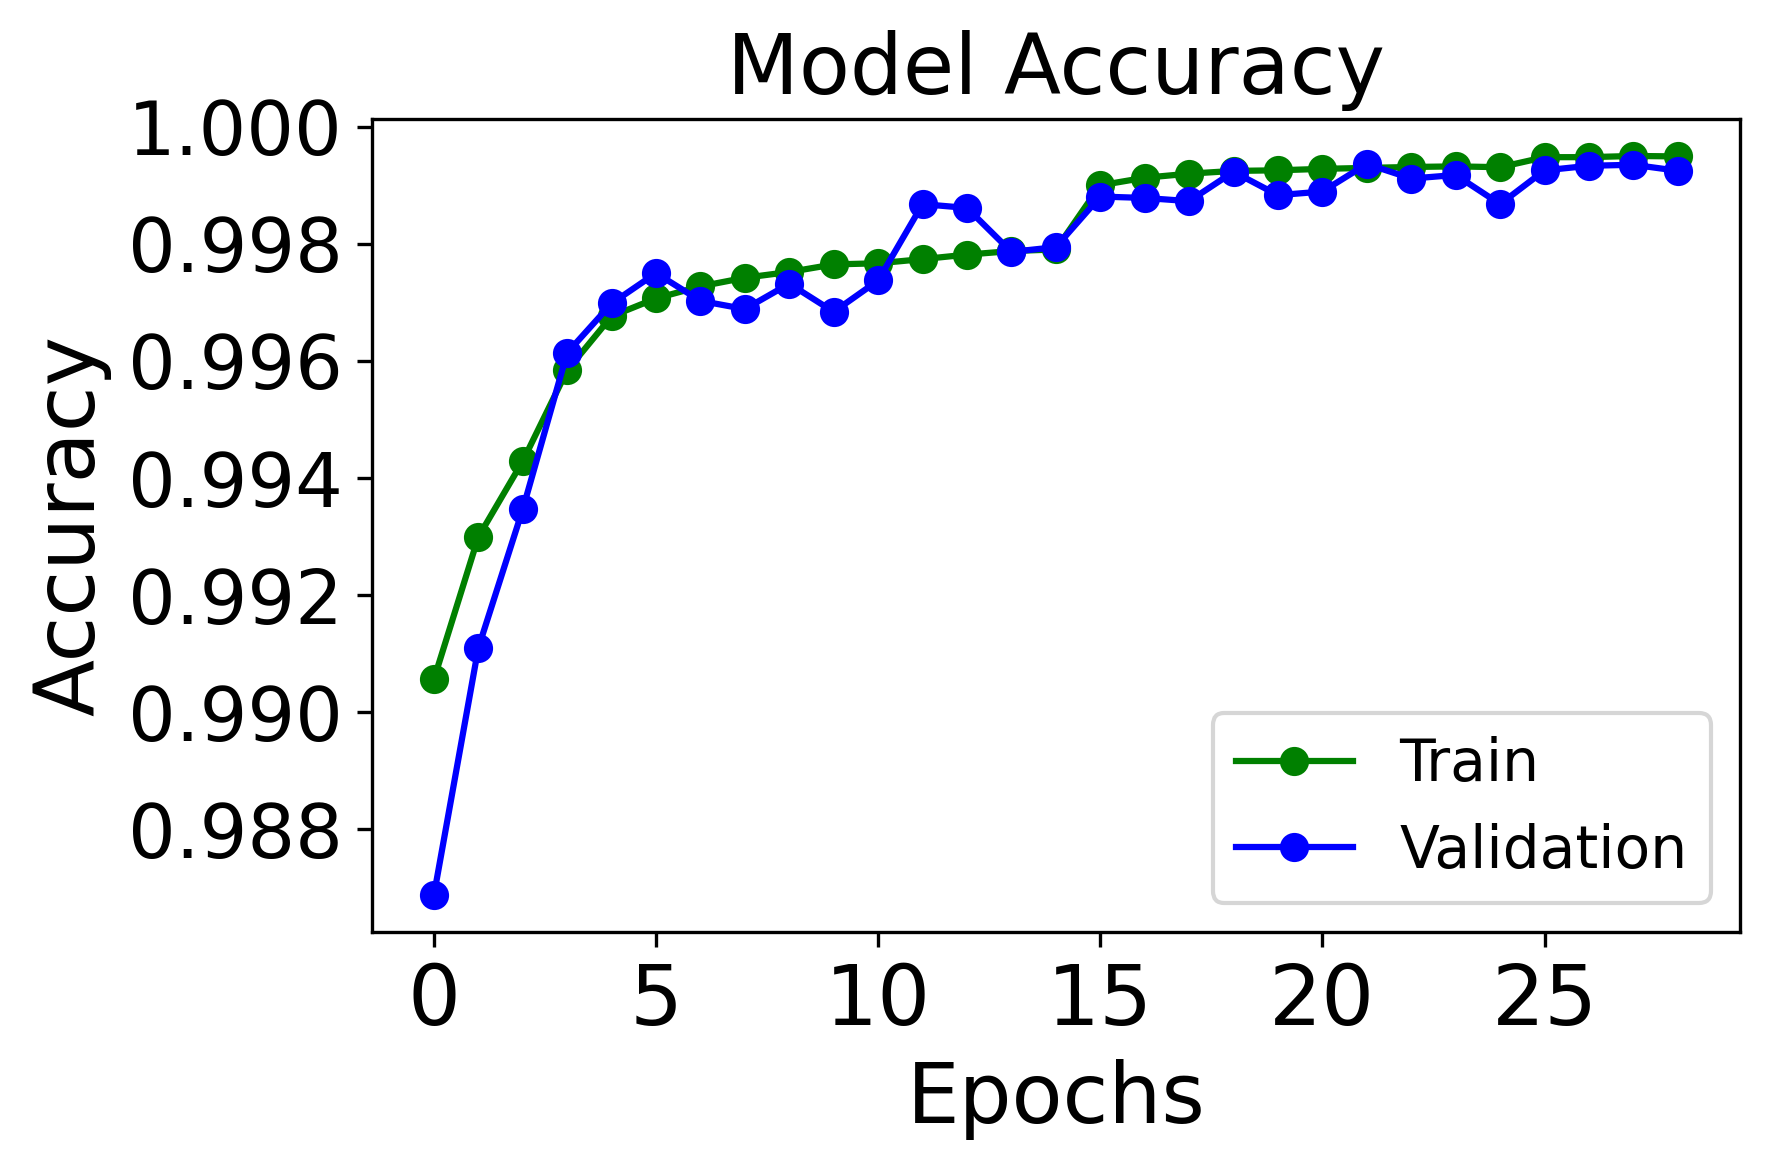

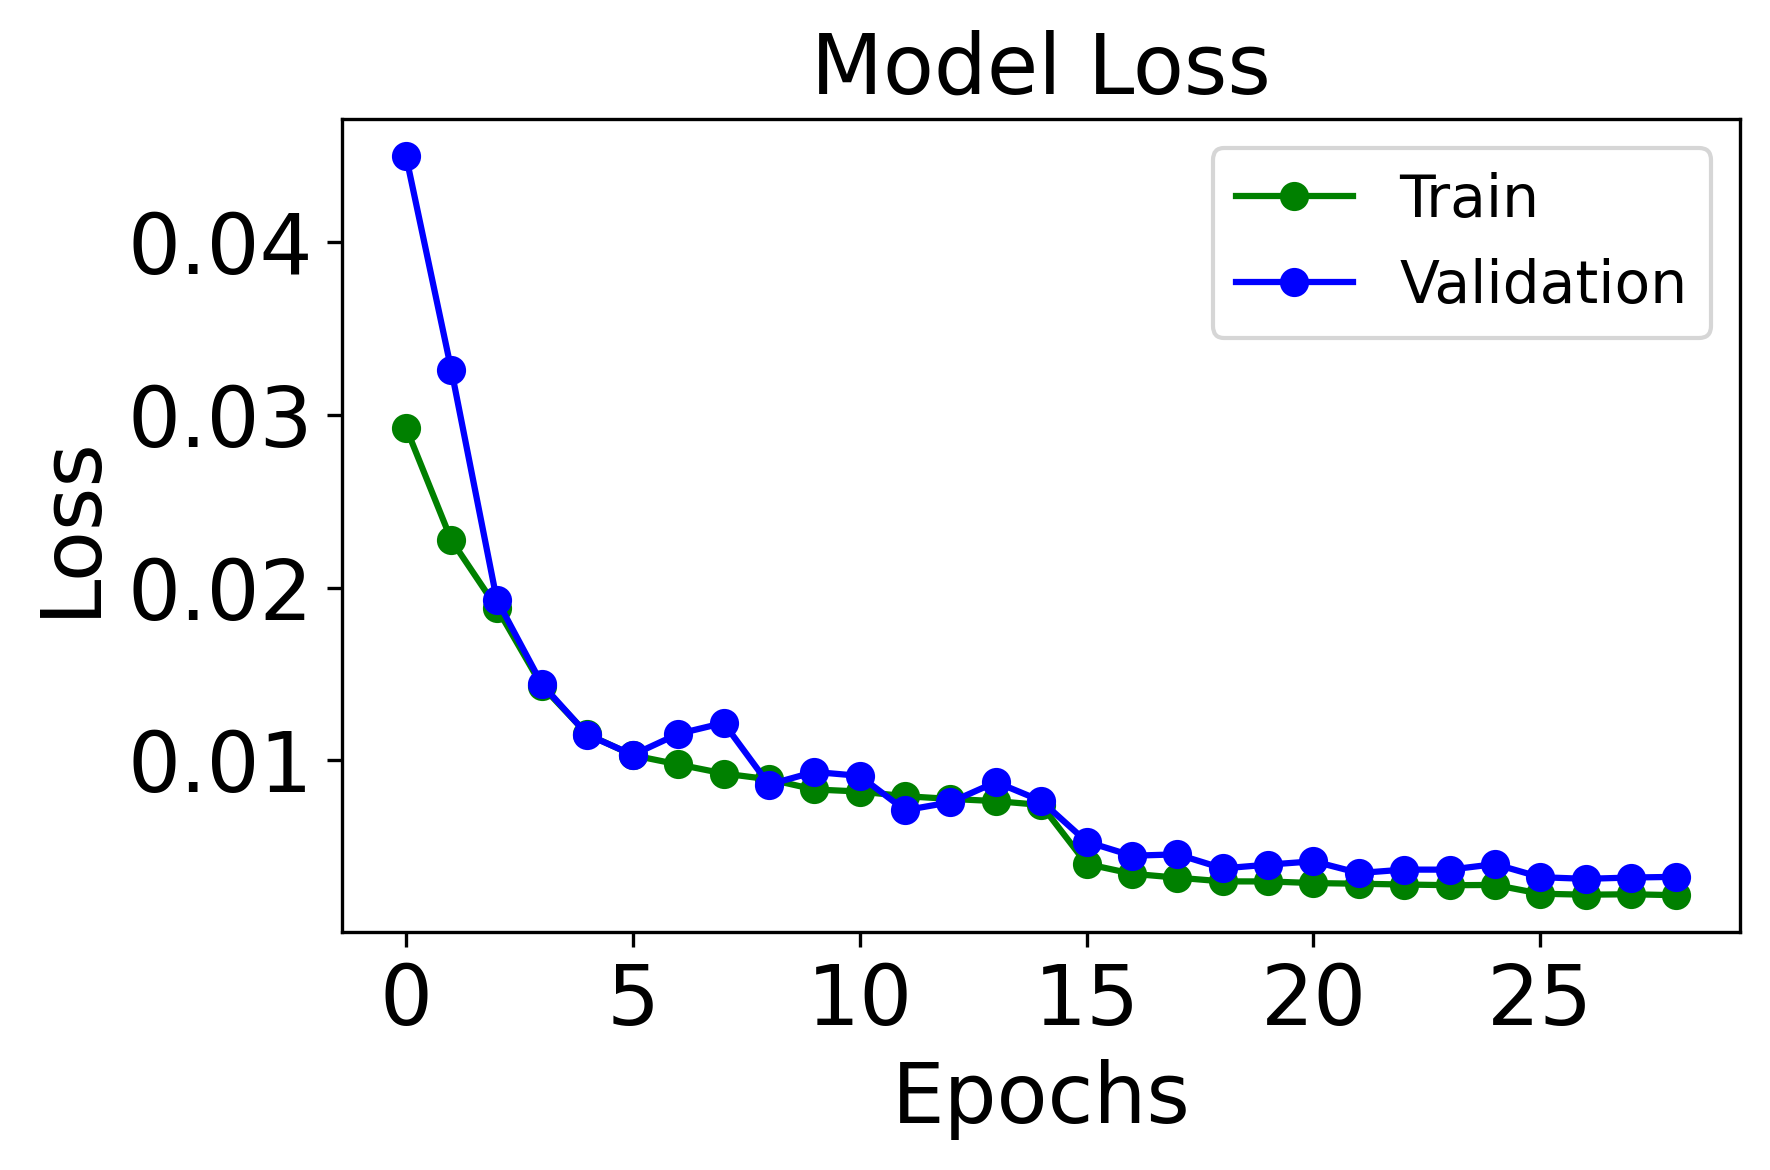

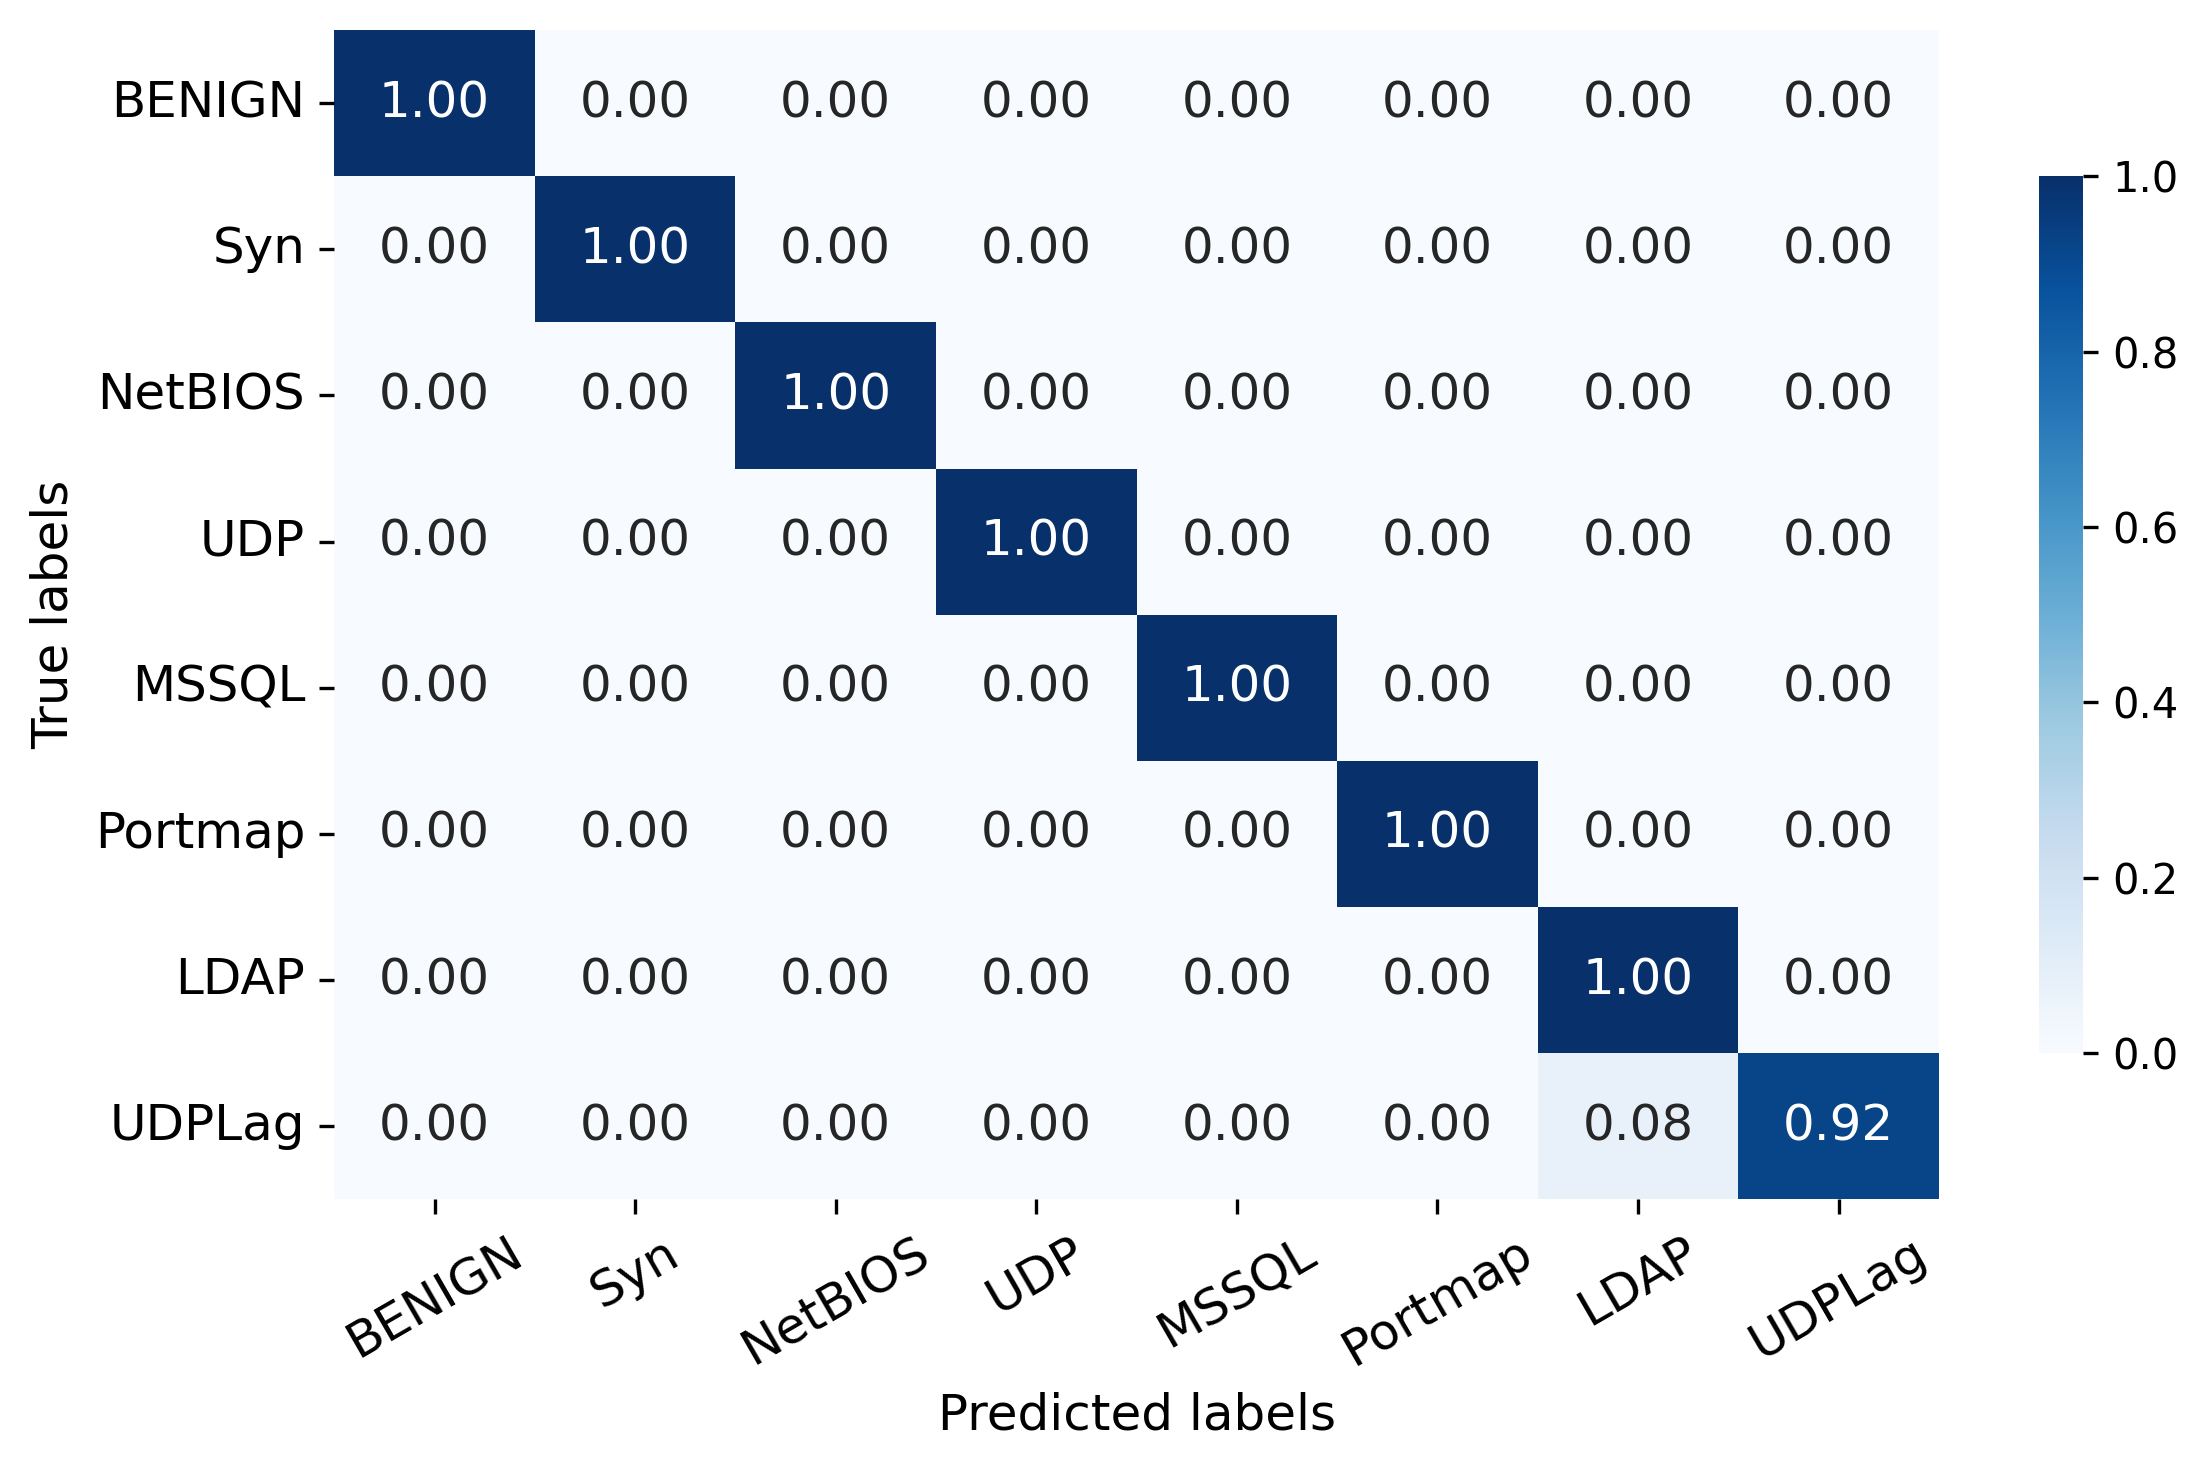

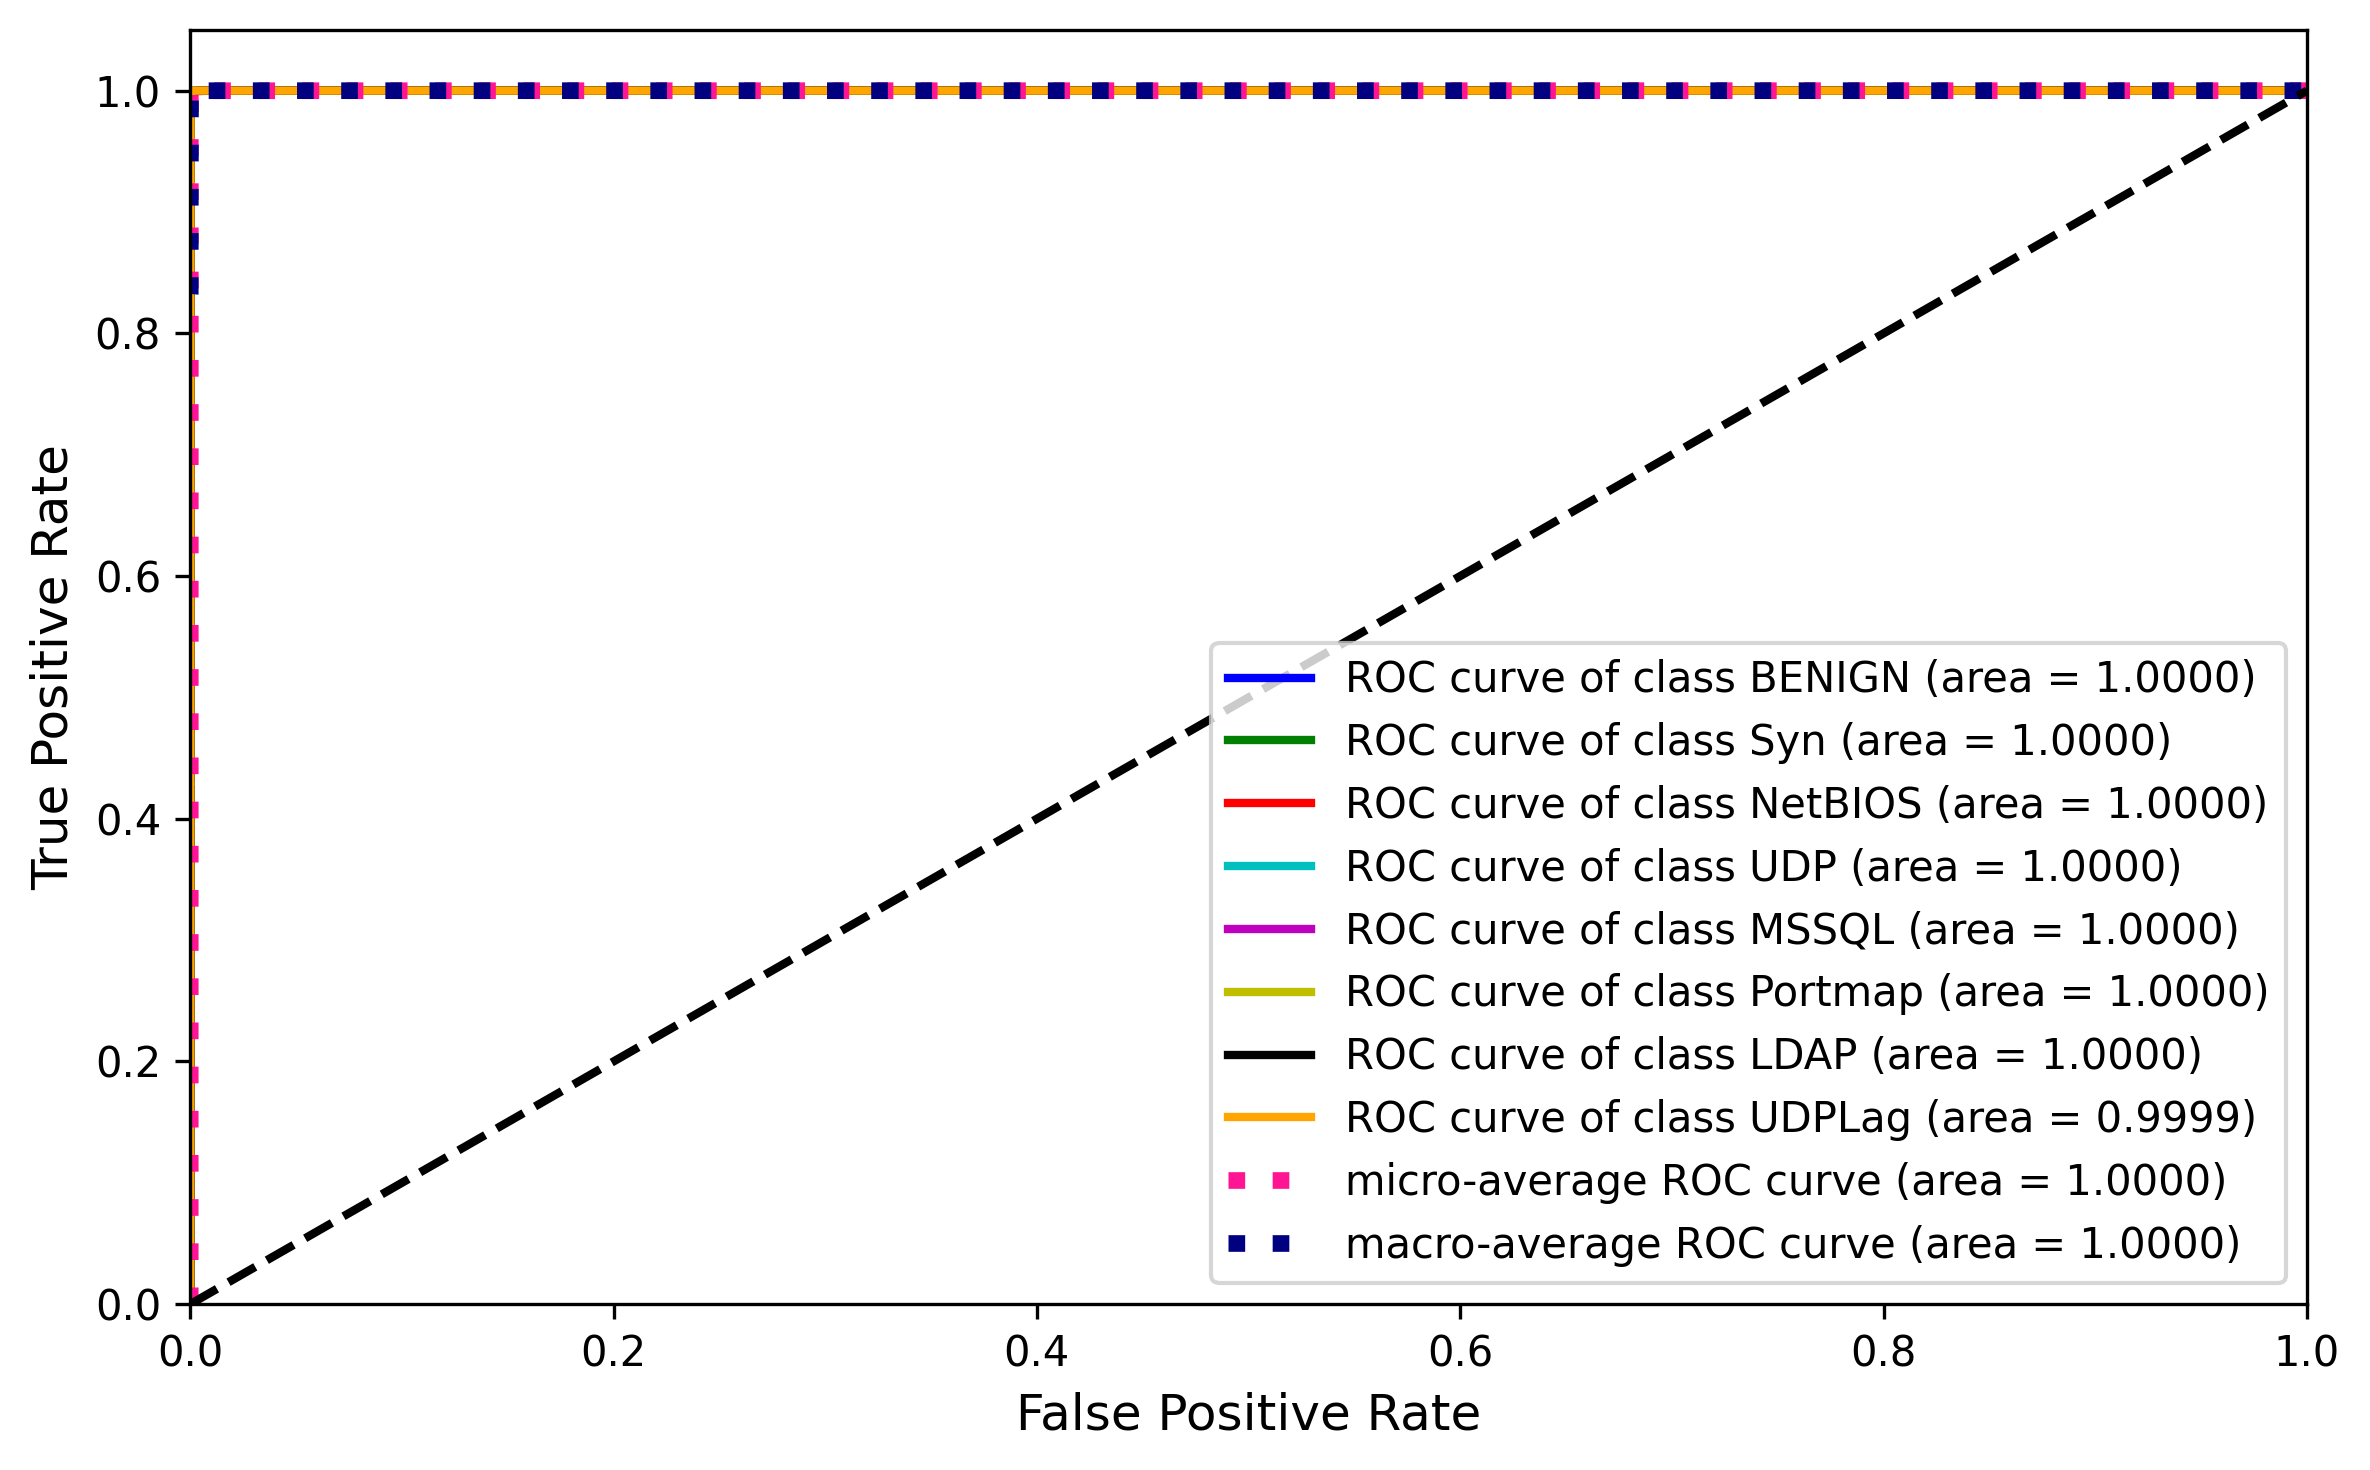

In [ ]:
# november
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize

# Directory for plots
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the model and data
checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
bigru_attention_model = load_model(checkpoint_path)

history_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MDcic2023_history_0725.npz'
history = np.load(history_path, allow_pickle=True)
history = {key: history[key] for key in history}

save_dir = '/content/drive/MyDrive/IDS-Research/train_test_data_cicddos2019'
os.makedirs(save_dir, exist_ok=True)

# Load test data
X_test1 = np.load(os.path.join(save_dir, 'X_test1.npy'))
Y_test = np.load(os.path.join(save_dir, 'Y_test.npy'))

# Make predictions
y_pred_probs = bigru_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

# Plot accuracy
plt.figure(figsize=(6.0, 4.0), dpi=300)
plt.plot(history['accuracy'][1:], color="green", marker='o', label='Train')
plt.plot(history['val_accuracy'][1:], color="blue", marker='o', label='Validation')
plt.title('Model Accuracy', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.xticks(np.arange(0, len(history['accuracy'][1:]), step=5), fontsize=20)
plt.yticks(fontsize=18)
plt.legend(loc='lower right', fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Model_Accuracy_2019_SP_1106.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

# Plot loss
plt.figure(figsize=(6.0, 4.0), dpi=300)
plt.plot(history['loss'][1:], color="green", marker='o', label='Train')
plt.plot(history['val_loss'][1:], color="blue", marker='o', label='Validation')
plt.title('Model Loss', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.xticks(np.arange(0, len(history['loss'][1:]), step=5), fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper right', fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Model_Loss_2019_SP_1106.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred, normalize='true')
plt.figure(figsize=(8.0, 5.0), dpi=300)
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'],
            yticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'],
            cbar_kws={'shrink': 0.75}, annot_kws={"size": 12})
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019_SP_1106.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019_1106.svg'), format='svg', dpi=300, bbox_inches='tight')
plt.show()

# ROC curve for each class
Y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = Y_test_binarized.shape[1]
fpr, tpr, roc_auc = {}, {}, {}

# Calculate FPR, TPR, and AUC
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average and Macro-average
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_binarized.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(8.0, 5.0), dpi=300)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {["BENIGN", "Syn", "NetBIOS", "UDP", "MSSQL", "Portmap", "LDAP", "UDPLag"][i]} (area = {roc_auc[i]:.4f})')
plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:.4f})',
         color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:.4f})',
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Adjusting the legend further to make it smaller
plt.legend(loc="lower right", fontsize=10)

plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'ROC_Curves_2019_SP_1106.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(plot_directory, 'ROC_Curves_2019_SP_1106.svg'), format='svg', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
## Aug == > plot loss , acc , roc , conf mat ..svg jpeg
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize

# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the pre-trained model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
bigru_attention_model = load_model(checkpoint_path)

# Load the training history
history_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MDcic2023_history_0725.npz'
history = np.load(history_path, allow_pickle=True)
history = {key: history[key] for key in history}

# Make predictions
y_pred_probs = bigru_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history['accuracy'], color="green", marker='o', label='Train')
plt.plot(history['val_accuracy'], color="blue", marker='o', label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(0, 31, 5))  # Ticks every 5 epochs
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Model_Accuracy_2019.svg'), format='svg')
plt.savefig(os.path.join(plot_directory, 'Model_Accuracy_2019.jpeg'), format='jpeg')
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(history['loss'], color="green", marker='o', label='Train')
plt.plot(history['val_loss'], color="blue", marker='o', label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(0, 31, 5))  # Ticks every 5 epochs
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Model_Loss_2019.svg'), format='svg')
plt.savefig(os.path.join(plot_directory, 'Model_Loss_2019.jpeg'), format='jpeg')
plt.show()

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'], yticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'])
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019.svg'), format='svg')
plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019.jpeg'), format='jpeg')
plt.show()

# Compute ROC curve and ROC area for each class
n_classes = len(np.unique(Y_test))
y_test_binarized = label_binarize(Y_test, classes=np.arange(n_classes))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves for each class, micro-average, and macro-average
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {["BENIGN", "Syn", "NetBIOS", "UDP", "MSSQL", "Portmap", "LDAP", "UDPLag"][i]} (area = {roc_auc[i]:.4f})')
plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:.4f})',
         color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro-average ROC curve (area = {roc_auc["macro"]:.4f})',
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'ROC_Curves_2019.svg'), format='svg')
plt.savefig(os.path.join(plot_directory, 'ROC_Curves_2019.jpeg'), format='jpeg')
plt.show()



ValueError: Unrecognized keyword arguments passed to GRU: {'time_major': False}

In [ ]:
####################
# Uninstall current versions of TensorFlow and Keras
!pip uninstall tensorflow keras -y

# Install specific compatible versions of TensorFlow and Keras
!pip install tensorflow==2.12 keras==2.12

# Check installed versions to confirm
import tensorflow as tf
import keras

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: keras 3.4.1
Uninstalling keras-3.4.1:
  Successfully uninstalled keras-3.4.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 113.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1

TensorFlow version: 2.17.0
Keras version: 3.4.1


In [ ]:
#AUG 06 -  recall , accuracy , FPR ...
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the pre-trained model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
bigru_attention_model = load_model(checkpoint_path)

# Load the training history
history_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MDcic2023_history_0725.npz'
history = np.load(history_path, allow_pickle=True)
history = {key: history[key] for key in history}

# Make predictions
y_pred_probs = bigru_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Per-class metrics
def calculate_metrics(cm):
    # Initialize dictionaries to store metrics for each class
    metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'fpr': []}

    # Calculate metrics for each class
    for i in range(len(cm)):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)

        # Accuracy
        ACC = (TP + TN) / (TP + FP + FN + TN)
        # Precision
        Precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        # Recall
        Recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        # F1-score
        F1 = 2 * Precision * Recall / (Precision + Recall) if (Precision + Recall) != 0 else 0
        # False Positive Rate (FPR)
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0

        # Store metrics
        metrics['accuracy'].append(ACC)
        metrics['precision'].append(Precision)
        metrics['recall'].append(Recall)
        metrics['f1_score'].append(F1)
        metrics['fpr'].append(FPR)

    return metrics

# Calculate per-class metrics
metrics = calculate_metrics(cm)

# Print metrics
class_names = ['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag']
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"Accuracy: {metrics['accuracy'][i]:.4f}")
    print(f"Precision: {metrics['precision'][i]:.4f}")
    print(f"Recall: {metrics['recall'][i]:.4f}")
    print(f"F1-score: {metrics['f1_score'][i]:.4f}")
    print(f"FPR: {metrics['fpr'][i]:.4f}")
    print("-" * 30)

# Plot class-wise metrics
metrics_data = {
    'Class': class_names,
    'Accuracy': metrics['accuracy'],
    'Precision': metrics['precision'],
    'Recall': metrics['recall'],
    'F1-score': metrics['f1_score'],
    'FPR': metrics['fpr']
}

metrics_df = pd.DataFrame(metrics_data)
ax = metrics_df.plot(kind='bar', x='Class', figsize=(8, 5), width=0.7)  # Adjusted bar width
plt.title('Class-wise Performance Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))  # Adjust legend position
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Class_Wise_Performance_Metrics_CICDDOS2019_2.svg'), format='svg', dpi=300)
plt.savefig(os.path.join(plot_directory, 'Class_Wise_Performance_Metrics_CICDDOS2019_2.jpeg'), format='jpeg', dpi=300)
plt.show()


9156/9156 [==============================] - 473s 52ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2184
           1       0.98      1.00      0.99      1963
           2       1.00      1.00      1.00     39342
           3       1.00      1.00      1.00     72494
           4       1.00      1.00      1.00     35332
           5       1.00      1.00      1.00     86186
           6       1.00      1.00      1.00     55090
           7       0.92      0.92      0.92       382

    accuracy                           1.00    292973
   macro avg       0.99      0.99      0.99    292973
weighted avg       1.00      1.00      1.00    292973

Class: BENIGN
Accuracy: 1.0000
Precision: 0.9995
Recall: 1.0000
F1-score: 0.9998
FPR: 0.0000
------------------------------
Class: Syn
Accuracy: 0.9998
Precision: 0.9766
Recall: 0.9985
F1-score: 0.9874
FPR: 0.0002
------------------------------
Class: NetBIOS
Accura

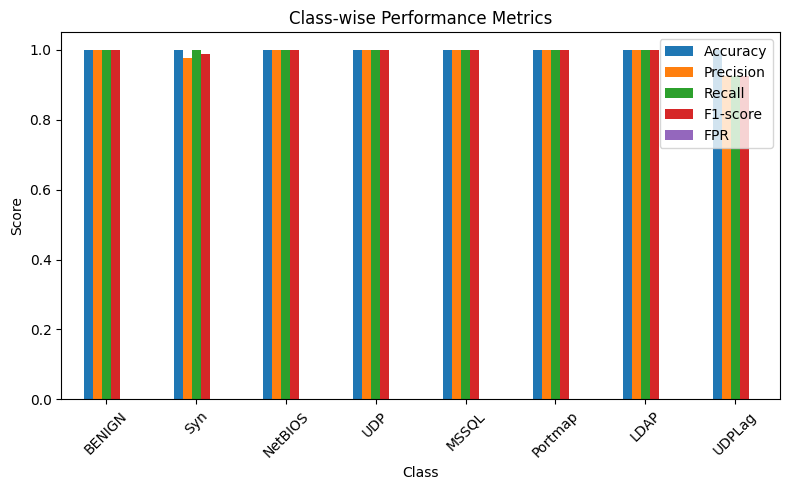

In [ ]:
## cicddos 2019 plot
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd




# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the pre-trained model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
bigru_attention_model = load_model(checkpoint_path)

# Load the training history
history_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MDcic2023_history_0725.npz'
history = np.load(history_path, allow_pickle=True)
history = {key: history[key] for key in history}

# Make predictions
y_pred_probs = bigru_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Per-class metrics
def calculate_metrics(cm):
    # Initialize dictionaries to store metrics for each class
    metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'fpr': []}

    # Calculate metrics for each class
    for i in range(len(cm)):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)

        # Accuracy
        ACC = (TP + TN) / (TP + FP + FN + TN)
        # Precision
        Precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        # Recall
        Recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        # F1-score
        F1 = 2 * Precision * Recall / (Precision + Recall) if (Precision + Recall) != 0 else 0
        # False Positive Rate (FPR)
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0

        # Store metrics
        metrics['accuracy'].append(ACC)
        metrics['precision'].append(Precision)
        metrics['recall'].append(Recall)
        metrics['f1_score'].append(F1)
        metrics['fpr'].append(FPR)

    return metrics

# Calculate per-class metrics
metrics = calculate_metrics(cm)

# Print metrics
class_names = ['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag']
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"Accuracy: {metrics['accuracy'][i]:.4f}")
    print(f"Precision: {metrics['precision'][i]:.4f}")
    print(f"Recall: {metrics['recall'][i]:.4f}")
    print(f"F1-score: {metrics['f1_score'][i]:.4f}")
    print(f"FPR: {metrics['fpr'][i]:.4f}")
    print("-" * 30)

# Plot class-wise metrics
metrics_data = {
    'Class': class_names,
    'Accuracy': metrics['accuracy'],
    'Precision': metrics['precision'],
    'Recall': metrics['recall'],
    'F1-score': metrics['f1_score'],
    'FPR': metrics['fpr']
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df.plot(kind='bar', x='Class', figsize=(8, 5))  # Reduced size and increased DPI
plt.title('Class-wise Performance Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Class_Wise_Performance_Metrics_CICDDOS2019.svg'), format='svg', dpi=300)
plt.savefig(os.path.join(plot_directory, 'Class_Wise_Performance_Metrics_CICDDOS2019.jpeg'), format='jpeg', dpi=300)
plt.show()


9156/9156 [==============================] - 64s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2184
           1       0.98      1.00      0.99      1963
           2       1.00      1.00      1.00     39342
           3       1.00      1.00      1.00     72494
           4       1.00      1.00      1.00     35332
           5       1.00      1.00      1.00     86186
           6       1.00      1.00      1.00     55090
           7       0.92      0.92      0.92       382

    accuracy                           1.00    292973
   macro avg       0.99      0.99      0.99    292973
weighted avg       1.00      1.00      1.00    292973

Class: BENIGN
Accuracy: 1.0000
Precision: 0.9995
Recall: 1.0000
F1-score: 0.9998
FPR: 0.0000
------------------------------
Class: Syn
Accuracy: 0.9998
Precision: 0.9766
Recall: 0.9985
F1-score: 0.9874
FPR: 0.0002
------------------------------
Class: NetBIOS
Accuracy

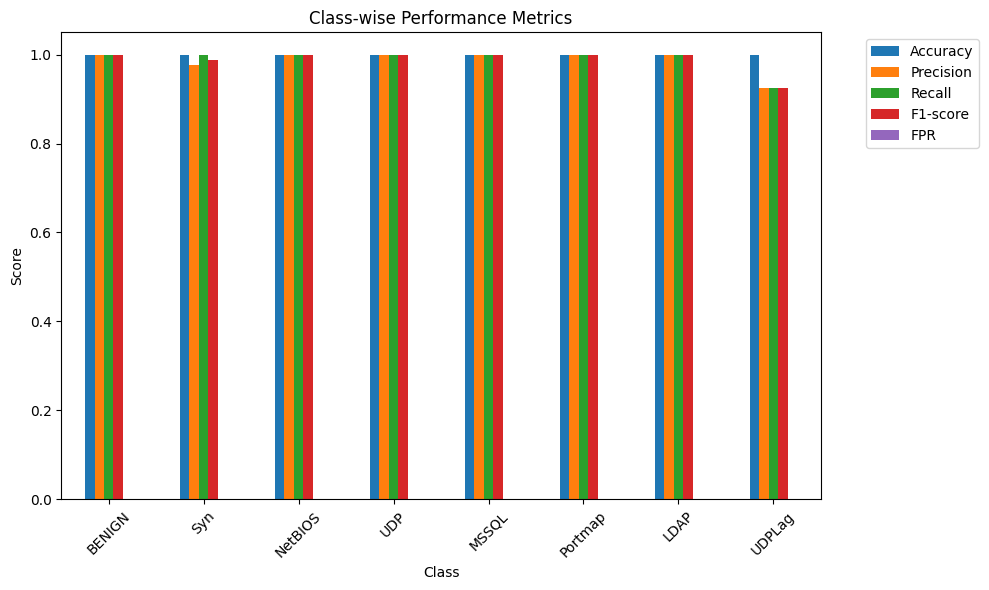

In [ ]:
## cicddos 2019 plot - 2
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the pre-trained model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
bigru_attention_model = load_model(checkpoint_path)

# Load the training history
history_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MDcic2023_history_0725.npz'
history = np.load(history_path, allow_pickle=True)
history = {key: history[key] for key in history}

# Make predictions
y_pred_probs = bigru_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Per-class metrics
def calculate_metrics(cm):
    metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'fpr': []}
    for i in range(len(cm)):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)

        ACC = (TP + TN) / (TP + FP + FN + TN)
        Precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        Recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        F1 = 2 * Precision * Recall / (Precision + Recall) if (Precision + Recall) != 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0

        metrics['accuracy'].append(ACC)
        metrics['precision'].append(Precision)
        metrics['recall'].append(Recall)
        metrics['f1_score'].append(F1)
        metrics['fpr'].append(FPR)

    return metrics

# Calculate per-class metrics
metrics = calculate_metrics(cm)

# Print metrics
class_names = ['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag']
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"Accuracy: {metrics['accuracy'][i]:.4f}")
    print(f"Precision: {metrics['precision'][i]:.4f}")
    print(f"Recall: {metrics['recall'][i]:.4f}")
    print(f"F1-score: {metrics['f1_score'][i]:.4f}")
    print(f"FPR: {metrics['fpr'][i]:.4f}")
    print("-" * 30)

# Plot class-wise metrics
metrics_data = {
    'Class': class_names,
    'Accuracy': metrics['accuracy'],
    'Precision': metrics['precision'],
    'Recall': metrics['recall'],
    'F1-score': metrics['f1_score'],
    'FPR': metrics['fpr']
}

metrics_df = pd.DataFrame(metrics_data)
ax = metrics_df.plot(kind='bar', x='Class', figsize=(10, 6))  # Adjust size for better readability

# Adjust legend to avoid overlap
plt.title('Class-wise Performance Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))  # Position legend outside the plot area
plt.tight_layout()

# Save the plot as SVG and JPEG
plt.savefig(os.path.join(plot_directory, 'Class_Wise_Performance_Metrics_CICDDOS2019.svg'), format='svg', dpi=300)
plt.savefig(os.path.join(plot_directory, 'Class_Wise_Performance_Metrics_CICDDOS2019.jpeg'), format='jpeg', dpi=300)
plt.show()


9156/9156 [==============================] - 65s 7ms/step


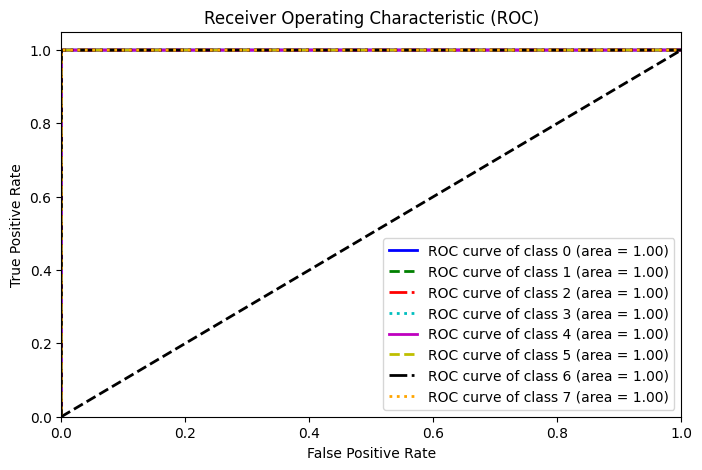

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import roc_curve, auc

# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the trained model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
gru_attention_model = tf.keras.models.load_model(checkpoint_path)

# Assuming X_test1 and Y_test are already defined and loaded
# Make predictions
y_pred_probs = gru_attention_model.predict(X_test1)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(Y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((Y_test == i).astype(int), y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Store the ROC curve values for tweaking
roc_curves = {i: {'fpr': fpr[i], 'tpr': tpr[i], 'auc': roc_auc[i]} for i in range(n_classes)}

# Function to add fixed margins to ROC curves
def add_fixed_margins(roc_curves, margin=0.01):
    for i in range(n_classes):
        roc_curves[i]['fpr'] = np.clip(roc_curves[i]['fpr'] + i * margin, 0, 1)
        roc_curves[i]['tpr'] = np.clip(roc_curves[i]['tpr'] + i * margin, 0, 1)

# Function to plot the ROC curves
def plot_roc_curves(roc_curves):
    plt.figure(figsize=(8, 5))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
    line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':']
    for i, color, line_style in zip(range(n_classes), colors, line_styles):
        plt.plot(roc_curves[i]['fpr'], roc_curves[i]['tpr'], color=color, linestyle=line_style, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_curves[i]['auc']))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.savefig(os.path.join(plot_directory, 'ROC_Curves_with_Fixed_Margins.svg'), format='svg')
    plt.show()

# # Add fixed margins to the ROC curves
# add_fixed_margins(roc_curves)

# Plot the ROC curves with fixed margins
plot_roc_curves(roc_curves)


float64
float64
int64
int64
9156/9156 [==============================] - 644s 70ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2184
           1       0.98      1.00      0.99      1963
           2       1.00      1.00      1.00     39342
           3       1.00      1.00      1.00     72494
           4       1.00      1.00      1.00     35332
           5       1.00      1.00      1.00     86186
           6       1.00      1.00      1.00     55090
           7       0.92      0.92      0.92       382

    accuracy                           1.00    292973
   macro avg       0.99      0.99      0.99    292973
weighted avg       1.00      1.00      1.00    292973



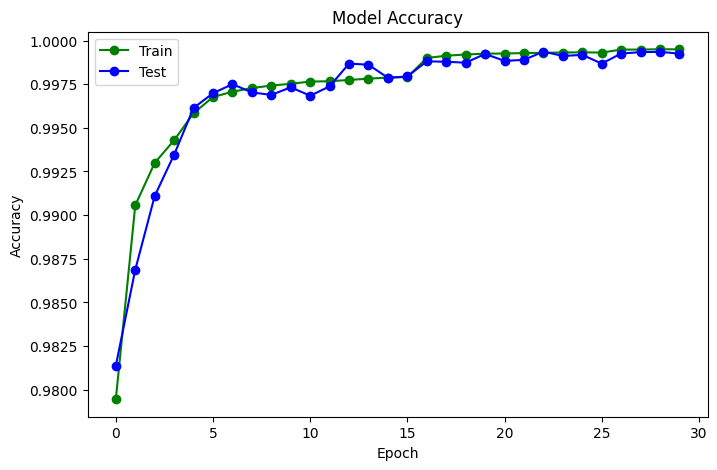

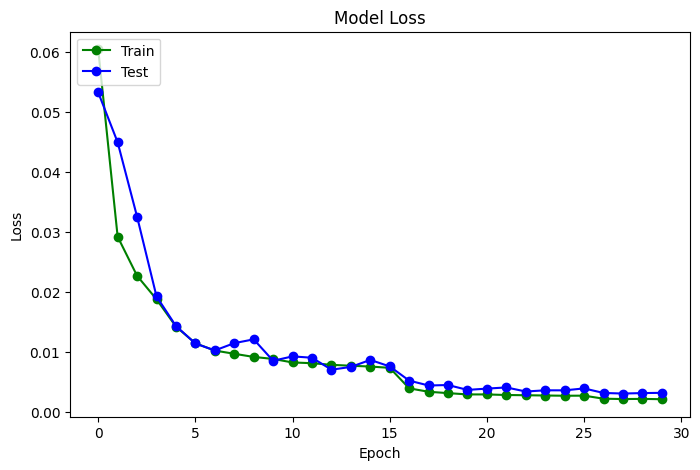

Accuracy : 0.999365129209859
Precision : 0.9993686577709731
Recall of : 0.999365129209859
F1-score : 0.9993660152918351
MCC : 0.9991904893293028
This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.
Confusion matrix


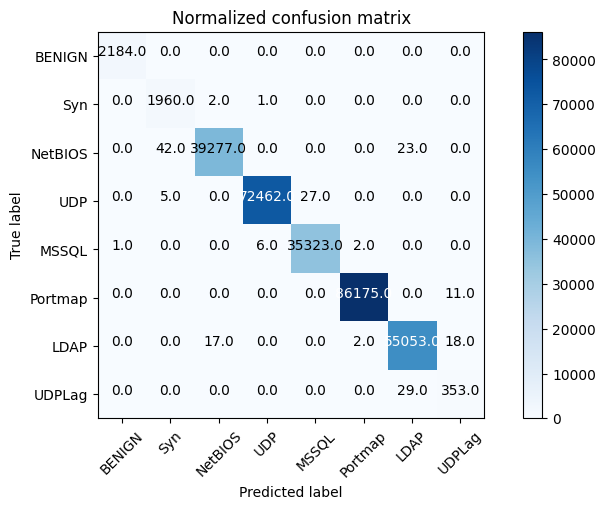

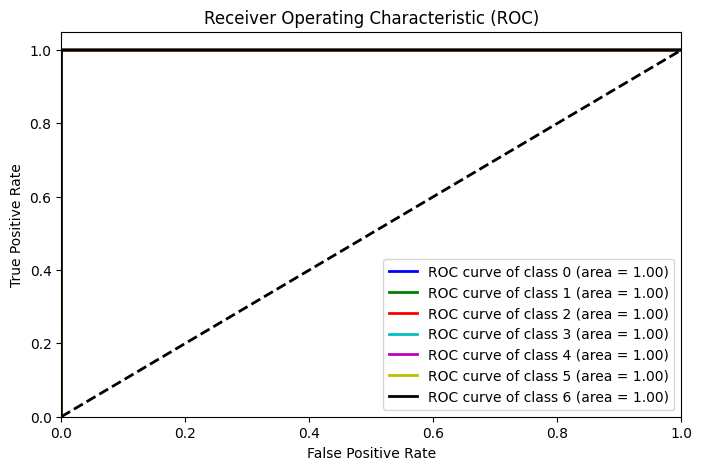

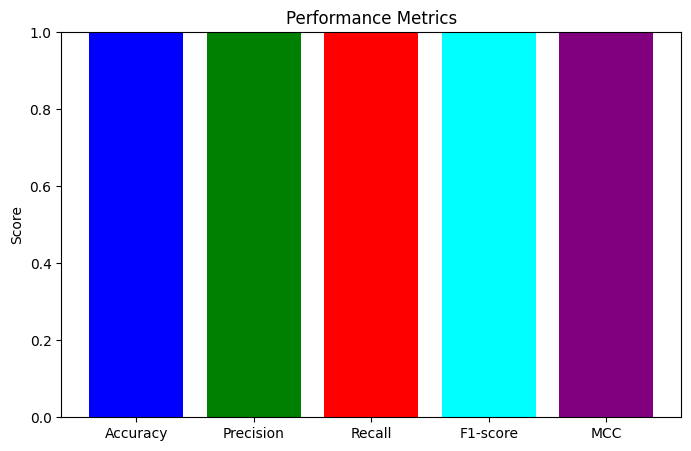

True Positive Rate (TPR/Recall): 0.9899
False Positive Rate (FPR): 0.0001
True Negative Rate (TNR/Specificity): 0.9999
False Discovery Rate (FDR): 0.0128
False Omission Rate (FOR): 0.0001
False Negative Rate (FNR): 0.0101


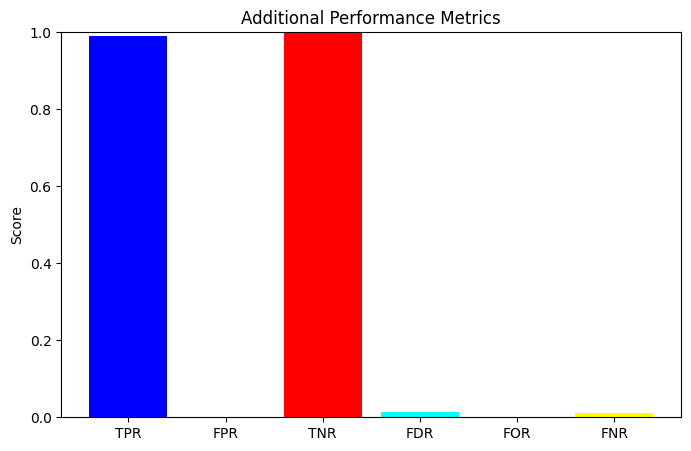

9156/9156 [==============================] - 632s 69ms/step


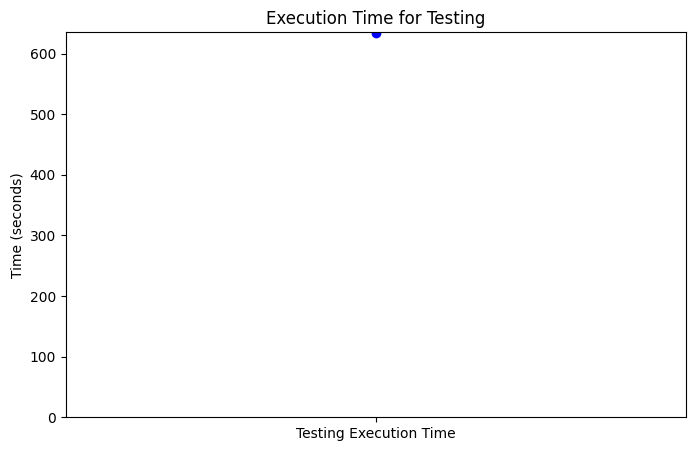

8763/9156 [===========================>..] - ETA: 29s

In [ ]:
### plotttigs for all --
# Imports
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, roc_curve, auc, matthews_corrcoef
import itertools
from keras.models import Model
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
gru_attention_model = tf.keras.models.load_model(checkpoint_path)

# load data
save_dir = '/content/drive/MyDrive/IDS-Research/train_test_data_cicddos2019'



# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save data
# np.save(os.path.join(save_dir, 'X_train1.npy'), X_train1)
# np.save(os.path.join(save_dir, 'X_test1.npy'), X_test1)
# np.save(os.path.join(save_dir, 'Y_train.npy'), Y_train)
# np.save(os.path.join(save_dir, 'Y_test.npy'), Y_test)



# Load data
X_train1 = np.load(os.path.join(save_dir, 'X_train1.npy'))
X_test1 = np.load(os.path.join(save_dir, 'X_test1.npy'))
Y_train = np.load(os.path.join(save_dir, 'Y_train.npy'))
Y_test = np.load(os.path.join(save_dir, 'Y_test.npy'))

# verfiy shape
print(X_train1.dtype)
print(X_test1.dtype)
print(Y_train.dtype)
print(Y_test.dtype)


# Make predictions
y_pred_probs = gru_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate performance metrics for each class
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot accuracy and loss
history_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MDcic2023_history_0725.npz'
history = np.load(history_path)
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

# Summarize history for accuracy
plt.figure(figsize=(8, 5))
plt.plot(accuracy, color="green", marker='o')
plt.plot(val_accuracy, color="blue", marker='o')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(os.path.join(plot_directory, 'Model_Accuracy.svg'), format='svg')
plt.show()

# Summarize history for loss
plt.figure(figsize=(8, 5))
plt.plot(loss, color="green", marker='o')
plt.plot(val_loss, color="blue", marker='o')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(os.path.join(plot_directory, 'Model_Loss.svg'), format='svg')
plt.show()

# Calculate performance metrics
test_accuracy = accuracy_score(Y_test, y_pred)
precision, recall, fscore, _ = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(Y_test, y_pred)

# Print metrics
print('Accuracy : ' + str(test_accuracy))
print('Precision : ' + str(precision))
print('Recall of : ' + str(recall))
print('F1-score : ' + str(fscore))
print('MCC : ' + str(mcc))

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print("This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix")
        fmt = '.1f'  # Format for displaying one significant digit
    else:
        print('Confusion matrix, without normalization')
        fmt = 'd'  # Integer format for non-normalized matrix

    # Plotting normalized or non-normalized values
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot and save confusion matrix
plt.figure(figsize=(8, 5))
plot_confusion_matrix(cm, classes=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'],
                      normalize=True, title='Normalized confusion matrix')
plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix.svg'), format='svg')
plt.show()

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(np.unique(Y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((Y_test == i).astype(int), y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 5))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig(os.path.join(plot_directory, 'ROC_Curves.svg'), format='svg')
plt.show()

# Plot bar graph for Accuracy, Precision, Recall, F1-score, and MCC
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'MCC']
metrics_values = [test_accuracy, precision, recall, fscore, mcc]

plt.figure(figsize=(8, 5))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'cyan', 'purple'])
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.savefig(os.path.join(plot_directory, 'Performance_Metrics_Bar_Graph.svg'), format='svg')
plt.show()

# Compute and plot additional metrics
tp = cm.diagonal()
fp = cm.sum(axis=0) - tp
fn = cm.sum(axis=1) - tp
tn = cm.sum() - (fp + fn + tp)

tpr = tp / (tp + fn)  # True positive rate
fpr = fp / (fp + tn)  # False positive rate
tnr = tn / (tn + fp)  # True negative rate
fdr = fp / (fp + tp)  # False discovery rate
for_rate = fn / (fn + tn)  # False omission rate
fnr = fn / (fn + tp)  # False negative rate

# Print the metrics
print(f"True Positive Rate (TPR/Recall): {np.mean(tpr):.4f}")
print(f"False Positive Rate (FPR): {np.mean(fpr):.4f}")
print(f"True Negative Rate (TNR/Specificity): {np.mean(tnr):.4f}")
print(f"False Discovery Rate (FDR): {np.mean(fdr):.4f}")
print(f"False Omission Rate (FOR): {np.mean(for_rate):.4f}")
print(f"False Negative Rate (FNR): {np.mean(fnr):.4f}")

additional_metrics_names = ['TPR', 'FPR', 'TNR', 'FDR', 'FOR', 'FNR']
additional_metrics_values = [np.mean(tpr), np.mean(fpr), np.mean(tnr), np.mean(fdr), np.mean(for_rate), np.mean(fnr)]

plt.figure(figsize=(8, 5))
plt.bar(additional_metrics_names, additional_metrics_values, color=['blue', 'green', 'red', 'cyan', 'purple', 'yellow'])
plt.title('Additional Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.savefig(os.path.join(plot_directory, 'Extended_Performance_Metrics_Bar_Graph.svg'), format='svg')
plt.show()

# Measure testing time
import time

start_time = time.time()
y_pred_probs = gru_attention_model.predict(X_test1)
end_time = time.time()
testing_time = end_time - start_time

# Plot testing time
# Plot testing time as a line plot
plt.figure(figsize=(8, 5))
plt.plot(['Testing Execution Time'], [testing_time], color='blue', marker='o', linestyle='-')
plt.ylabel('Time (seconds)')
plt.title('Execution Time for Testing')
plt.ylim(0, testing_time + 1)  # Add some space above the maximum value
plt.savefig(os.path.join(plot_directory, 'Testing_Execution_Time.svg'), format='svg')
plt.show()

# Plot attention weights for a sample
attention_model = Model(inputs=gru_attention_model.input, outputs=gru_attention_model.layers[-3].output)
attention_weights = attention_model.predict(X_test1)

# Plot attention weights for one sample
sample_index = 0  # Adjust this index based on which sample you want to visualize
sample_attention_weights = attention_weights[sample_index]
plt.figure(figsize=(8, 6))
sns.heatmap(sample_attention_weights, cmap='viridis')
plt.title(f'Attention Weights Heatmap for Sample Index {sample_index}')
plt.xlabel('Attention Heads')
plt.ylabel('Time Steps')
plt.savefig(os.path.join(plot_directory, f'Attention_Weights_Heatmap_{sample_index}.svg'), format='svg')
plt.show()


In [ ]:
### DATA LOAD AND SAVE save the data to file and re-load them
import numpy as np
import os

# Define paths for saving  and  loading data
save_dir = '/content/drive/MyDrive/IDS-Research/train_test_data_cicddos2019'



# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save data
# np.save(os.path.join(save_dir, 'X_train1.npy'), X_train1)
# np.save(os.path.join(save_dir, 'X_test1.npy'), X_test1)
# np.save(os.path.join(save_dir, 'Y_train.npy'), Y_train)
# np.save(os.path.join(save_dir, 'Y_test.npy'), Y_test)



# Load data
X_train1 = np.load(os.path.join(save_dir, 'X_train1.npy'))
X_test1 = np.load(os.path.join(save_dir, 'X_test1.npy'))
Y_train = np.load(os.path.join(save_dir, 'Y_train.npy'))
Y_test = np.load(os.path.join(save_dir, 'Y_test.npy'))

# verfiy shape
print(X_train1.dtype)
print(X_test1.dtype)
print(Y_train.dtype)
print(Y_test.dtype)

float64
float64
int64
int64


In [ ]:
### DATA LOAD AND SAVE save the data to file and re-load them
import numpy as np
import os

# Define paths for saving  and  loading data
save_dir = '/content/drive/MyDrive/IDS-Research/train_test_data_cicddos2019'



# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save data
# np.save(os.path.join(save_dir, 'X_train1.npy'), X_train1)
# np.save(os.path.join(save_dir, 'X_test1.npy'), X_test1)
# np.save(os.path.join(save_dir, 'Y_train.npy'), Y_train)
# np.save(os.path.join(save_dir, 'Y_test.npy'), Y_test)



# Load data
X_train1 = np.load(os.path.join(save_dir, 'X_train1.npy'))
X_test1 = np.load(os.path.join(save_dir, 'X_test1.npy'))
Y_train = np.load(os.path.join(save_dir, 'Y_train.npy'))
Y_test = np.load(os.path.join(save_dir, 'Y_test.npy'))

# verfiy shape
print(X_train1.dtype)
print(X_test1.dtype)
print(Y_train.dtype)
print(Y_test.dtype)

float64
float64
int64
int64


9156/9156 [==============================] - 64s 7ms/step


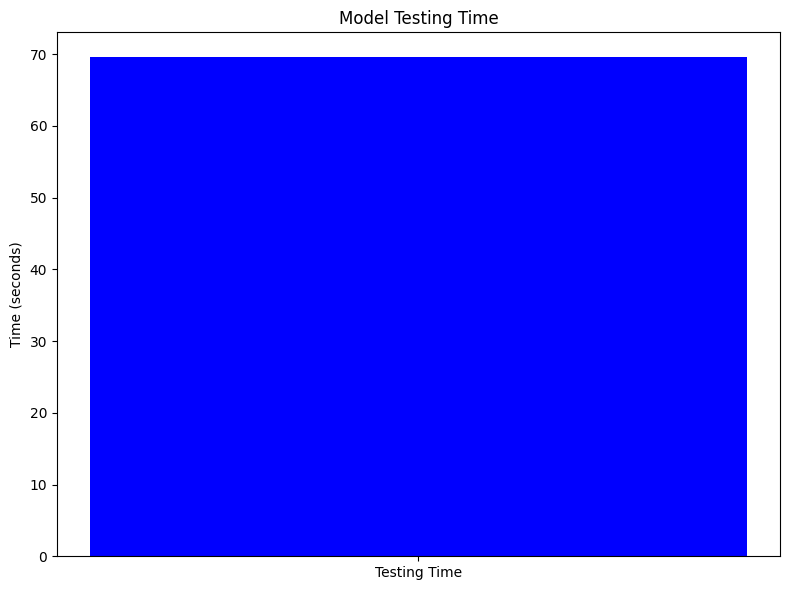

In [ ]:
## Model testing time
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the trained model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
gru_attention_model = tf.keras.models.load_model(checkpoint_path)

# Assuming X_test1 is already defined and loaded

# Measure testing time
start_time = time.time()

# Make predictions
y_pred_probs = gru_attention_model.predict(X_test1)

end_time = time.time()
testing_time = end_time - start_time

# Save the testing time result to a text file (optional)
with open(os.path.join(plot_directory, 'CICDDOS2019_testing_time.txt'), 'w') as f:
    f.write(f"Testing Time: {testing_time:.4f} seconds\n")

# Plot the testing time
plt.figure(figsize=(8, 6))
plt.bar(['Testing Time'], [testing_time], color='blue')
plt.ylabel('Time (seconds)')
plt.title('Model Testing Time')
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'CICDDOS2019_execution_time.jpeg'), format='jpeg')
plt.show()


In [ ]:
# Ensure directory for plots exists
import os
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, GRU, Dense, Dropout, Bidirectional, Flatten, Attention
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, roc_curve, auc, matthews_corrcoef

# Enable eager execution
tf.config.run_functions_eagerly(True)

plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the trained model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
gru_attention_model = tf.keras.models.load_model(checkpoint_path)

# Define the model architecture again (without re-training)
dropout = 0.5
input_shape = (X_test1.shape[1], 1)

input_layer = Input(shape=input_shape)
x = Bidirectional(GRU(128, return_sequences=True, recurrent_activation='sigmoid', reset_after=True))(input_layer)
x = Dropout(dropout)(x)
x = Bidirectional(GRU(256, return_sequences=True, recurrent_activation='sigmoid', reset_after=True))(x)
x = Dropout(dropout)(x)

# Attention mechanism
attention = Attention()([x, x])
x = Flatten()(attention)
output_layer = Dense(units=8, activation='softmax')(x)

# Rebuild the model
attention_model = Model(inputs=input_layer, outputs=attention)

# Make predictions
y_pred_probs = gru_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate performance metrics
y_true = Y_test
test_accuracy = accuracy_score(y_true, y_pred)
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
mcc = matthews_corrcoef(y_true, y_pred)

# Print metrics
print('Accuracy: ' + str(test_accuracy))
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print('F1-score: ' + str(fscore))
print('MCC: ' + str(mcc))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt='.1f', cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix.svg'), format='svg')
plt.show()

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(np.unique(Y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((Y_test == i).astype(int), y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 5))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig(os.path.join(plot_directory, 'ROC_Curves.svg'), format='svg')
plt.show()

# Plot bar graph for Accuracy, Precision, Recall, F1-score, and MCC
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'MCC']
metrics_values = [test_accuracy, precision, recall, fscore, mcc]

plt.figure(figsize=(8, 5))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'cyan', 'purple'])
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.savefig(os.path.join(plot_directory, 'Performance_Metrics_Bar_Graph.svg'), format='svg')
plt.show()

# Compute and plot additional metrics
tp = cm.diagonal()
fp = cm.sum(axis=0) - tp
fn = cm.sum(axis=1) - tp
tn = cm.sum() - (fp + fn + tp)

tpr = tp / (tp + fn)  # True positive rate
fpr = fp / (fp + tn)  # False positive rate
tnr = tn / (tn + fp)  # True negative rate
fdr = fp / (fp + tp)  # False discovery rate
for_rate = fn / (fn + tn)  # False omission rate
fnr = fn / (fn + tp)  # False negative rate

additional_metrics_names = ['TPR', 'FPR', 'TNR', 'FDR', 'FOR', 'FNR']
additional_metrics_values = [np.mean(tpr), np.mean(fpr), np.mean(tnr), np.mean(fdr), np.mean(for_rate), np.mean(fnr)]

plt.figure(figsize=(8, 5))
plt.bar(additional_metrics_names, additional_metrics_values, color=['blue', 'green', 'red', 'cyan', 'purple', 'yellow'])
plt.title('Additional Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.savefig(os.path.join(plot_directory, 'Extended_Performance_Metrics_Bar_Graph.svg'), format='svg')
plt.show()

# Measure testing time
start_time = time.time()
y_pred_probs = gru_attention_model.predict(X_test1)
end_time = time.time()
testing_time = end_time - start_time

# Plot testing time as a line plot
plt.figure(figsize=(8, 5))
plt.plot(['Testing Execution Time'], [testing_time], color='blue', marker='o', linestyle='-')
plt.ylabel('Time (seconds)')
plt.title('Execution Time for Testing')
plt.ylim(0, testing_time + 1)  # Add some space above the maximum value
plt.savefig(os.path.join(plot_directory, 'Testing_Execution_Time.svg'), format='svg')
plt.show()

# Extract and plot attention weights for one sample
attention_weights = attention_model.predict(X_test1)
sample_index = 0  # Adjust this index based on which sample you want to visualize
sample_attention_weights = attention_weights[sample_index]
plt.figure(figsize=(8, 6))
sns.heatmap(sample_attention_weights, cmap='viridis')
plt.title(f'Attention Weights Heatmap for Sample Index {sample_index}')
plt.xlabel('Attention Heads')
plt.ylabel('Time Steps')
plt.savefig(os.path.join(plot_directory, f'Attention_Weights_Heatmap_{sample_index}.svg'), format='svg')
plt.show()


NameError: name 'X_test1' is not defined

In [ ]:
## >>>>>>> 20 For LSTM Attention
### LSTM With Attention
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Flatten, Dense, Dropout, LSTM, Bidirectional, Input, Attention
from keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import seaborn as sns

# Assuming X_train1, X_test1, Y_train, Y_test are already defined
# X_train1 = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test1 = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

dropout = 0.5
input_shape = (X_train1.shape[1], 1)

# Define the model architecture using BI-LSTM with attention
input_layer = Input(shape=input_shape)
x = Bidirectional(LSTM(128, return_sequences=True))(input_layer)
x = Dropout(dropout)(x)
x = Bidirectional(LSTM(256, return_sequences=True))(x)
x = Dropout(dropout)(x)

# Attention mechanism
attention = Attention()([x, x])
x = Flatten()(attention)

output_layer = Dense(units=8, activation='softmax')(x)

# Compile the model
bilstm_attention_model = Model(inputs=input_layer, outputs=output_layer)
optimizer = Adam(learning_rate=0.0001)
bilstm_attention_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
bilstm_attention_model.summary()

# Define ModelCheckpoint callback
bilstm_attention_model_checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/IDS-Research/BI_LSTM_Attention_MD01.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
callbacks = [bilstm_attention_model_checkpoint_callback, early_stopping, reduce_lr]

# Measure training time
start_time = time.time()
print("Training starts here at ", start_time)
bilstm_attention_model_history = bilstm_attention_model.fit(X_train1, Y_train, epochs=30, batch_size=64, validation_data=(X_test1, Y_test), callbacks=callbacks)
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))
### save training history #####
# Save history
np.savez_compressed('/content/drive/MyDrive/IDS-Research/BI_LSTM_Attention_MD01_history.npz',
                    accuracy=bilstm_attention_model_history.history['accuracy'],
                    val_accuracy=bilstm_attention_model_history.history['val_accuracy'],
                    loss=bilstm_attention_model_history.history['loss'],
                    val_loss=bilstm_attention_model_history.history['val_loss'])
###############
# Make predictions
y_pred_probs = bilstm_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate performance metrics for each class
class_report = classification_report(Y_test, y_pred)

# Display the classification report
print("Classification Report:")
print(class_report)

# Summarize history for accuracy
plt.plot(bilstm_attention_model_history.history['accuracy'], color="green", marker='o')
plt.plot(bilstm_attention_model_history.history['val_accuracy'], color="blue", marker='o')
plt.title(' Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(bilstm_attention_model_history.history['loss'], color="green", marker='o')
plt.plot(bilstm_attention_model_history.history['val_loss'], color="blue", marker='o')
plt.title(' Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = bilstm_attention_model.evaluate(X_test1, Y_test)
print('Test Accuracy:', test_accuracy)

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'], yticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


NameError: name 'X_train1' is not defined

9156/9156 [==============================] - 73s 8ms/step
Accuracy of GRU: 0.9989657750031573
Precision of GRU: 0.9990219622301794
Recall of GRU: 0.9989657750031573
F1-score of GRU: 0.9989810476356209


<Figure size 640x480 with 0 Axes>

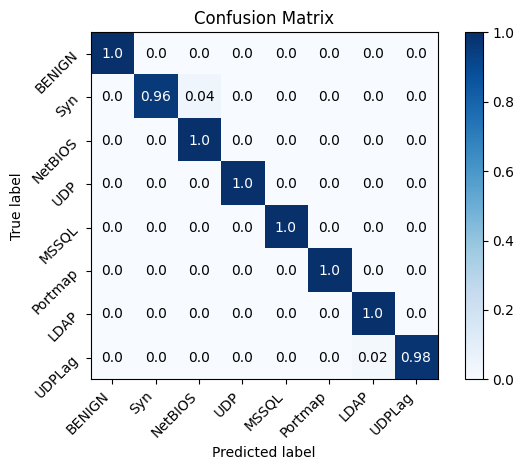

In [ ]:
## >>>>>>> 21 confusion for LSTM
# Confuion matrix  - BI-LSTM attention - Normalized
import tensorflow as tf

!pip install scikit-plot
import scikitplot as skplt
# gru_attention_model = tf.keras.models.load_model('/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MD.h5')
gru_attention_model = tf.keras.models.load_model('/content/drive/MyDrive/IDS-Research/BI_LSTM_Attention_MD01.h5')
y_predict = gru_attention_model.predict(X_test1)
y_predict = np.argmax(y_predict, axis=1)
y_true = Y_test

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Calculate performance metrics
test_accuracy = accuracy_score(y_true, y_predict)
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print metrics
print('Accuracy of GRU: ' + str(test_accuracy))
print('Precision of GRU: ' + str(precision))
print('Recall of GRU: ' + str(recall))
print('F1-score of GRU: ' + str(fscore))

# Confusion matrix
cm = metrics.confusion_matrix(y_true, y_predict)

# # Plot confusion matrix
# plot_confusion_matrix(cm, classes=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'])

#####
classes=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag']
tick_marks = np.arange(len(classes))

# Plot Confusion Matrix
# cm = confusion_matrix(y_true, y_predict)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize confusion matrix
# plt.figure(figsize=(10, 8))
plt.figure()
# skplt.metrics.plot_confusion_matrix(y_test, prediction, figsize=(10, 8), x_tick_rotation=45, normalize=True)
skplt.metrics.plot_confusion_matrix(y_true, y_predict,  x_tick_rotation=45, normalize=True)
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(classes)), labels=classes, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(classes)), labels=classes,rotation=45, ha='right')
plt.tight_layout()
plt.show()

#####

#  plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)




In [ ]:
# ROC Curve - bi-lstm
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import roc_curve, auc, confusion_matrix
import scikitplot as skplt

# Load your trained model
# gru_attention_model = tf.keras.models.load_model('/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MD.h5')
BISLTM_attention_model = tf.keras.models.load_model('/content/drive/MyDrive/IDS-Research/BI_LSTM_Attention_MD01.h5')
y_predict = BISLTM_attention_model.predict(X_test1)
y_predict = np.argmax(y_predict, axis=1)
y_true = Y_test

# # Example data (replace with your actual data)
# X_test1 = ...  # Your test data
# Y_test = ...   # Your true labels

# # Predict probabilities for each class
# y_pred_probs = gru_attention_model.predict(X_test1)

# Convert probabilities to class predictions
# y_predict = np.argmax(y_predict, axis=1)
y_true = Y_test

# Calculate performance metrics
test_accuracy = accuracy_score(y_true, y_predict)
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print metrics
print('Accuracy of ATT_BI_LSTM: ' + str(test_accuracy))
print('Precision of ATT_BI_LSTM: ' + str(precision))
print('Recall of ATT_BI_LSTM: ' + str(recall))
print('F1-score of ATT_BI_LSTM: ' + str(fscore))



# Plot ROC curve for each class
plt.figure()
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = len(classes)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple']
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, color=colors[i],label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], classes[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


9156/9156 [==============================] - 73s 8ms/step
Accuracy of ATT_BI_LSTM: 0.9984059964570114
Precision of ATT_BI_LSTM: 0.9985272022345452
Recall of ATT_BI_LSTM: 0.9984059964570114
F1-score of ATT_BI_LSTM: 0.9984428175866977


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 640x480 with 0 Axes>

9156/9156 [==============================] - 74s 8ms/step
Accuracy of ATT_BI_LSTM: 0.9989657750031573
Precision of ATT_BI_LSTM: 0.9990219622301794
Recall of ATT_BI_LSTM: 0.9989657750031573
F1-score of ATT_BI_LSTM: 0.9989810476356209


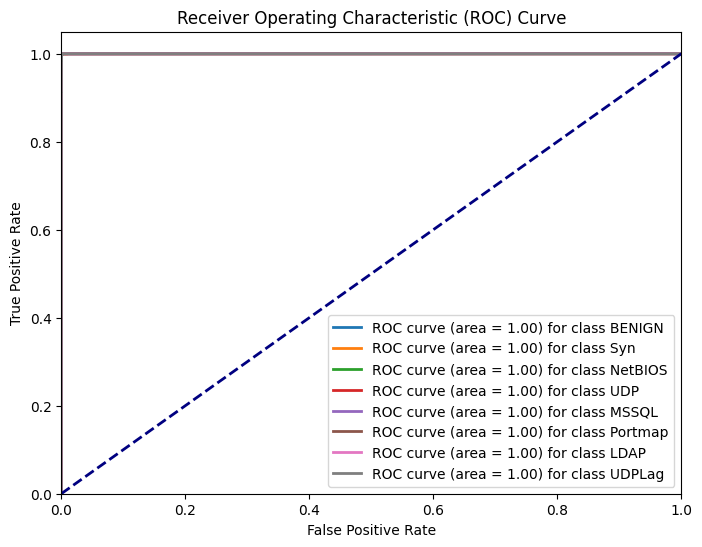

<Figure size 800x600 with 0 Axes>

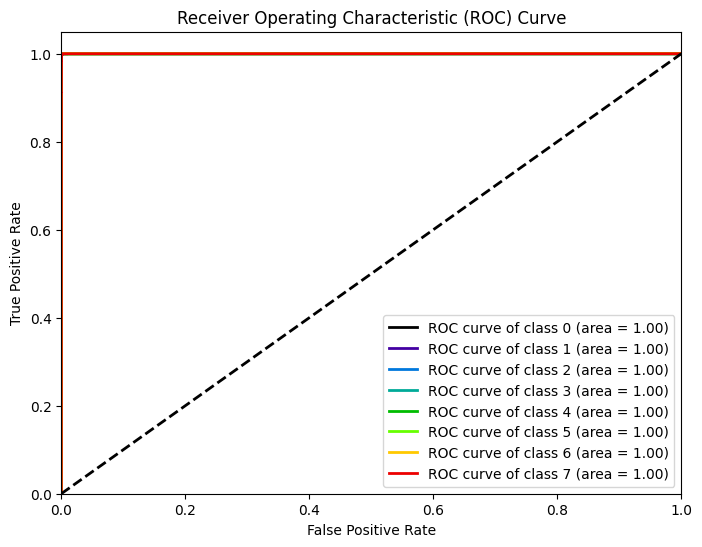

In [ ]:
#### ROC curve modified
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import tensorflow as tf

# Assuming X_train1, X_test1, Y_train, Y_test are already defined
# X_train1 = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test1 = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

# Load your trained model
BISLTM_attention_model = tf.keras.models.load_model('/content/drive/MyDrive/IDS-Research/BI_LSTM_Attention_MD01.h5')

# Assuming Y_test and X_test1 are defined
y_predict_probs = BISLTM_attention_model.predict(X_test1)
y_predict = np.argmax(y_predict_probs, axis=1)
y_true = Y_test

# Calculate performance metrics
test_accuracy = accuracy_score(y_true, y_predict)
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print metrics
print('Accuracy of ATT_BI_LSTM: ' + str(test_accuracy))
print('Precision of ATT_BI_LSTM: ' + str(precision))
print('Recall of ATT_BI_LSTM: ' + str(recall))
print('F1-score of ATT_BI_LSTM: ' + str(fscore))

# # Confusion matrix
# # cm = confusion_matrix(y_true, y_predict)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'], yticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.show()

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
num_classes = 8  # Number of classes
classes = ['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag']

# Compute ROC curve and ROC area for each class
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true == i, y_predict_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc, classes[i]))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot attributes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve using scikit-plot
plt.figure(figsize=(8, 6))
skplt.metrics.plot_roc(y_true, y_predict_probs, figsize=(8, 6), plot_micro=False, plot_macro=False)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


In [ ]:
# skplt.metrics.plot_roc(y_test, predict_prob)  # skplt.metrics.plot_roc(y_test, predict_prob)

9156/9156 [==============================] - 72s 8ms/step


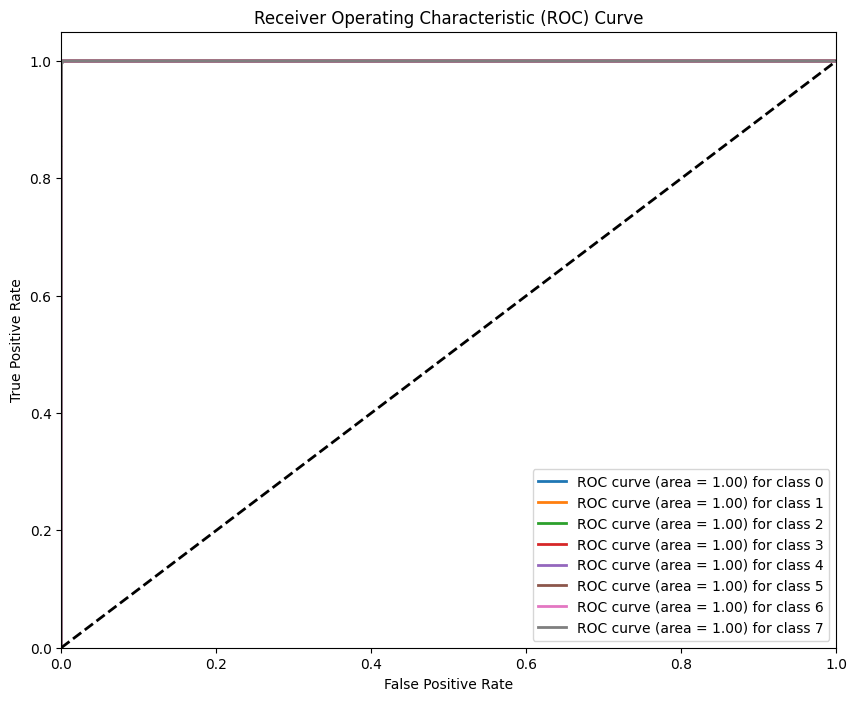

Micro-average ROC AUC: 1.00
Macro-average ROC AUC: 1.00


In [ ]:
#### ROC curve modified -2 micro and macro included
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import tensorflow as tf
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Load your trained model
BISLTM_attention_model = tf.keras.models.load_model('/content/drive/MyDrive/IDS-Research/BI_LSTM_Attention_MD01.h5')

# # Assuming X_test1 and Y_test are defined
# X_test1 = ...  # Define your test data
# Y_test = ...   # Define your true labels

# Predict probabilities for each class
y_pred_probs = BISLTM_attention_model.predict(X_test1)

# Convert true labels to binary format
Y_test_bin = label_binarize(Y_test, classes=np.arange(8))

# Plot ROC curves using scikit-plot
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i in range(8):  # Adjust 8 to the number of classes in your problem
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc, i))

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute micro and macro ROC AUC scores
fpr_micro, tpr_micro, _ = roc_curve(Y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

roc_auc_macro = roc_auc_score(Y_test_bin, y_pred_probs, average='macro')

# Print micro and macro ROC AUC scores
print(f"Micro-average ROC AUC: {roc_auc_micro:.2f}")
print(f"Macro-average ROC AUC: {roc_auc_macro:.2f}")



In [ ]:
##  loss and accuracy plotting
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from keras.models import load_model

# Assuming X_test1, Y_test are already defined
# X_test1 = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

# Load the saved model - /content/drive/MyDrive/IDS-Research/BI_LSTM_Attention_MD.h5
saved_model_path = '/content/drive/MyDrive/IDS-Research/BI_LSTM_Attention_MD01_saved_model01.h5'
bilstm_attention_model = load_model(saved_model_path, custom_objects={'Attention': Attention})

# Make predictions
y_pred_probs = bilstm_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate performance metrics for each class
class_report = classification_report(Y_test, y_pred)

# Display the classification report
print("Classification Report:")
print(class_report)

# Load training history for accuracy and loss
history = np.load('/content/drive/MyDrive/IDS-Research/BI_LSTM_Attention_MD01_history.npz')

train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
train_loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(train_accuracy) + 1)

# Plot accuracy
plt.figure()
plt.plot(epochs, train_accuracy, color="green", marker='o', label='Train')
plt.plot(epochs, val_accuracy, color="red", marker='o', label='Test')
plt.title('Bi-LSTM with Attention Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure()
plt.plot(epochs, train_loss, color="green", marker='o', label='Train')
plt.plot(epochs, val_loss, color="red", marker='o', label='Test')
plt.title('Bi-LSTM with Attention Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# # Plot and display confusion matrix
# cm = confusion_matrix(Y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'], yticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.show()

# Plot and display ROC curve (example)
# Adjust according to your needs
# Example of plotting ROC curve for a multi-class problem
# (You may need to implement or find a suitable function for plotting multi-class ROC curves)


NameError: name 'Attention' is not defined

In [ ]:
## plot confusion matrix separately - normalized BI_GRU_LSTM
# Confuion matrix
import tensorflow as tf
gru_attention_model = tf.keras.models.load_model('/content/drive/MyDrive/IDS-Research/BI_LSTM_Attention_MD.h5')
y_predict = gru_attention_model.predict(X_test1)
y_predict = np.argmax(y_predict, axis=1)
y_true = Y_test

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Calculate performance metrics
test_accuracy = accuracy_score(y_true, y_predict)
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print metrics
print('Accuracy of GRU: ' + str(test_accuracy))
print('Precision of GRU: ' + str(precision))
print('Recall of GRU: ' + str(recall))
print('F1-score of GRU: ' + str(fscore))

# Confusion matrix
cm = metrics.confusion_matrix(y_true, y_predict)
# Round the values in the confusion matrix to one decimal place
cm = np.round(cm, decimals=1)
# Plot confusion matrix
plot_confusion_matrix(cm, classes=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'])

In [ ]:
## GRU Multi-head Attention mechanism
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Bidirectional, GRU, Flatten, MultiHeadAttention
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Assuming input_shape is defined
input_shape = (X_train1.shape[1], X_train1.shape[2])

# Define the model with attention mechanism
input_layer = Input(shape=input_shape)
x = Bidirectional(GRU(128, return_sequences=True))(input_layer)
x = Dropout(0.3)(x)  # Dropout layer
x = Bidirectional(GRU(256, return_sequences=True))(x)
x = Dropout(0.3)(x)  # Dropout layer

# Multi-head Attention mechanism
attention = MultiHeadAttention(num_heads=4, key_dim=256)(x, x)
x = Flatten()(attention)

output_layer = Dense(units=8, activation='softmax')(x)

# Compile the model
bigru_attention_model = Model(inputs=input_layer, outputs=output_layer)
optimizer = Adam(learning_rate=0.0001)
bigru_attention_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define ModelCheckpoint callback
bigru_attention_model_checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MD.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
callbacks = [bigru_attention_model_checkpoint_callback, early_stopping, reduce_lr]

# Measure training time
start_time = time.time()
print("Training starts here at ", start_time)
bigru_attention_model_history = bigru_attention_model.fit(X_train1, Y_train, epochs=20, batch_size=128, validation_data=(X_test1, Y_test), callbacks=callbacks)
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions
y_pred_probs = bigru_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate performance metrics for each class
class_report = classification_report(Y_test, y_pred)

# Display the classification report
print("Classification Report:")
print(class_report)

# Summarize history for accuracy
plt.plot(bigru_attention_model_history.history['accuracy'], color="green", marker='o')
plt.plot(bigru_attention_model_history.history['val_accuracy'], color="red", marker='o')
plt.title('Bi-GRU with Attention Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(bigru_attention_model_history.history['loss'], color="green", marker='o')
plt.plot(bigru_attention_model_history.history['val_loss'], color="red", marker='o')
plt.title('Bi-GRU with Attention Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Confuion matrix
import tensorflow as tf
gru_attention_model = tf.keras.models.load_model('/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MD.h5')
y_predict = gru_attention_model.predict(X_test1)
y_predict = np.argmax(y_predict, axis=1)
y_true = Y_test

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Calculate performance metrics
test_accuracy = accuracy_score(y_true, y_predict)
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print metrics
print('Accuracy of GRU: ' + str(test_accuracy))
print('Precision of GRU: ' + str(precision))
print('Recall of GRU: ' + str(recall))
print('F1-score of GRU: ' + str(fscore))

# Confusion matrix
cm = metrics.confusion_matrix(y_true, y_predict)

# Plot confusion matrix
plot_confusion_matrix(cm, classes=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'])


Training starts here at  1717759848.520006
Epoch 1/20
21480/21480 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9940
Epoch 1: val_accuracy improved from -inf to 0.99972, saving model to /content/drive/MyDrive/IDS-Research/BiGRU_Attention_MD.h5
21480/21480 [==============================] - 965s 44ms/step - loss: 0.0200 - accuracy: 0.9940 - val_loss: 0.0019 - val_accuracy: 0.9997 - lr: 1.0000e-04
Epoch 2/20
21479/21480 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9997
Epoch 2: val_accuracy improved from 0.99972 to 0.99992, saving model to /content/drive/MyDrive/IDS-Research/BiGRU_Attention_MD.h5
21480/21480 [==============================] - 952s 44ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 3.9066e-04 - val_accuracy: 0.9999 - lr: 1.0000e-04
Epoch 3/20
  781/21480 [>.............................] - ETA: 14:42 - loss: 0.0016 - accuracy: 0.9998

KeyboardInterrupt: 

9156/9156 [==============================] - 68s 7ms/step
Accuracy of GRU: 0.9993480627907692
Precision of GRU: 0.9993957162654338
Recall of GRU: 0.9993480627907692
F1-score of GRU: 0.9993610488784134
Confusion matrix, without normalization


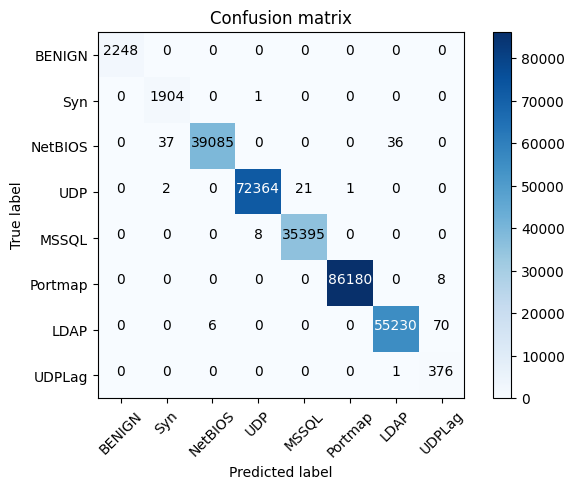

In [ ]:
# Confuion matrix
import tensorflow as tf
gru_attention_model = tf.keras.models.load_model('/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MD.h5')
y_predict = gru_attention_model.predict(X_test1)
y_predict = np.argmax(y_predict, axis=1)
y_true = Y_test

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Calculate performance metrics
test_accuracy = accuracy_score(y_true, y_predict)
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print metrics
print('Accuracy of GRU: ' + str(test_accuracy))
print('Precision of GRU: ' + str(precision))
print('Recall of GRU: ' + str(recall))
print('F1-score of GRU: ' + str(fscore))

# Confusion matrix
cm = metrics.confusion_matrix(y_true, y_predict)

# Plot confusion matrix
plot_confusion_matrix(cm, classes=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'])


In [ ]:

# Plotting ROC Curves ..
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load the trained model
gru_attention_model = tf.keras.models.load_model('/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MD.h5')

# Generate predictions
y_predict = gru_attention_model.predict(X_test1)
y_predict_proba = y_predict  # Prediction probabilities for ROC curve
y_predict = np.argmax(y_predict, axis=1)
y_true = Y_test

# Binarize the output
n_classes = len(np.unique(y_true))
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Calculate ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_predict_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_predict_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12, 8))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle=':', linewidth=4,
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]))

colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue', 'purple', 'brown']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 85, 1), found shape=(None, 86, 1)


In [ ]:
# per class detection rate and other metrics details
# Calculate performance metrics
test_accuracy = accuracy_score(y_true, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_predict, average=None)

# Print metrics
print('Overall Accuracy: {:.4f}'.format(test_accuracy))
print('Per Class Precision, Recall, F1-Score, and Support:')
for i in range(len(precision)):
    print(f'Class {i}: Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}, F1-Score: {fscore[i]:.4f}, Support: {support[i]}')

# Display classification report
print('\nClassification Report:')
target_names = ['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag']
print(classification_report(y_true, y_predict, target_names=target_names))

NameError: name 'accuracy_score' is not defined

little explanation above the above metrics

**precision** :- Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question, "Of all the instances the model predicted as positive, how many were actually positive?"
**Recall** (Sensitivity or True Positive Rate):-
is the ratio of correctly predicted positive observations to the all observations in the actual class. It answers the question, "Of all the instances that were actually positive, how many did the model correctly identify?

**F1-Score ** :- F1-Score is the harmonic mean of precision and recall. It provides a single metric that balances both the concerns of precision and recall.

**Support** :- Support is the number of actual occurrences of the class in the dataset. It indicates how many samples of each class are present in the dataset.

**Macro and Weighted Averages**:

**Macro Average**: The arithmetic mean of precision, recall, and F1-score calculated for each class. It treats all classes equally, regardless of their support.

**Weighted Average**: Accounts for the support of each class when calculating the average. It adjusts for class imbalance by giving more weight to classes with more samples.

**Micro Average**: This method aggregates the contributions of all classes to compute the average metric. It calculates the metric globally by counting the total true positives, false negatives, and false positives.

**Macro Average**: This method calculates the metric independently for each class and then takes the average, giving equal weight to each class.

In [ ]:
# Imports
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, roc_curve, auc, matthews_corrcoef, label_binarize
import itertools
from keras.models import Model
from itertools import cycle

# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
gru_attention_model = tf.keras.models.load_model(checkpoint_path)

# Load your test data (assuming X_test1 and Y_test are already loaded)
# Make predictions
y_pred_probs = gru_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate performance metrics for each class
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot accuracy and loss
history_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_MDcic2023_history_0725.npz'
history = np.load(history_path)
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

# Summarize history for accuracy
plt.figure(figsize=(8, 5))
plt.plot(accuracy, color="green", marker='o')
plt.plot(val_accuracy, color="blue", marker='o')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(ticks=np.arange(0, 31, 5))  # Set ticks from 0 to 30 with an interval of 5
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(os.path.join(plot_directory, 'Model_Accuracy_cic2019.svg'), format='svg')
plt.savefig(os.path.join(plot_directory, 'Model_Accuracy_cic2019.jpeg'), format='jpeg')
plt.show()

# Summarize history for loss
plt.figure(figsize=(8, 5))
plt.plot(loss, color="green", marker='o')
plt.plot(val_loss, color="blue", marker='o')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(ticks=np.arange(0, 31, 5))  # Set ticks from 0 to 30 with an interval of 5
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(os.path.join(plot_directory, 'Model_Loss_cic2019.svg'), format='svg')
plt.savefig(os.path.join(plot_directory, 'Model_Loss_cic2019.jpeg'), format='jpeg')
plt.show()

# Calculate performance metrics
test_accuracy = accuracy_score(Y_test, y_pred)
precision, recall, fscore, _ = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(Y_test, y_pred)

# Print metrics
print('Accuracy : ' + str(test_accuracy))
print('Precision : ' + str(precision))
print('Recall : ' + str(recall))
print('F1-score : ' + str(fscore))
print('MCC : ' + str(mcc))

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print("This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        fmt = '.2f'
    else:
        print('Confusion matrix, without normalization')
        fmt = 'd'

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot and save confusion matrix
plt.figure(figsize=(8, 5))
plot_confusion_matrix(cm, classes=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'], normalize=True, title='Normalized Confusion Matrix')
plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_cic2019.svg'), format='svg')
plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_cic2019.jpeg'), format='jpeg')
plt.show()

# Compute ROC curve and ROC area for each class
n_classes = len(np.unique(Y_test))
y_test_binarized = label_binarize(Y_test, classes=np.arange(n_classes))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves for each class, micro-average, and macro-average
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'purple', 'brown', 'pink', 'gray'])
linestyles = cycle(['-', '--', '-.', ':', '-', '--', '-.', ':'])
for i, (color, linestyle) in enumerate(zip(colors, linestyles)):
    plt.plot(fpr[i], tpr[i], color=color, linestyle=linestyle, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig(os.path.join(plot_directory, 'ROC_Curves_cic2019.svg'), format='svg')
plt.savefig(os.path.join(plot_directory, 'ROC_Curves_cic2019.jpeg'), format='jpeg')
plt.show()

# Plot bar graph for Accuracy, Precision, Recall, F1-score, and MCC
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'MCC']
metrics_values = [test_accuracy, precision, recall, fscore, mcc]

plt.figure(figsize=(8, 5))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'cyan', 'purple'])
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.savefig(os.path.join(plot_directory, 'Performance_Metrics_Bar_Graph_cic2019.svg'), format='svg')
plt.savefig(os.path.join(plot_directory, 'Performance_Metrics_Bar_Graph_cic2019.jpeg'), format='jpeg')
plt.show()

# Compute and plot additional metrics
tp = cm.diagonal()
fp = cm.sum(axis=0) - tp
fn = cm.sum(axis=1) - tp
tn = cm.sum() - (fp + fn + tp)

tpr = tp / (tp + fn)  # True positive rate
fpr = fp / (fp + tn)  # False positive rate
tnr = tn / (tn + fp)  # True negative rate
fdr = fp / (fp + tp)  # False discovery rate
for_rate = fn / (fn + tn)  # False omission rate
fnr = fn / (fn + tp)  # False negative rate

additional_metrics_names = ['TPR', 'FPR', 'TNR', 'FDR', 'FOR', 'FNR']
additional_metrics_values = [np.mean(tpr), np.mean(fpr), np.mean(tnr), np.mean(fdr), np.mean(for_rate), np.mean(fnr)]

plt.figure(figsize=(8, 5))
plt.bar(additional_metrics_names, additional_metrics_values, color=['blue', 'green', 'red', 'cyan', 'purple', 'yellow'])
plt.title('Additional Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.savefig(os.path.join(plot_directory, 'Extended_Performance_Metrics_Bar_Graph_cic2019.svg'), format='svg')
plt.savefig(os.path.join(plot_directory, 'Extended_Performance_Metrics_Bar_Graph_cic2019.jpeg'), format='jpeg')
plt.show()

# Measure testing time
start_time = time.time()
y_pred_probs = gru_attention_model.predict(X_test1)
end_time = time.time()
testing_time = end_time - start_time

# Plot testing time
plt.figure(figsize=(8, 5))
plt.plot(['Testing Execution Time'], [testing_time], color='blue', marker='o', linestyle='-')
plt.ylabel('Time (seconds)')
plt.title('Execution Time for Testing')
plt.ylim(0, testing_time + 1)  # Add some space above the maximum value
plt.savefig(os.path.join(plot_directory, 'Testing_Execution_Time_cic2019.svg'), format='svg')
plt.savefig(os.path.join(plot_directory, 'Testing_Execution_Time_cic2019.jpeg'), format='jpeg')
plt.show()


In [ ]:
import tensorflow as tf

# !pip install tensorflow==2.15.0


print(tf.__version__)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())



2.15.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7658158143623994923
xla_global_id: -1
]


In [ ]:
## LSTM 2019
## >>>>>>> 18 print to check size - sanity check
# print(X_train1.dtype)
# print(X_test1.dtype)
# print(Y_train.dtype)
# print(Y_test.dtype)
import os
import time
import numpy as np
from keras.models import load_model
from keras.layers import Input, LSTM, Dense, Dropout, Bidirectional, Attention, Flatten
from keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CIC2013_plots_27'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Data preparation for LSTM
# Reshape data for LSTM (assuming each row is a timestamp)
X_train1 = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test1 = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM Model
# Define LSTM model architecture
dropout = 0.5
learning_rate = 1e-5

input_shape = (X_train1.shape[1], X_train1.shape[2])
input_layer = Input(shape=input_shape)
x = Bidirectional(LSTM(64, return_sequences=True))(input_layer)
x = Dropout(dropout)(x)
x = Bidirectional(LSTM(128, return_sequences=True))(x)
x = Dropout(dropout)(x)
x = Bidirectional(LSTM(256, return_sequences=True))(x)
x = Dropout(dropout)(x)

# Attention mechanism
attention_layer = Attention()
attention_output = attention_layer([x, x])
x = Flatten()(attention_output)
output_layer = Dense(units=len(np.unique(Y_train)), activation='softmax')(x)

lstm_attention_model = Model(inputs=input_layer, outputs=output_layer)
optimizer = Adam(learning_rate=learning_rate)
lstm_attention_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_attention_model.summary()

# Define callbacks
checkpoint_path = '/content/drive/MyDrive/IDS-Research/LSTM_08_08.h5'
lstm_attention_model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
callbacks = [lstm_attention_model_checkpoint_callback, early_stopping, reduce_lr]

# Train the model
start_time = time.time()
lstm_attention_model_history = lstm_attention_model.fit(X_train1, Y_train, epochs=30, batch_size=128, validation_data=(X_test1, Y_test), callbacks=callbacks)
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions
y_pred_probs = lstm_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate overall metrics
overall_accuracy = accuracy_score(Y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
cm = confusion_matrix(Y_test, y_pred)
overall_fpr = np.sum(cm[:, :-1]) / np.sum(cm)

# Print overall metrics
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1-score: {f1_score:.4f}")
print(f"Overall FPR: {overall_fpr:.4f}")

# Calculate class-wise metrics
class_names = ['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag']
n_classes = len(class_names)
class_wise_metrics = precision_recall_fscore_support(Y_test, y_pred, average=None, labels=np.arange(n_classes))
class_wise_accuracy = np.diag(cm) / np.sum(cm, axis=1)
class_wise_fpr = {i: (cm[:, i].sum() - cm[i, i]) / np.sum(cm) for i in range(n_classes)}

# Print class-wise metrics
print("Class-wise Performance Metrics:")
print(f"{'Class':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-score':<10} {'FPR':<10}")
for i in range(n_classes):
    print(f"{class_names[i]:<10} {class_wise_accuracy[i]:<10.4f} {class_wise_metrics[0][i]:<10.4f} {class_wise_metrics[1][i]:<10.4f} {class_wise_metrics[2][i]:<10.4f} {class_wise_fpr[i]:<10.4f}")

# Plot class-wise metrics
metrics_data = {
    'Class': class_names,
    'Accuracy': class_wise_accuracy,
    'Precision': class_wise_metrics[0],
    'Recall': class_wise_metrics[1],
    'F1-score': class_wise_metrics[2],
    'FPR': [class_wise_fpr[i] for i in range(n_classes)]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df.plot(kind='bar', x='Class', figsize=(8, 5), dpi=300)
plt.title('Class-wise Performance Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Class_Wise_Performance_Metrics_LSTM.svg'), format='svg', dpi=300)
plt.savefig(os.path.join(plot_directory, 'Class_Wise_Performance_Metrics_LSTM.jpeg'), format='jpeg', dpi=300)
plt.show()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 85, 1)]              0         []                            
                                                                                                  
 bidirectional (Bidirection  (None, 85, 128)              33792     ['input_1[0][0]']             
 al)                                                                                              
                                                                                                  
 dropout (Dropout)           (None, 85, 128)              0         ['bidirectional[0][0]']       
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 85, 256)              263168    ['dropout[0][0]']         

Loaded model from checkpoint.
Epoch 1/20
21489/21490 [============================>.] - ETA: 0s - loss: 0.0367 - accuracy: 0.9875
Epoch 1: val_accuracy improved from -inf to 0.96541, saving model to /content/drive/MyDrive/IDS-Research/LSTM_08_08.h5
21490/21490 [==============================] - 598s 28ms/step - loss: 0.0367 - accuracy: 0.9875 - val_loss: 0.1151 - val_accuracy: 0.9654 - lr: 1.0000e-05
Epoch 2/20
21488/21490 [============================>.] - ETA: 0s - loss: 0.0352 - accuracy: 0.9880
Epoch 2: val_accuracy improved from 0.96541 to 0.96941, saving model to /content/drive/MyDrive/IDS-Research/LSTM_08_08.h5
21490/21490 [==============================] - 577s 27ms/step - loss: 0.0352 - accuracy: 0.9880 - val_loss: 0.1024 - val_accuracy: 0.9694 - lr: 1.0000e-05
Epoch 3/20
21490/21490 [==============================] - ETA: 0s - loss: 0.0338 - accuracy: 0.9885
Epoch 3: val_accuracy improved from 0.96941 to 0.97067, saving model to /content/drive/MyDrive/IDS-Research/LSTM_08_08.

AttributeError: Rectangle.set() got an unexpected keyword argument 'dpi'

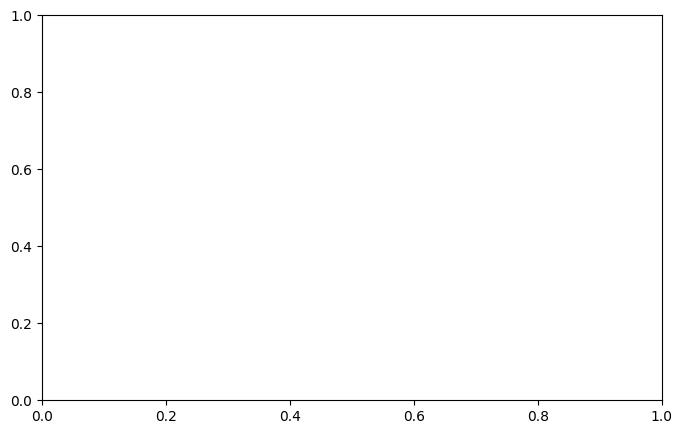

In [ ]:
### Resume the above code from where it left off --cicddos 2019
import os
import time
import numpy as np
from keras.models import load_model
from keras.layers import Input, LSTM, Dense, Dropout, Bidirectional, Attention, Flatten
from keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CIC2013_plots_27'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Data preparation for LSTM (assuming each row is a timestamp)
X_train1 = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test1 = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

# Define checkpoint path
checkpoint_path = '/content/drive/MyDrive/IDS-Research/LSTM_08_08.h5'

# Load the model from the last checkpoint, if available
if os.path.exists(checkpoint_path):
    lstm_attention_model = load_model(checkpoint_path)
    print("Loaded model from checkpoint.")
else:
    # If no checkpoint exists, define the model architecture
    dropout = 0.5
    learning_rate = 1e-5

    input_shape = (X_train1.shape[1], X_train1.shape[2])
    input_layer = Input(shape=input_shape)
    x = Bidirectional(LSTM(64, return_sequences=True))(input_layer)
    x = Dropout(dropout)(x)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(dropout)(x)
    x = Bidirectional(LSTM(256, return_sequences=True))(x)
    x = Dropout(dropout)(x)

    # Attention mechanism
    attention_layer = Attention()
    attention_output = attention_layer([x, x])
    x = Flatten()(attention_output)
    output_layer = Dense(units=len(np.unique(Y_train)), activation='softmax')(x)

    lstm_attention_model = Model(inputs=input_layer, outputs=output_layer)
    optimizer = Adam(learning_rate=learning_rate)
    lstm_attention_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    lstm_attention_model.summary()

# Define callbacks
lstm_attention_model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
callbacks = [lstm_attention_model_checkpoint_callback, early_stopping, reduce_lr]

# Continue training the model
start_time = time.time()
lstm_attention_model_history = lstm_attention_model.fit(X_train1, Y_train, epochs=20, batch_size=128, validation_data=(X_test1, Y_test), callbacks=callbacks)
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions
y_pred_probs = lstm_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate overall metrics
overall_accuracy = accuracy_score(Y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
cm = confusion_matrix(Y_test, y_pred)
overall_fpr = np.sum(cm[:, :-1]) / np.sum(cm)

# Print overall metrics
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1-score: {f1_score:.4f}")
print(f"Overall FPR: {overall_fpr:.4f}")

# Calculate class-wise metrics
class_names = ['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag']
n_classes = len(class_names)
class_wise_metrics = precision_recall_fscore_support(Y_test, y_pred, average=None, labels=np.arange(n_classes))
class_wise_accuracy = np.diag(cm) / np.sum(cm, axis=1)
class_wise_fpr = {i: (cm[:, i].sum() - cm[i, i]) / np.sum(cm) for i in range(n_classes)}

# Print class-wise metrics
print("Class-wise Performance Metrics:")
print(f"{'Class':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-score':<10} {'FPR':<10}")
for i in range(n_classes):
    print(f"{class_names[i]:<10} {class_wise_accuracy[i]:<10.4f} {class_wise_metrics[0][i]:<10.4f} {class_wise_metrics[1][i]:<10.4f} {class_wise_metrics[2][i]:<10.4f} {class_wise_fpr[i]:<10.4f}")

# Plot class-wise metrics
metrics_data = {
    'Class': class_names,
    'Accuracy': class_wise_accuracy,
    'Precision': class_wise_metrics[0],
    'Recall': class_wise_metrics[1],
    'F1-score': class_wise_metrics[2],
    'FPR': [class_wise_fpr[i] for i in range(n_classes)]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df.plot(kind='bar', x='Class', figsize=(8, 5), dpi=300)
plt.title('Class-wise Performance Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Class_Wise_Performance_Metrics_LSTM.svg'), format='svg', dpi=300)
plt.savefig(os.path.join(plot_directory, 'Class_Wise_Performance_Metrics_LSTM.jpeg'), format='jpeg', dpi=300)
plt.show()


In [ ]:
### SEPT LSTM - overall Macro - weight - september
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, accuracy_score



# Load the saved model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/LSTM_08_08.h5'
lstm_attention_model = load_model(checkpoint_path)
print("Model loaded successfully.")

# Make predictions
y_pred_probs = lstm_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate overall metrics using macro averaging
overall_accuracy = accuracy_score(Y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='macro')  # Macro averaging
cm = confusion_matrix(Y_test, y_pred)
overall_fpr = np.sum(cm[:, :-1]) / np.sum(cm)
print(" Overall Metrics :-LSTM 2019  Macro averaging ")
# Print overall metrics
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision (Macro): {precision:.4f}")
print(f"Overall Recall (Macro): {recall:.4f}")
print(f"Overall F1-score (Macro): {f1_score:.4f}")
print(f"Overall FPR: {overall_fpr:.4f}")

# Class names
class_names = ['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag']
n_classes = len(class_names)

# Calculate class-wise metrics
class_wise_metrics = precision_recall_fscore_support(Y_test, y_pred, average=None, labels=np.arange(n_classes))
class_wise_accuracy = np.diag(cm) / np.sum(cm, axis=1)
class_wise_fpr = {i: (cm[:, i].sum() - cm[i, i]) / np.sum(cm) for i in range(n_classes)}

# Print class-wise metrics
print("\nClass-wise Performance Metrics:")
print(f"{'Class':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-score':<10} {'FPR':<10}")
for i in range(n_classes):
    print(f"{class_names[i]:<10} {class_wise_accuracy[i]:<10.4f} {class_wise_metrics[0][i]:<10.4f} {class_wise_metrics[1][i]:<10.4f} {class_wise_metrics[2][i]:<10.4f} {class_wise_fpr[i]:<10.4f}")


Model loaded successfully.
9156/9156 [==============================] - 89s 9ms/step
 Overall Metrics :-LSTM 2019  Macro averaging 
Overall Accuracy: 0.9826
Overall Precision (Macro): 0.9041
Overall Recall (Macro): 0.9717
Overall F1-score (Macro): 0.9244
Overall FPR: 0.9970

Class-wise Performance Metrics:
Class      Accuracy   Precision  Recall     F1-score   FPR       
BENIGN     0.9995     0.9672     0.9995     0.9831     0.0003    
Syn        0.9980     0.9418     0.9980     0.9691     0.0004    
NetBIOS    0.9929     0.9978     0.9929     0.9953     0.0003    
UDP        0.9955     0.9506     0.9955     0.9725     0.0128    
MSSQL      0.8927     0.9913     0.8927     0.9394     0.0009    
Portmap    0.9989     0.9999     0.9989     0.9994     0.0000    
LDAP       0.9901     0.9959     0.9901     0.9930     0.0008    
UDPLag     0.9058     0.3883     0.9058     0.5436     0.0019    


In [ ]:
### SEPT- CICDDOS SAT-BI-LSTM  OVERALL , PER CLAS - CICDDOS-2019    Macro  SAT-BI-LSTM
import os
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, accuracy_score

# Load the pre-trained model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
bigru_attention_model = load_model(checkpoint_path)

# Make predictions
y_pred_probs = bigru_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate overall metrics
overall_accuracy = accuracy_score(Y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='macro')
cm = confusion_matrix(Y_test, y_pred)
overall_fpr = np.sum(cm[:, :-1]) / np.sum(cm)
print(" Overall Metrics :- Macro averaging ")
# Print overall metrics
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1-score: {f1_score:.4f}")
print(f"Overall FPR: {overall_fpr:.4f}")

# Calculate class-wise metrics
class_names = ['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag']
n_classes = len(class_names)
class_wise_metrics = precision_recall_fscore_support(Y_test, y_pred, average=None, labels=np.arange(n_classes))
class_wise_accuracy = np.diag(cm) / np.sum(cm, axis=1)
class_wise_fpr = {i: (cm[:, i].sum() - cm[i, i]) / np.sum(cm) for i in range(n_classes)}

# Print class-wise metrics
print("Class-wise Performance Metrics:")
print(f"{'Class':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-score':<10} {'FPR':<10}")
for i in range(n_classes):
    print(f"{class_names[i]:<10} {class_wise_accuracy[i]:<10.4f} {class_wise_metrics[0][i]:<10.4f} {class_wise_metrics[1][i]:<10.4f} {class_wise_metrics[2][i]:<10.4f} {class_wise_fpr[i]:<10.4f}")



9156/9156 [==============================] - 63s 7ms/step
 Overall Metrics :- Macro averaging 
Overall Accuracy: 0.9994
Overall Precision: 0.9872
Overall Recall: 0.9899
Overall F1-score: 0.9886
Overall FPR: 0.9987
Class-wise Performance Metrics:
Class      Accuracy   Precision  Recall     F1-score   FPR       
BENIGN     1.0000     0.9995     1.0000     0.9998     0.0000    
Syn        0.9985     0.9766     0.9985     0.9874     0.0002    
NetBIOS    0.9983     0.9995     0.9983     0.9989     0.0001    
UDP        0.9996     0.9999     0.9996     0.9997     0.0000    
MSSQL      0.9997     0.9992     0.9997     0.9995     0.0001    
Portmap    0.9999     1.0000     0.9999     0.9999     0.0000    
LDAP       0.9993     0.9991     0.9993     0.9992     0.0002    
UDPLag     0.9241     0.9241     0.9241     0.9241     0.0001    


In [ ]:
import tensorflow as tf
import keras
# !pip install tensorflow==2.15

print(f"Keras version: {keras.__version__}")


print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
for device in tf.config.list_physical_devices('GPU'):
    print(device)

Keras version: 2.15.0
TensorFlow version: 2.15.0
Num GPUs Available:  1
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [ ]:
# X_train1 = np.load(os.path.join(save_dir, 'X_train1.npy'))
# X_test1 = np.load(os.path.join(save_dir, 'X_test1.npy'))
# Y_train = np.load(os.path.join(save_dir, 'Y_train.npy'))
# Y_test = np.load(os.path.join(save_dir, 'Y_test.npy'))
print(X_train1.shape)
print(X_test1.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train1_flat = X_train1.reshape(X_train1.shape[0], -1)
X_test1_flat = X_test1.reshape(X_test1.shape[0], -1)

print(X_train1_flat.shape)
print(X_test1_flat.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train = X_train1_flat
X_test = X_test1_flat
Y_train = Y_train
Y_test = Y_test
print(" final ")
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(2750648, 85, 1)
(292973, 85, 1)
(2750648,)
(292973,)
(2750648, 85)
(292973, 85)
(2750648,)
(292973,)
 final 
(2750648, 85)
(292973, 85)
(2750648,)
(292973,)


In [ ]:
### DNN CICDDO2019
import time
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Input, Dropout
from keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import pandas as pd

# Define directory for saving models and history
save_dir = '/content/drive/MyDrive/IDS-Research/CICIoT2023_plots_0815'
os.makedirs(save_dir, exist_ok=True)
model_checkpoint_filepath = '/content/drive/MyDrive/IDS-Research/DNN_CICIoT2023_0815_1.h5'

# Use specified variables for consistency
X_train = X_train1_flat
X_test = X_test1_flat
Y_train = Y_train
Y_test = Y_test

# Check if a pre-existing model checkpoint exists
if os.path.exists(model_checkpoint_filepath):
    print("Loading existing model checkpoint...")
    dnn_model = load_model(model_checkpoint_filepath)
else:
    # Model architecture - DNN
    input_shape = X_train.shape[1]  # Number of features
    dropout = 0.4

    input_layer = Input(shape=(input_shape,))
    x = Dense(256, activation='relu')(input_layer)
    x = Dropout(dropout)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(dropout)(x)
    output_layer = Dense(len(np.unique(Y_train)), activation='softmax')(x)

    # Compile the model
    dnn_model = Model(inputs=input_layer, outputs=output_layer)
    optimizer = Adam(learning_rate=0.0001)
    dnn_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Display model summary
    dnn_model.summary()

# Define callbacks with resume capability
dnn_model_checkpoint_callback = ModelCheckpoint(
    filepath=model_checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
callbacks = [dnn_model_checkpoint_callback, early_stopping, reduce_lr]

# Train the model
start_time = time.time()
dnn_model_history = dnn_model.fit(X_train, Y_train, epochs=12, batch_size=256,
                                  validation_data=(X_test, Y_test), callbacks=callbacks)
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions
y_pred_probs = dnn_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute class-wise performance metrics
precision, recall, f1, _ = precision_recall_fscore_support(Y_test, y_pred, average=None, labels=np.unique(Y_test))

# Calculate FPR and Accuracy for each class
class_names = encoder.classes_
class_metrics = []

for i, label in enumerate(class_names):
    class_precision = precision[i]
    class_recall = recall[i]
    class_f1 = f1[i]
    # Calculate FPR for each class
    tn, fp, fn, tp = confusion_matrix((Y_test == i).astype(int), (y_pred == i).astype(int)).ravel()
    class_fpr = fp / (fp + tn)
    # Calculate accuracy for each class
    class_accuracy = (tp + tn) / (tp + tn + fp + fn)
    class_metrics.append([
        label,
        f"{class_accuracy:.4f}",
        f"{class_precision:.4f}",
        f"{class_recall:.4f}",
        f"{class_f1:.4f}",
        f"{class_fpr:.4f}"
    ])

# Create a DataFrame and display results in tabular format
metrics_df = pd.DataFrame(class_metrics, columns=['Class', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'FPR'])
print(metrics_df.to_string(index=False))

# Record test time
start_time = time.time()
test_loss, test_accuracy = dnn_model.evaluate(X_test, Y_test)
end_time = time.time()
test_time = end_time - start_time
print('Test Accuracy:', test_accuracy)
print('Test Time: {:.2f} seconds'.format(test_time))




Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 85)]              0         
                                                                 
 dense_37 (Dense)            (None, 256)               22016     
                                                                 
 dropout_27 (Dropout)        (None, 256)               0         
                                                                 
 dense_38 (Dense)            (None, 128)               32896     
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 55944 (218.53 KB)
Trainable params: 55944 (21

NameError: name 'encoder' is not defined

In [ ]:
## SEPT SEPT DNN CIC 2019    ==== Macro  weightinhg - DNN
import numpy as np
import pandas as pd
import time
from keras.models import load_model
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score

# Use specified variables for consistency
X_test = X_test1_flat
Y_test = Y_test

# Load the pre-trained model
model_checkpoint_filepath = '/content/drive/MyDrive/IDS-Research/DNN_CICIoT2023_0815_1.h5'
dnn_model = load_model(model_checkpoint_filepath)

# Measure test time
start_time = time.time()
y_pred_probs = dnn_model.predict(X_test)
end_time = time.time()
test_time = end_time - start_time

# Convert predictions to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Define class names
class_names = ['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag']  # Replace with actual class names

# Compute overall performance metrics
overall_precision, overall_recall, overall_f1, _ = precision_recall_fscore_support(Y_test, y_pred, average='macro')
overall_accuracy = accuracy_score(Y_test, y_pred)

# Calculate overall FPR (False Positive Rate)
conf_matrix = confusion_matrix(Y_test, y_pred)
tn = np.sum(np.diag(conf_matrix))
fp = np.sum(conf_matrix) - tn
overall_fpr = fp / (fp + tn)

# Display overall performance metrics
print(f"Overall Performance Metrics with MACRO Averaging :")
print(f"Accuracy: {overall_accuracy:.4f}")
print(f"Precision: {overall_precision:.4f}")
print(f"Recall: {overall_recall:.4f}")
print(f"F1-score: {overall_f1:.4f}")
print(f"FPR: {overall_fpr:.4f}")
print(f"Test Time: {test_time:.2f} seconds")

# Compute class-wise performance metrics
precision, recall, f1, _ = precision_recall_fscore_support(Y_test, y_pred, average=None, labels=np.unique(Y_test))

# Calculate FPR and Accuracy for each class
class_metrics = []

for i, label in enumerate(class_names):
    class_precision = precision[i]
    class_recall = recall[i]
    class_f1 = f1[i]
    # Calculate FPR for each class
    tn, fp, fn, tp = confusion_matrix((Y_test == i).astype(int), (y_pred == i).astype(int)).ravel()
    class_fpr = fp / (fp + tn)
    # Calculate accuracy for each class
    class_accuracy = (tp + tn) / (tp + tn + fp + fn)
    class_metrics.append([
        label,
        f"{class_accuracy:.4f}",
        f"{class_precision:.4f}",
        f"{class_recall:.4f}",
        f"{class_f1:.4f}",
        f"{class_fpr:.4f}"
    ])

# Create a DataFrame and display results in tabular format
metrics_df = pd.DataFrame(class_metrics, columns=['Class', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'FPR'])
print(metrics_df.to_string(index=False))

# Print overall test accuracy and test time again for clarity
print('Overall Test Accuracy:', overall_accuracy)
print('Test Time: {:.2f} seconds'.format(test_time))

## OLD Results  macro
# 9156/9156 [==============================] - 12s 1ms/step
# Overall Performance Metrics:
# Accuracy: 0.9977
# Precision: 0.9980
# Recall: 0.9977
# F1-score: 0.9978
# FPR: 0.0023
# Test Time: 15.74 seconds
#   Class Accuracy Precision Recall F1-score    FPR
#  BENIGN   1.0000    0.9945 1.0000   0.9973 0.0000
#     Syn   0.9998    0.9751 0.9980   0.9864 0.0002
# NetBIOS   0.9995    0.9992 0.9970   0.9981 0.0001
#     UDP   0.9990    0.9962 0.9998   0.9980 0.0013
#   MSSQL   0.9990    0.9999 0.9920   0.9959 0.0000
# Portmap   0.9999    1.0000 0.9997   0.9999 0.0000
#    LDAP   0.9989    0.9987 0.9956   0.9972 0.0003
#  UDPLag   0.9992    0.6193 0.9921   0.7626 0.0008
# Overall Test Accuracy: 0.9976687271523315
# Test Time: 15.74 seconds



9156/9156 [==============================] - 12s 1ms/step
Overall Performance Metrics with MACRO Averaging :
Accuracy: 0.9977
Precision: 0.9479
Recall: 0.9968
F1-score: 0.9669
FPR: 0.0023
Test Time: 18.19 seconds
  Class Accuracy Precision Recall F1-score    FPR
 BENIGN   1.0000    0.9945 1.0000   0.9973 0.0000
    Syn   0.9998    0.9751 0.9980   0.9864 0.0002
NetBIOS   0.9995    0.9992 0.9970   0.9981 0.0001
    UDP   0.9990    0.9962 0.9998   0.9980 0.0013
  MSSQL   0.9990    0.9999 0.9920   0.9959 0.0000
Portmap   0.9999    1.0000 0.9997   0.9999 0.0000
   LDAP   0.9989    0.9987 0.9956   0.9972 0.0003
 UDPLag   0.9992    0.6193 0.9921   0.7626 0.0008
Overall Test Accuracy: 0.9976687271523315
Test Time: 18.19 seconds


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

NameError: name 'X_train' is not defined

In [ ]:
# dnn plot 2
# Import necessary libraries
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc, matthews_corrcoef, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelBinarizer

# Define and compile the DNN model
dnn_model = Sequential()
dnn_model.add(Dense(512, activation='relu', input_shape=(X_train1.shape[1],)))
dnn_model.add(Dropout(0.5))
dnn_model.add(Dense(256, activation='relu'))
dnn_model.add(Dropout(0.5))
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(Dropout(0.5))
dnn_model.add(Dense(len(np.unique(Y_train)), activation='softmax'))

dnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
dnn_model.fit(X_train, Y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

# Measure testing time
start_time = time.time()
y_pred_probs = dnn_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
end_time = time.time()
testing_time = end_time - start_time

# Calculate performance metrics
test_accuracy = accuracy_score(Y_test, y_pred)
precision, recall, fscore, _ = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(Y_test, y_pred)

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Calculate FPR (False Positive Rate) for each class
lb = LabelBinarizer()
Y_test_bin = lb.fit_transform(Y_test)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print metrics
print('DNN Metrics:')
print('Accuracy:', test_accuracy)
print('Precision (weighted):', precision)
print('Recall (weighted):', recall)
print('F1-score (weighted):', fscore)
print('MCC:', mcc)

print('Confusion Matrix:')
print(cm)

print('Per Class Performance Metrics:')
precision_per_class, recall_per_class, f1_per_class, _ = precision_recall_fscore_support(Y_test, y_pred, average=None)
class_names = lb.classes_

# Calculate FPR for each class
fpr_per_class = {i: np.mean(fpr[i]) for i in range(len(class_names))}

print(f"{'Class':<15}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'F1-score':<10}{'FPR':<10}")
for i, class_name in enumerate(class_names):
    class_accuracy = (y_pred == i).mean()  # Calculate accuracy for each class
    print(f"{class_name:<15}{class_accuracy:<10.4f}{precision_per_class[i]:<10.4f}{recall_per_class[i]:<10.4f}{f1_per_class[i]:<10.4f}{fpr_per_class[i]:<10.4f}")

# Save the model
model_save_path = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_DNN0812.h5'
dnn_model.save(model_save_path)
print(f'Model saved to {model_save_path}')


Epoch 1/20
17192/17192 [==============================] - 60s 3ms/step - loss: 0.1083 - accuracy: 0.9643 - val_loss: 2.4844 - val_accuracy: 0.3790
Epoch 2/20
17192/17192 [==============================] - 58s 3ms/step - loss: 0.0195 - accuracy: 0.9949 - val_loss: 1.9668 - val_accuracy: 0.3768
Epoch 3/20
17192/17192 [==============================] - 59s 3ms/step - loss: 0.0146 - accuracy: 0.9958 - val_loss: 1.3078 - val_accuracy: 0.5731
Epoch 4/20
17192/17192 [==============================] - 58s 3ms/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 1.0475 - val_accuracy: 0.5511
Epoch 5/20
17192/17192 [==============================] - 58s 3ms/step - loss: 0.0122 - accuracy: 0.9965 - val_loss: 0.8875 - val_accuracy: 0.5783
Epoch 6/20
17192/17192 [==============================] - 58s 3ms/step - loss: 0.0112 - accuracy: 0.9966 - val_loss: 0.9264 - val_accuracy: 0.5264
Epoch 7/20
17192/17192 [==============================] - 58s 3ms/step - loss: 0.0110 - accuracy: 0.9967 - val_loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/IDS-Research/CICDDOS2019_DNN0812.h5


In [ ]:
##DNN PLOT 2019
## DNN plotting
# Import necessary libraries
import numpy as np
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc, matthews_corrcoef
from sklearn.preprocessing import LabelBinarizer

# Load the model
model_load_path = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_DNN0812.h5'
dnn_model = load_model(model_load_path)
print(f'Model loaded from {model_load_path}')

# Predict on test data
y_pred_probs = dnn_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate performance metrics
test_accuracy = accuracy_score(Y_test, y_pred)
precision, recall, fscore, _ = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(Y_test, y_pred)

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Calculate FPR (False Positive Rate) for each class
lb = LabelBinarizer()
Y_test_bin = lb.fit_transform(Y_test)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print metrics
print('DNN Metrics:')
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision (weighted): {precision:.4f}')
print(f'Recall (weighted): {recall:.4f}')
print(f'F1-score (weighted): {fscore:.4f}')
print(f'MCC: {mcc:.4f}')

print('Confusion Matrix:')
print(cm)

# Prepare and print Per Class Performance Metrics
precision_per_class, recall_per_class, f1_per_class, _ = precision_recall_fscore_support(Y_test, y_pred, average=None)
accuracy_per_class = np.array([np.sum((Y_test == i) & (y_pred == i)) / np.sum(Y_test == i) for i in range(len(lb.classes_))])
class_names = lb.classes_

print('\nClass-wise Performance Metrics:')
print(f"{'Class':<12} {'Accuracy':>10} {'Precision':>10} {'Recall':>10} {'F1-score':>10} {'FPR':>10}")
for i, class_name in enumerate(class_names):
    print(f"{class_name:<12} {accuracy_per_class[i]:>10.4f} {precision_per_class[i]:>10.4f} {recall_per_class[i]:>10.4f} {f1_per_class[i]:>10.4f} {np.mean(fpr[i]):>10.4f}")

### WEIGHTED RESULTS
# Model loaded from /content/drive/MyDrive/IDS-Research/CICDDOS2019_DNN0812.h5
# 9156/9156 [==============================] - 13s 1ms/step
# DNN Metrics:
# Accuracy: 0.9972
# Precision (weighted): 0.9969
# Recall (weighted): 0.9972
# F1-score (weighted): 0.9970
# MCC: 0.9964
# Confusion Matrix:
# [[ 2183     0     0     0     0     1     0     0]
#  [    0  1960     1     1     0     0     0     1]
#  [    0    58 39249     0     0     0    34     1]
#  [    0     9     1 72281   203     0     0     0]
#  [    5     1     0   114 35212     0     0     0]
#  [    0     0     0     0     0 86166     8    12]
#  [    2     2    33     0     0     3 55000    50]
#  [    3     0     0     0     0     5   270   104]]

# Class-wise Performance Metrics:
# Class          Accuracy  Precision     Recall   F1-score        FPR
# 0                0.9995     0.9954     0.9995     0.9975     0.4005
# 1                0.9985     0.9655     0.9985     0.9817     0.2104
# 2                0.9976     0.9991     0.9976     0.9984     0.1753
# 3                0.9971     0.9984     0.9971     0.9977     0.0223
# 4                0.9966     0.9943     0.9966     0.9954     0.0660
# 5                0.9998     0.9999     0.9998     0.9998     0.3697
# 6                0.9984     0.9944     0.9984     0.9964     0.3674
# 7                0.2723     0.6190     0.2723     0.3782     0.2356


Model loaded from /content/drive/MyDrive/IDS-Research/CICDDOS2019_DNN0812.h5
9156/9156 [==============================] - 13s 1ms/step
DNN Metrics:
Accuracy: 0.9972
Precision (weighted): 0.9969
Recall (weighted): 0.9972
F1-score (weighted): 0.9970
MCC: 0.9964
Confusion Matrix:
[[ 2183     0     0     0     0     1     0     0]
 [    0  1960     1     1     0     0     0     1]
 [    0    58 39249     0     0     0    34     1]
 [    0     9     1 72281   203     0     0     0]
 [    5     1     0   114 35212     0     0     0]
 [    0     0     0     0     0 86166     8    12]
 [    2     2    33     0     0     3 55000    50]
 [    3     0     0     0     0     5   270   104]]

Class-wise Performance Metrics:
Class          Accuracy  Precision     Recall   F1-score        FPR
0                0.9995     0.9954     0.9995     0.9975     0.4005
1                0.9985     0.9655     0.9985     0.9817     0.2104
2                0.9976     0.9991     0.9976     0.9984     0.1753
3       

 Sept Macro - plotting DNN, LSTM , SAT-BI-LSTM


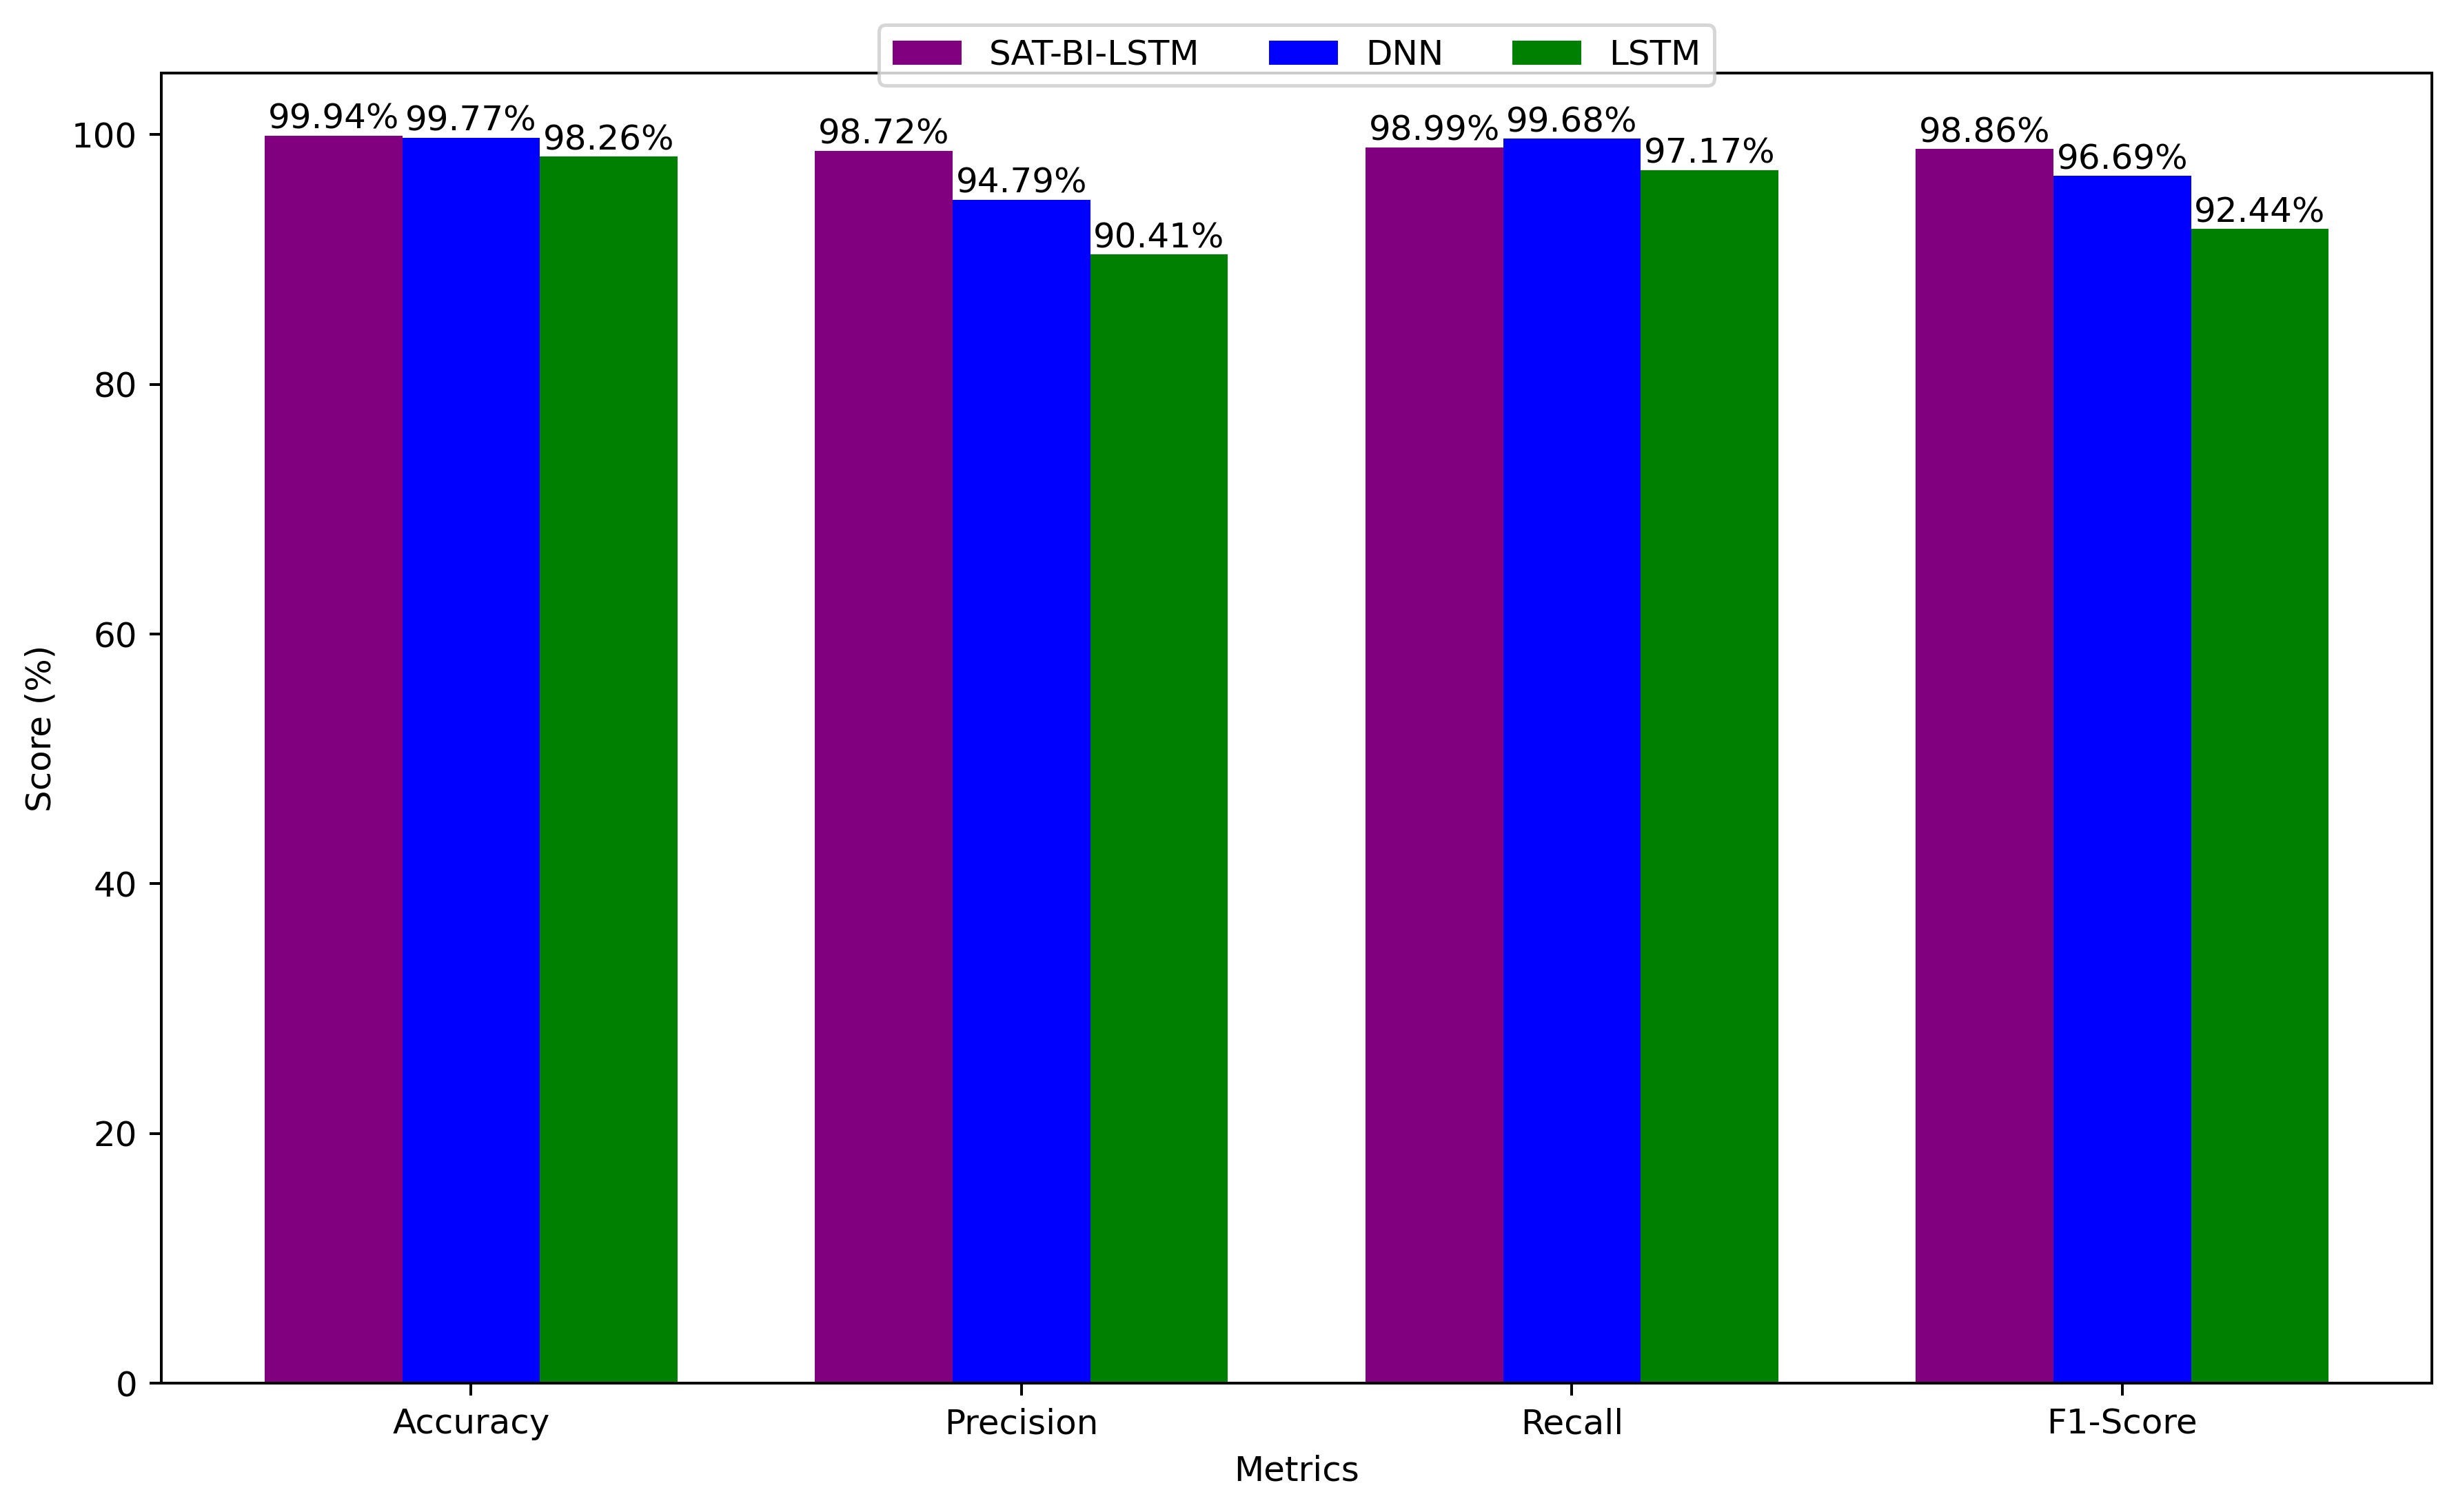

In [ ]:
###  PLOT Performance comparision  LSTM , DNN , BI-SAT-LSTM


###################################

import matplotlib.pyplot as plt
import numpy as np
import os


### Macro - Averaging

### BI-SAT-LSTM
# Overall Metrics :- Macro averaging
# Overall Accuracy: 0.9994
# Overall Precision: 0.9872
# Overall Recall: 0.9899
# Overall F1-score: 0.9886


### DNN

# Accuracy: 0.9977
# Precision: 0.9479
# Recall: 0.9968
# F1-score: 0.9669

### LSTM
# Overall Metrics :-LSTM 2019  Macro averaging
# Overall Accuracy: 0.9826
# Overall Precision (Macro): 0.9041
# Overall Recall (Macro): 0.9717
# Overall F1-score (Macro): 0.9244




metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

SAT_BI_LSTM = [0.9994, 0.9872, 0.9899, 0.9886]
DNN = [0.9977, 0.9479, 0.9968, 0.9669]
LSTM = [0.9826, 0.9041, 0.9717, 0.9244]




# Convert to percentage for display purposes
SAT_BI_LSTM = [i * 100 for i in SAT_BI_LSTM]
DNN = [i * 100 for i in DNN]
LSTM = [i * 100 for i in LSTM]

# X axis locations for the groups
x = np.arange(len(metrics))

# Width of bars
width = 0.25  # Reduced width for more gap

# Plotting with specified size and DPI
fig, ax = plt.subplots(figsize=(10, 6), dpi=360)

bars1 = ax.bar(x - width, SAT_BI_LSTM, width, label='SAT-BI-LSTM', color='purple')
bars2 = ax.bar(x, DNN, width, label='DNN', color='blue')
bars3 = ax.bar(x + width, LSTM, width, label='LSTM', color='green')

# Adding values on top of bars with smaller font size
def add_values(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', va='bottom', ha='center', fontsize=10)

add_values(bars1)
add_values(bars2)
add_values(bars3)

# Adding labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Score (%)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Adjust layout to avoid overlap
fig.tight_layout()

# Placing legend above the plot area
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)

# Directory to save the plot
save_path = '/content/drive/MyDrive/IDS-Research/CICDDOS-2019_DNN_LSTM_SAT_BI-LSTM'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Save the figure
plt.savefig(os.path.join(save_path, 'cicddo_2019_model_performance_comparison_sp.png'),bbox_inches='tight')
print(" Sept Macro - plotting DNN, LSTM , SAT-BI-LSTM")
# Display the plot
plt.show()








Sept Macro - plotting DNN, LSTM, SAT-BI-LSTM


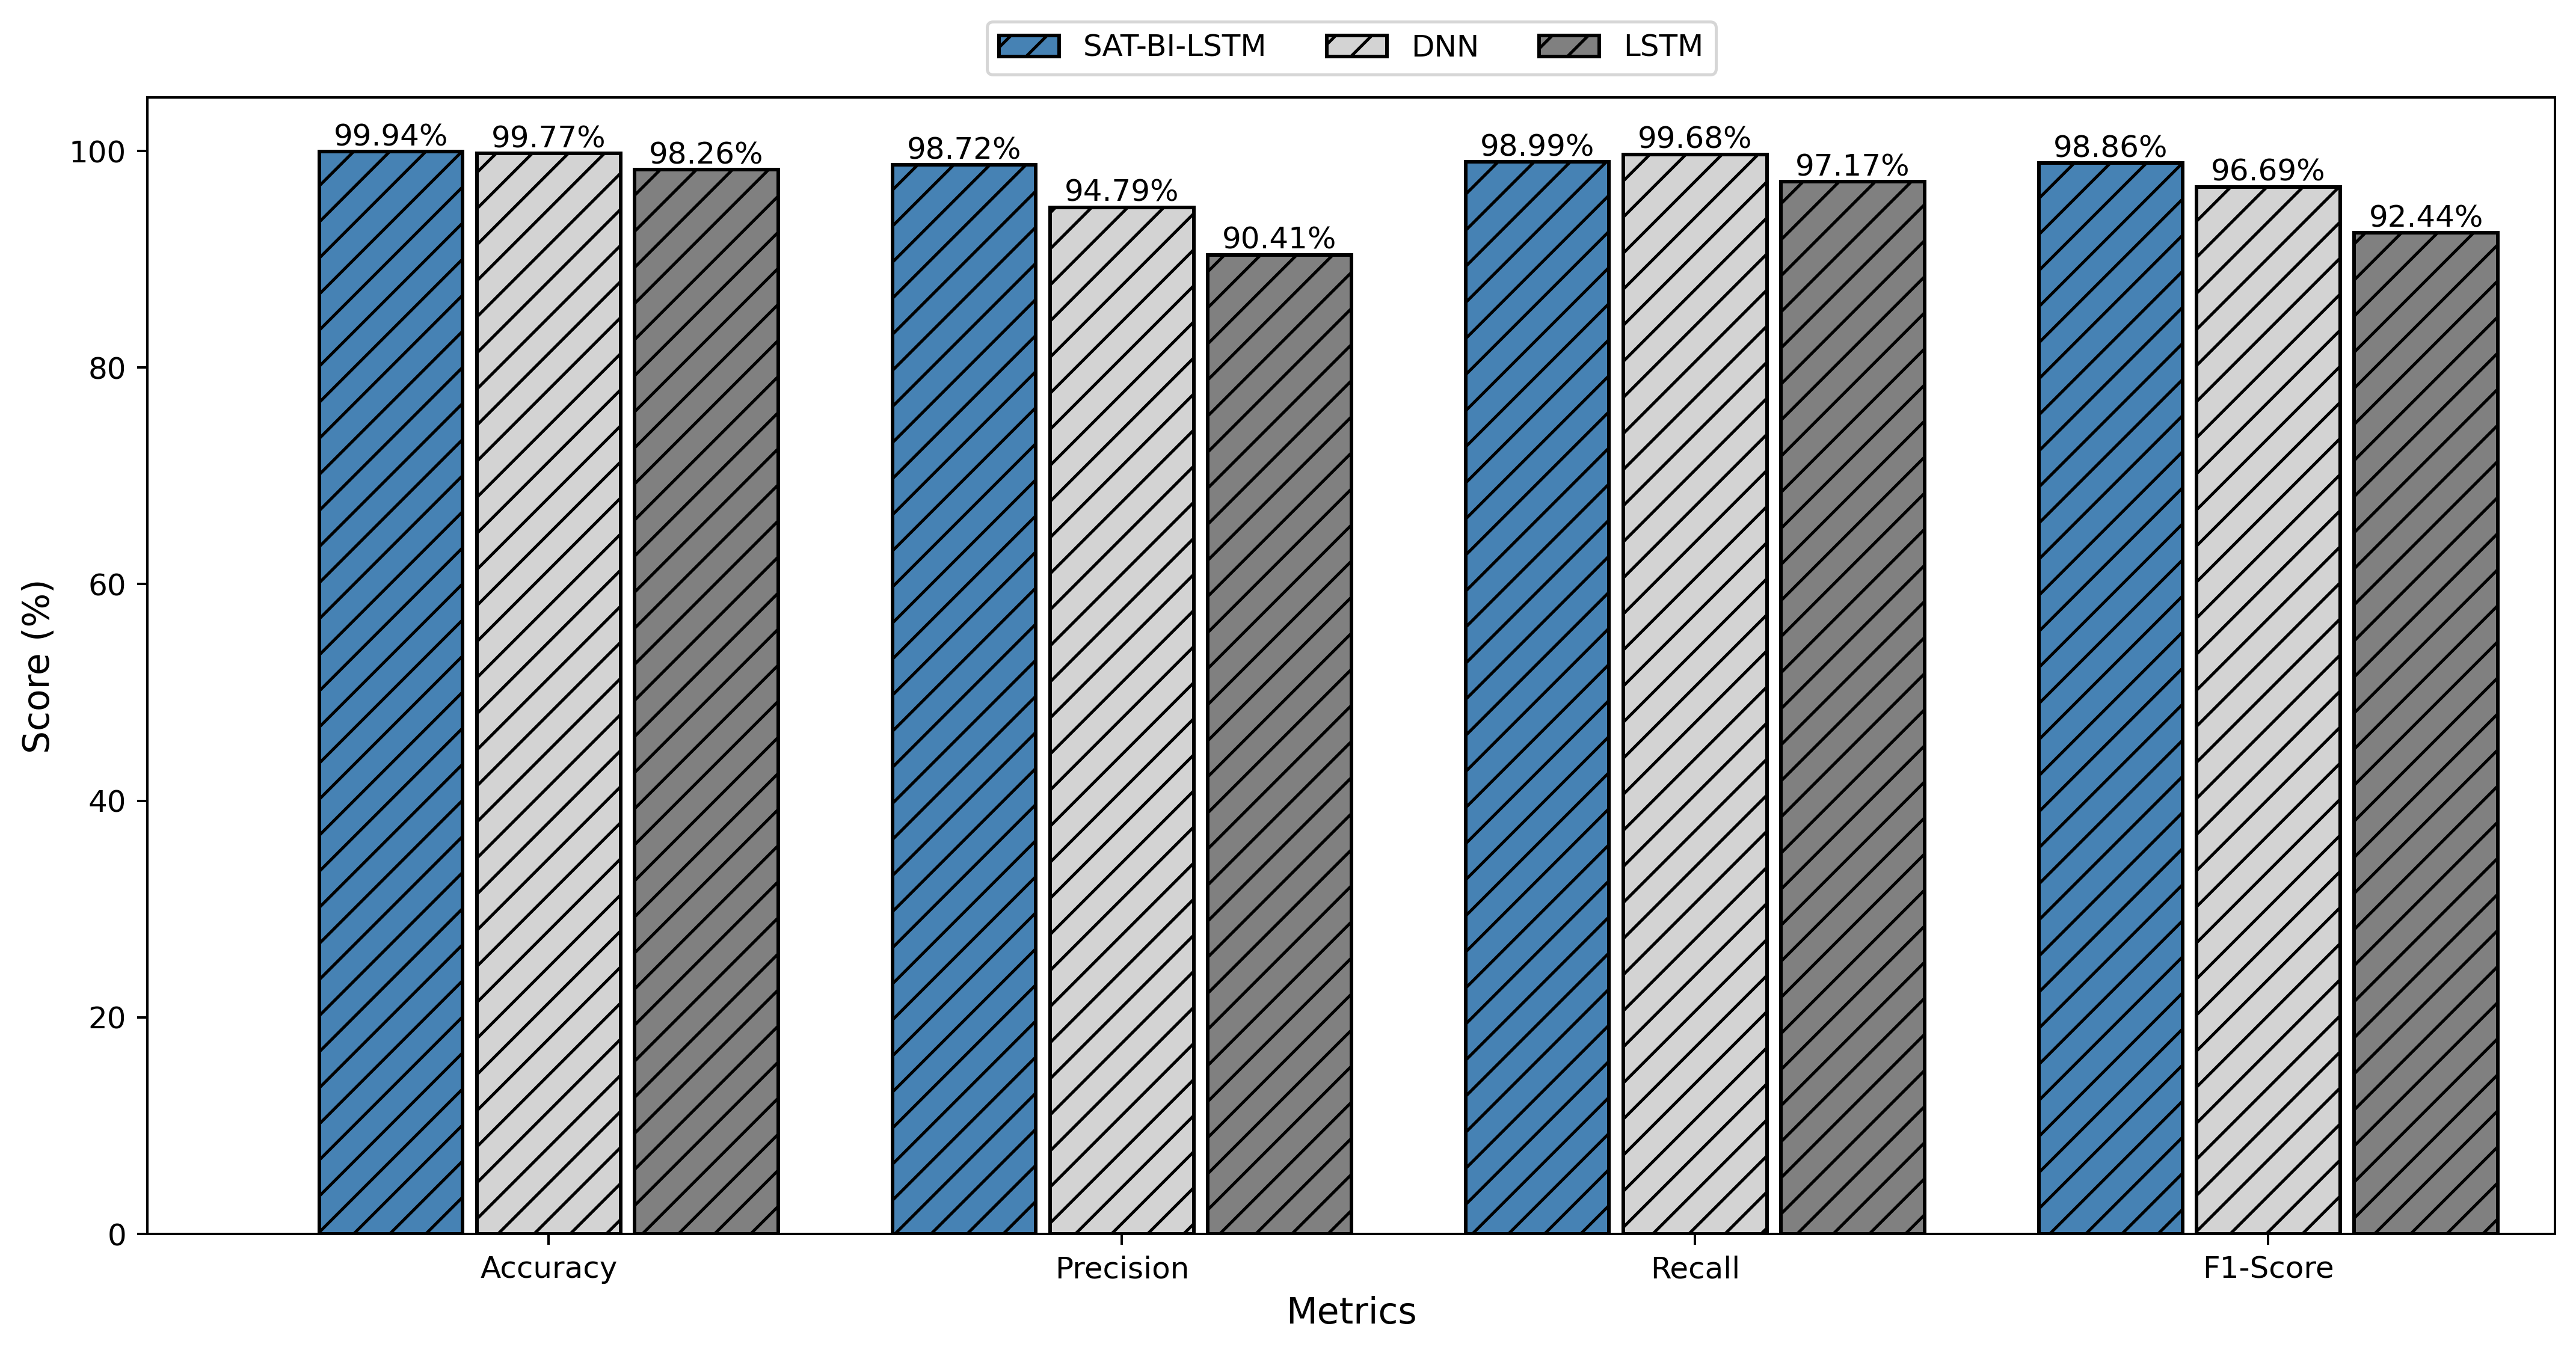

In [ ]:
# sept-17    bar code cdd2019
import matplotlib.pyplot as plt
import numpy as np
import os

# Metrics for the models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Results with macro average
SAT_BI_LSTM = [0.9994, 0.9872, 0.9899, 0.9886]
DNN = [0.9977, 0.9479, 0.9968, 0.9669]
LSTM = [0.9826, 0.9041, 0.9717, 0.9244]

# Convert to percentage for display purposes
SAT_BI_LSTM = [i * 100 for i in SAT_BI_LSTM]
DNN = [i * 100 for i in DNN]
LSTM = [i * 100 for i in LSTM]

# X axis locations for the groups
x = np.arange(len(metrics))

# Width of bars
width = 0.25  # Width of each bar

# Plotting with specified size and DPI
fig, ax = plt.subplots(figsize=(12, 6), dpi=360)

# Position adjustments
positions1 = x - width - 0.05 / 2 + 0.2
positions2 = x + 0.2
positions3 = x + width + 0.05 / 2 + 0.2

# Adding bars for SAT-BI-LSTM, DNN, and LSTM with color and edge settings
bars1 = ax.bar(positions1, SAT_BI_LSTM, width, label='SAT-BI-LSTM', color='#4682B4', hatch='//', edgecolor='black', linewidth=1.2)  # Darker Blue with stripes and border
bars2 = ax.bar(positions2, DNN, width, label='DNN', color='#D3D3D3', hatch='//', edgecolor='black', linewidth=1.2)  # Light Gray with stripes and border
bars3 = ax.bar(positions3, LSTM, width, label='LSTM', color='#808080', hatch='//', edgecolor='black', linewidth=1.2)  # Medium Gray with stripes and border

# Adding values on top of bars with font size and position settings
def add_values(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', va='bottom', ha='center', fontsize=10)

add_values(bars1)
add_values(bars2)
add_values(bars3)

# Adding labels with font size
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score (%)', fontsize=12)
ax.set_xticks(x + 0.2)  # Center the tick labels
ax.set_xticklabels(metrics, fontsize=10)

# Adjust x-limits to add space around the groups
ax.set_xlim(left=x[0] - width - 0.05 - 0.2, right=x[-1] + width + 0.05 + 0.2 * 2)  # Adjust limits to fit all groups within the plot

# Adjust layout to avoid overlap
fig.tight_layout()

# Placing legend above the plot area
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=3)

# Directory to save the plot
save_path = '/content/drive/MyDrive/IDS-Research/CICDDOS-2019_DNN_LSTM_SAT_BI-LSTM'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Save the figure
plt.savefig(os.path.join(save_path, 'cicddo_2019_model_performance_comparison_sp17.png'), bbox_inches='tight')

print("Sept Macro - plotting DNN, LSTM, SAT-BI-LSTM")

# Display the plot
plt.show()


Figure saved at: /content/drive/MyDrive/IDS-Research/CICDDOS-2019_DNN_LSTM_SAT_BI-LSTM_NEW/cicddo_2019_model_performance_comparison_sp17.png


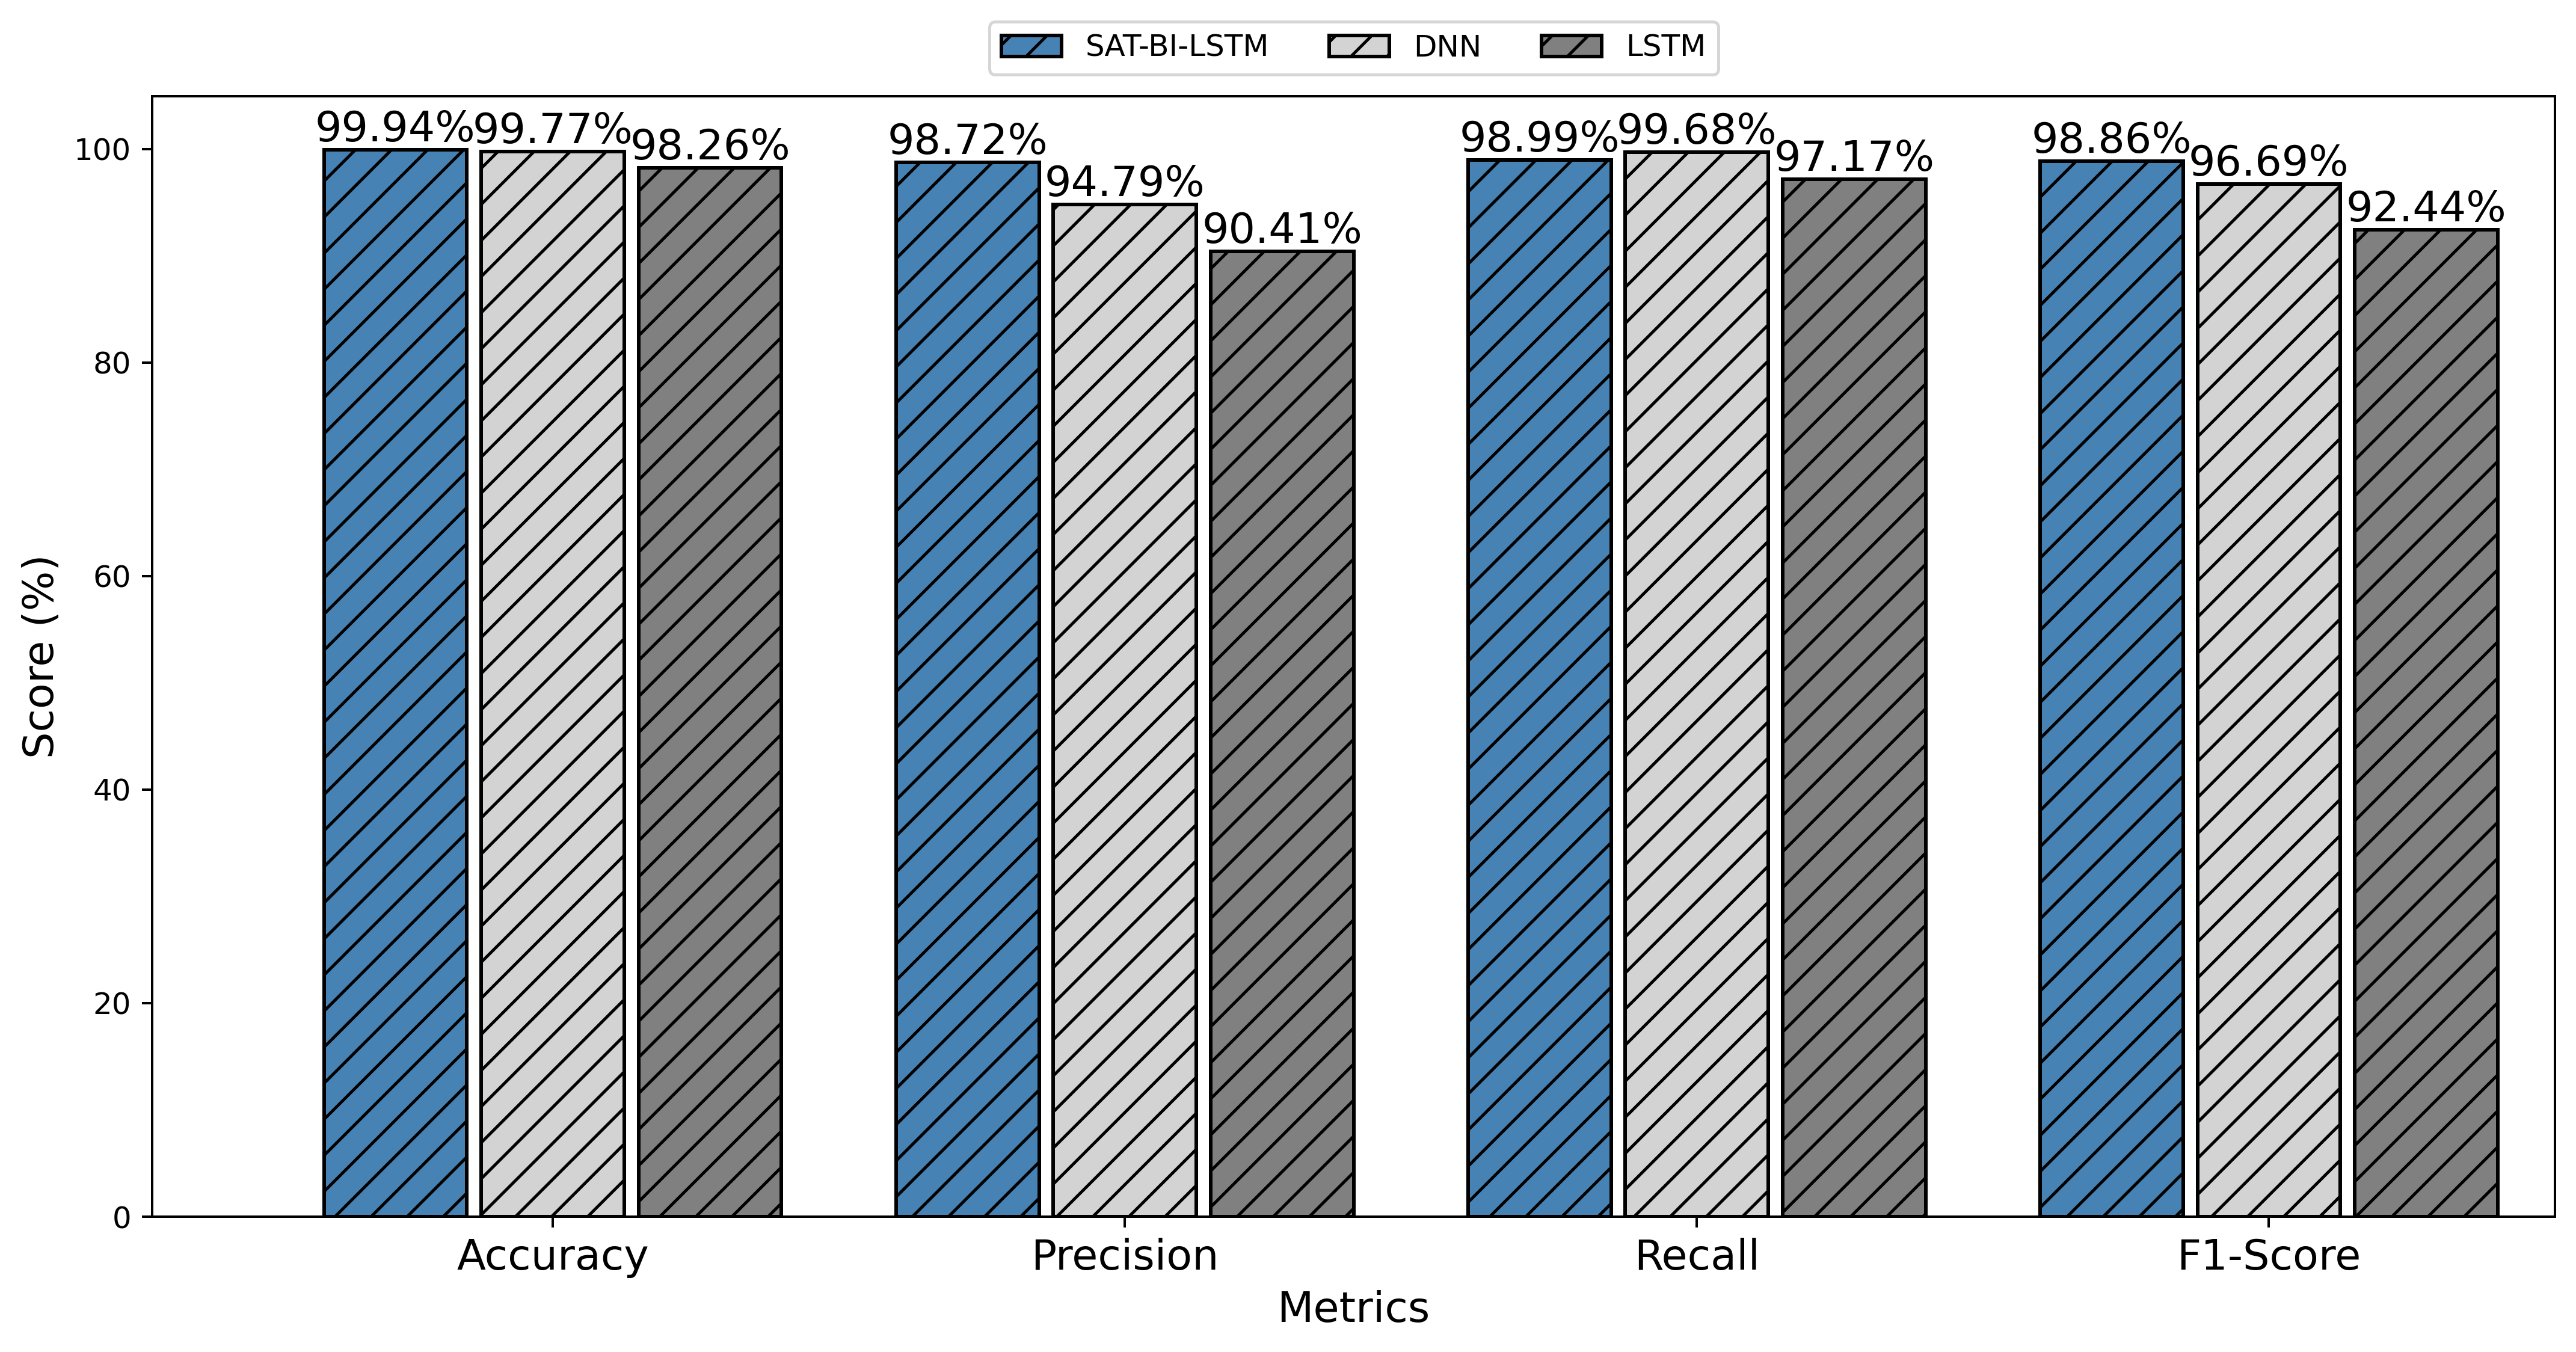

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Metrics for the models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Results with macro average
SAT_BI_LSTM = [0.9994, 0.9872, 0.9899, 0.9886]
DNN = [0.9977, 0.9479, 0.9968, 0.9669]
LSTM = [0.9826, 0.9041, 0.9717, 0.9244]

# Convert to percentage for display purposes
SAT_BI_LSTM = [i * 100 for i in SAT_BI_LSTM]
DNN = [i * 100 for i in DNN]
LSTM = [i * 100 for i in LSTM]

# X axis locations for the groups
x = np.arange(len(metrics))

# Width of bars
width = 0.25  # Width of each bar

# Plotting with specified size and DPI
fig, ax = plt.subplots(figsize=(12, 6), dpi=360)

# Position adjustments
positions1 = x - width - 0.05 / 2 + 0.2
positions2 = x + 0.2
positions3 = x + width + 0.05 / 2 + 0.2

# Adding bars for SAT-BI-LSTM, DNN, and LSTM with color and edge settings
bars1 = ax.bar(positions1, SAT_BI_LSTM, width, label='SAT-BI-LSTM', color='#4682B4', hatch='//', edgecolor='black', linewidth=1.2)  # Darker Blue with stripes and border
bars2 = ax.bar(positions2, DNN, width, label='DNN', color='#D3D3D3', hatch='//', edgecolor='black', linewidth=1.2)  # Light Gray with stripes and border
bars3 = ax.bar(positions3, LSTM, width, label='LSTM', color='#808080', hatch='//', edgecolor='black', linewidth=1.2)  # Medium Gray with stripes and border

# Adding values on top of bars with font size and position settings
def add_values(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', va='bottom', ha='center', fontsize=14)

add_values(bars1)
add_values(bars2)
add_values(bars3)

# Adding labels with font size
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Score (%)', fontsize=14)
ax.set_xticks(x + 0.2)  # Center the tick labels
ax.set_xticklabels(metrics, fontsize=14)

# Adjust x-limits to add space around the groups
ax.set_xlim(left=x[0] - width - 0.05 - 0.2, right=x[-1] + width + 0.05 + 0.2 * 2)  # Adjust limits to fit all groups within the plot

# Adjust layout to avoid overlap
fig.tight_layout()

# Placing legend above the plot area
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=3)

# Directory to save the plot
save_path = '/content/drive/MyDrive/IDS-Research/CICDDOS-2019_DNN_LSTM_SAT_BI-LSTM_NEW'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Save the figure
save_file = os.path.join(save_path, 'cicddo_2019_model_performance_comparison_sp17.png')
plt.savefig(save_file, bbox_inches='tight')

# Print the path for debugging
print(f"Figure saved at: {save_file}")

# Display the plot
plt.show()


Figure saved at: /content/drive/MyDrive/IDS-Research/Comparison_Plots/CICDDOS_2019_model_performance_comparison_OCT1031.jpeg


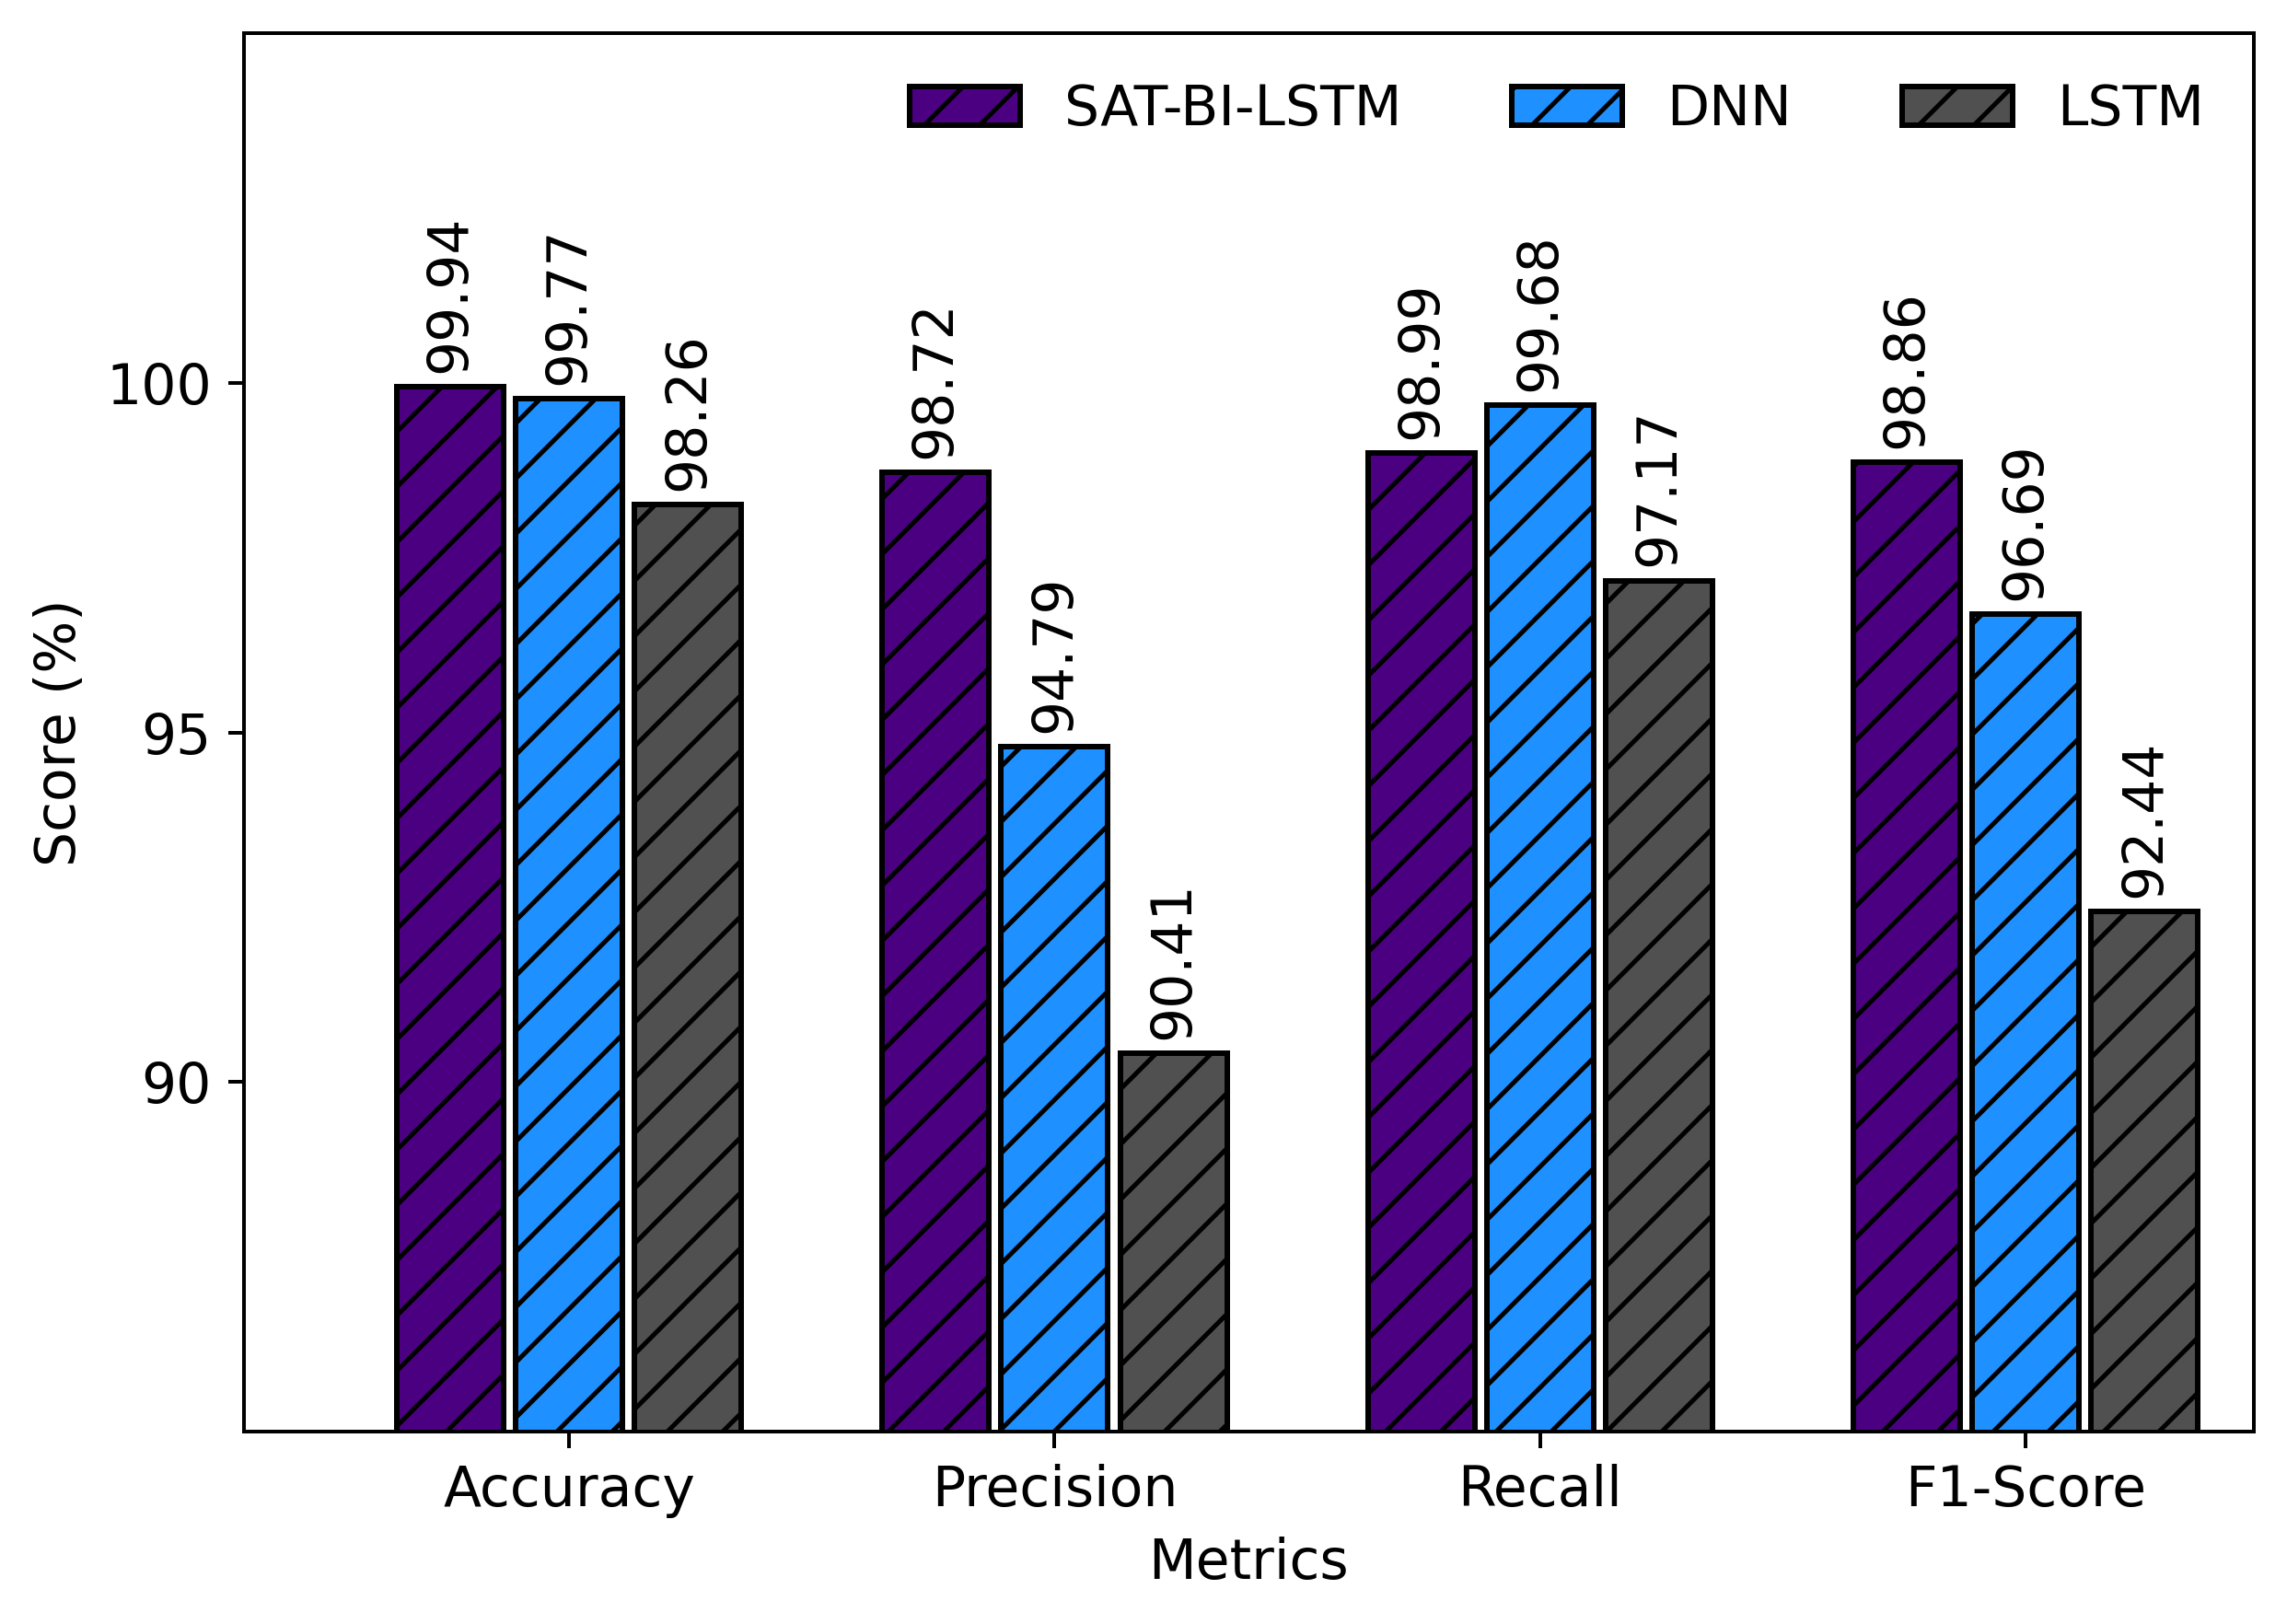

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import os

# # Metrics for the models
# metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# # Results with macro average
# SAT_BI_LSTM = [0.9994, 0.9872, 0.9899, 0.9886]
# DNN = [0.9977, 0.9479, 0.9968, 0.9669]
# LSTM = [0.9826, 0.9041, 0.9717, 0.9244]

# # Convert to percentage for display purposes
# SAT_BI_LSTM = [i * 100 for i in SAT_BI_LSTM]
# DNN = [i * 100 for i in DNN]
# LSTM = [i * 100 for i in LSTM]

# # X axis locations for the groups
# x = np.arange(len(metrics))

# # Width of bars
# width = 0.22  # Width of each bar

# # Plotting with specified size and DPI
# fig, ax = plt.subplots(figsize=(7, 6), dpi=360)

# # Position adjustments
# positions1 = x - width - 0.05 / 2 + 0.2
# positions2 = x + 0.2
# positions3 = x + width + 0.05 / 2 + 0.2

# # Adding bars for SAT-BI-LSTM, DNN, and LSTM with specific colors and patterns
# bars1 = ax.bar(positions1, SAT_BI_LSTM, width, label='SAT-BI-LSTM', color='#4B0082', hatch='//', edgecolor='black', linewidth=1.2)  # Deep indigo
# bars2 = ax.bar(positions2, DNN, width, label='DNN', color='#1E90FF', hatch='//', edgecolor='black', linewidth=1.2)  # Medium intensity blue
# bars3 = ax.bar(positions3, LSTM, width, label='LSTM', color='#505050', hatch='//', edgecolor='black', linewidth=1.2)  # Dark gray

# # Adding values on top of bars without percentage symbol and 90-degree rotation
# def add_values(bars):
#     for bar in bars:
#         yval = bar.get_height()
#         ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=7, rotation=0)

# add_values(bars1)
# add_values(bars2)
# add_values(bars3)

# # Adding labels with font size
# ax.set_xlabel('Metrics', fontsize=8)
# ax.set_ylabel('Score (%)', fontsize=8)
# ax.set_xticks(x + 0.2)  # Center the tick labels
# ax.set_xticklabels(metrics, fontsize=8)

# # Adjust x-limits to add space around the groups
# ax.set_xlim(left=x[0] - width - 0.05 - 0.2, right=x[-1] + width + 0.05 + 0.2 * 2)  # Adjust limits to fit all groups within the plot

# # Adjust layout to avoid overlap
# fig.tight_layout()

# # Placing legend above the plot area
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=3, fontsize=8)

# # Directory to save the plot
# save_path = '/content/drive/MyDrive/IDS-Research/CICDDOS-2019_DNN_LSTM_SAT_BI-LSTM_NEW'

# # Create the directory if it doesn't exist
# os.makedirs(save_path, exist_ok=True)

# # Save the figure
# save_file = os.path.join(save_path, 'cicddo_2019_model_performance_comparison_OCT1031.png')
# plt.savefig(save_file, bbox_inches='tight')

# # Print the path for debugging
# print(f"Figure saved at: {save_file}")

# # Display the plot
# plt.show()
# Final plot on CICDDOS-2019
import matplotlib.pyplot as plt
import numpy as np
import os

# Metrics for the models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Results with macro average
SAT_BI_LSTM = [0.9994, 0.9872, 0.9899, 0.9886]
DNN = [0.9977, 0.9479, 0.9968, 0.9669]
LSTM = [0.9826, 0.9041, 0.9717, 0.9244]

# Convert to percentage for display purposes
SAT_BI_LSTM = [i * 100 for i in SAT_BI_LSTM]
DNN = [i * 100 for i in DNN]
LSTM = [i * 100 for i in LSTM]

# X axis locations for the groups
x = np.arange(len(metrics))

# Width of bars
width = 0.22  # Width of each bar

# Plotting with specified size and DPI
fig, ax = plt.subplots(figsize=(7, 5), dpi=360)

# Position adjustments
positions1 = x - width - 0.05 / 2 + 0.2
positions2 = x + 0.2
positions3 = x + width + 0.05 / 2 + 0.2

# Adding bars for SAT-BI-LSTM, DNN, and LSTM with specific colors and patterns
bars1 = ax.bar(positions1, SAT_BI_LSTM, width, label='SAT-BI-LSTM', color='#4B0082', hatch='//', edgecolor='black', linewidth=1.2)  # Deep indigo
bars2 = ax.bar(positions2, DNN, width, label='DNN', color='#1E90FF', hatch='//', edgecolor='black', linewidth=1.2)  # Medium intensity blue
bars3 = ax.bar(positions3, LSTM, width, label='LSTM', color='#505050', hatch='//', edgecolor='black', linewidth=1.2)  # Dark gray

# Adding values on top of bars without percentage symbol and 90-degree rotation
# def add_values(bars):
#     for bar in bars:
#         yval = bar.get_height()
#         ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=7, rotation=90)
def add_values(bars, offset=0.5):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval + offset, f'{yval:.2f}',
                va='bottom', ha='center', fontsize=12, rotation=90)

# add_values(bars1)
# add_values(bars2)
# add_values(bars3)

add_values(bars1, offset=0.2)
add_values(bars2, offset=0.2)
add_values(bars3, offset=0.2)

# Adding labels with font size
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score (%)', fontsize=12)
ax.set_xticks(x + 0.2)  # Center the tick labels
ax.set_xticklabels(metrics, fontsize=12)

# Set y-axis limits to start slightly below the lowest bar and end slightly above 100
ax.set_ylim(85, 105)  # Adjust upper limit to 102 to bring 100 inside the plot box
ax.set_yticks([90, 95, 100])  # Customize ticks to fit the new range
ax.tick_params(axis='y', labelsize=12)
# Adjust x-limits to add space around the groups
ax.set_xlim(left=x[0] - width - 0.05 - 0.2, right=x[-1] + width + 0.05 + 0.2 * 2)  # Adjust limits to fit all groups within the plot

# Adjust layout to avoid overlap
fig.tight_layout()

# # Placing legend above the plot area
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=3, fontsize=8)
# Place legend inside the plot box
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=3, fontsize=12, frameon=False)

# Directory to save the plot
save_path = '/content/drive/MyDrive/IDS-Research/Comparison_Plots'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Save the figure
save_file = os.path.join(save_path, 'CICDDOS_2019_model_performance_comparison_OCT1031.jpeg')
plt.savefig(save_file, bbox_inches='tight')

# Print the path for debugging
print(f"Figure saved at: {save_file}")

# Display the plot
plt.show()



Figure saved at: /content/drive/MyDrive/IDS-Research/CICDDOS-2019_DNN_LSTM_SAT_BI-LSTM_NEW/cicddo_2019_model_performance_comparison_sp17.png


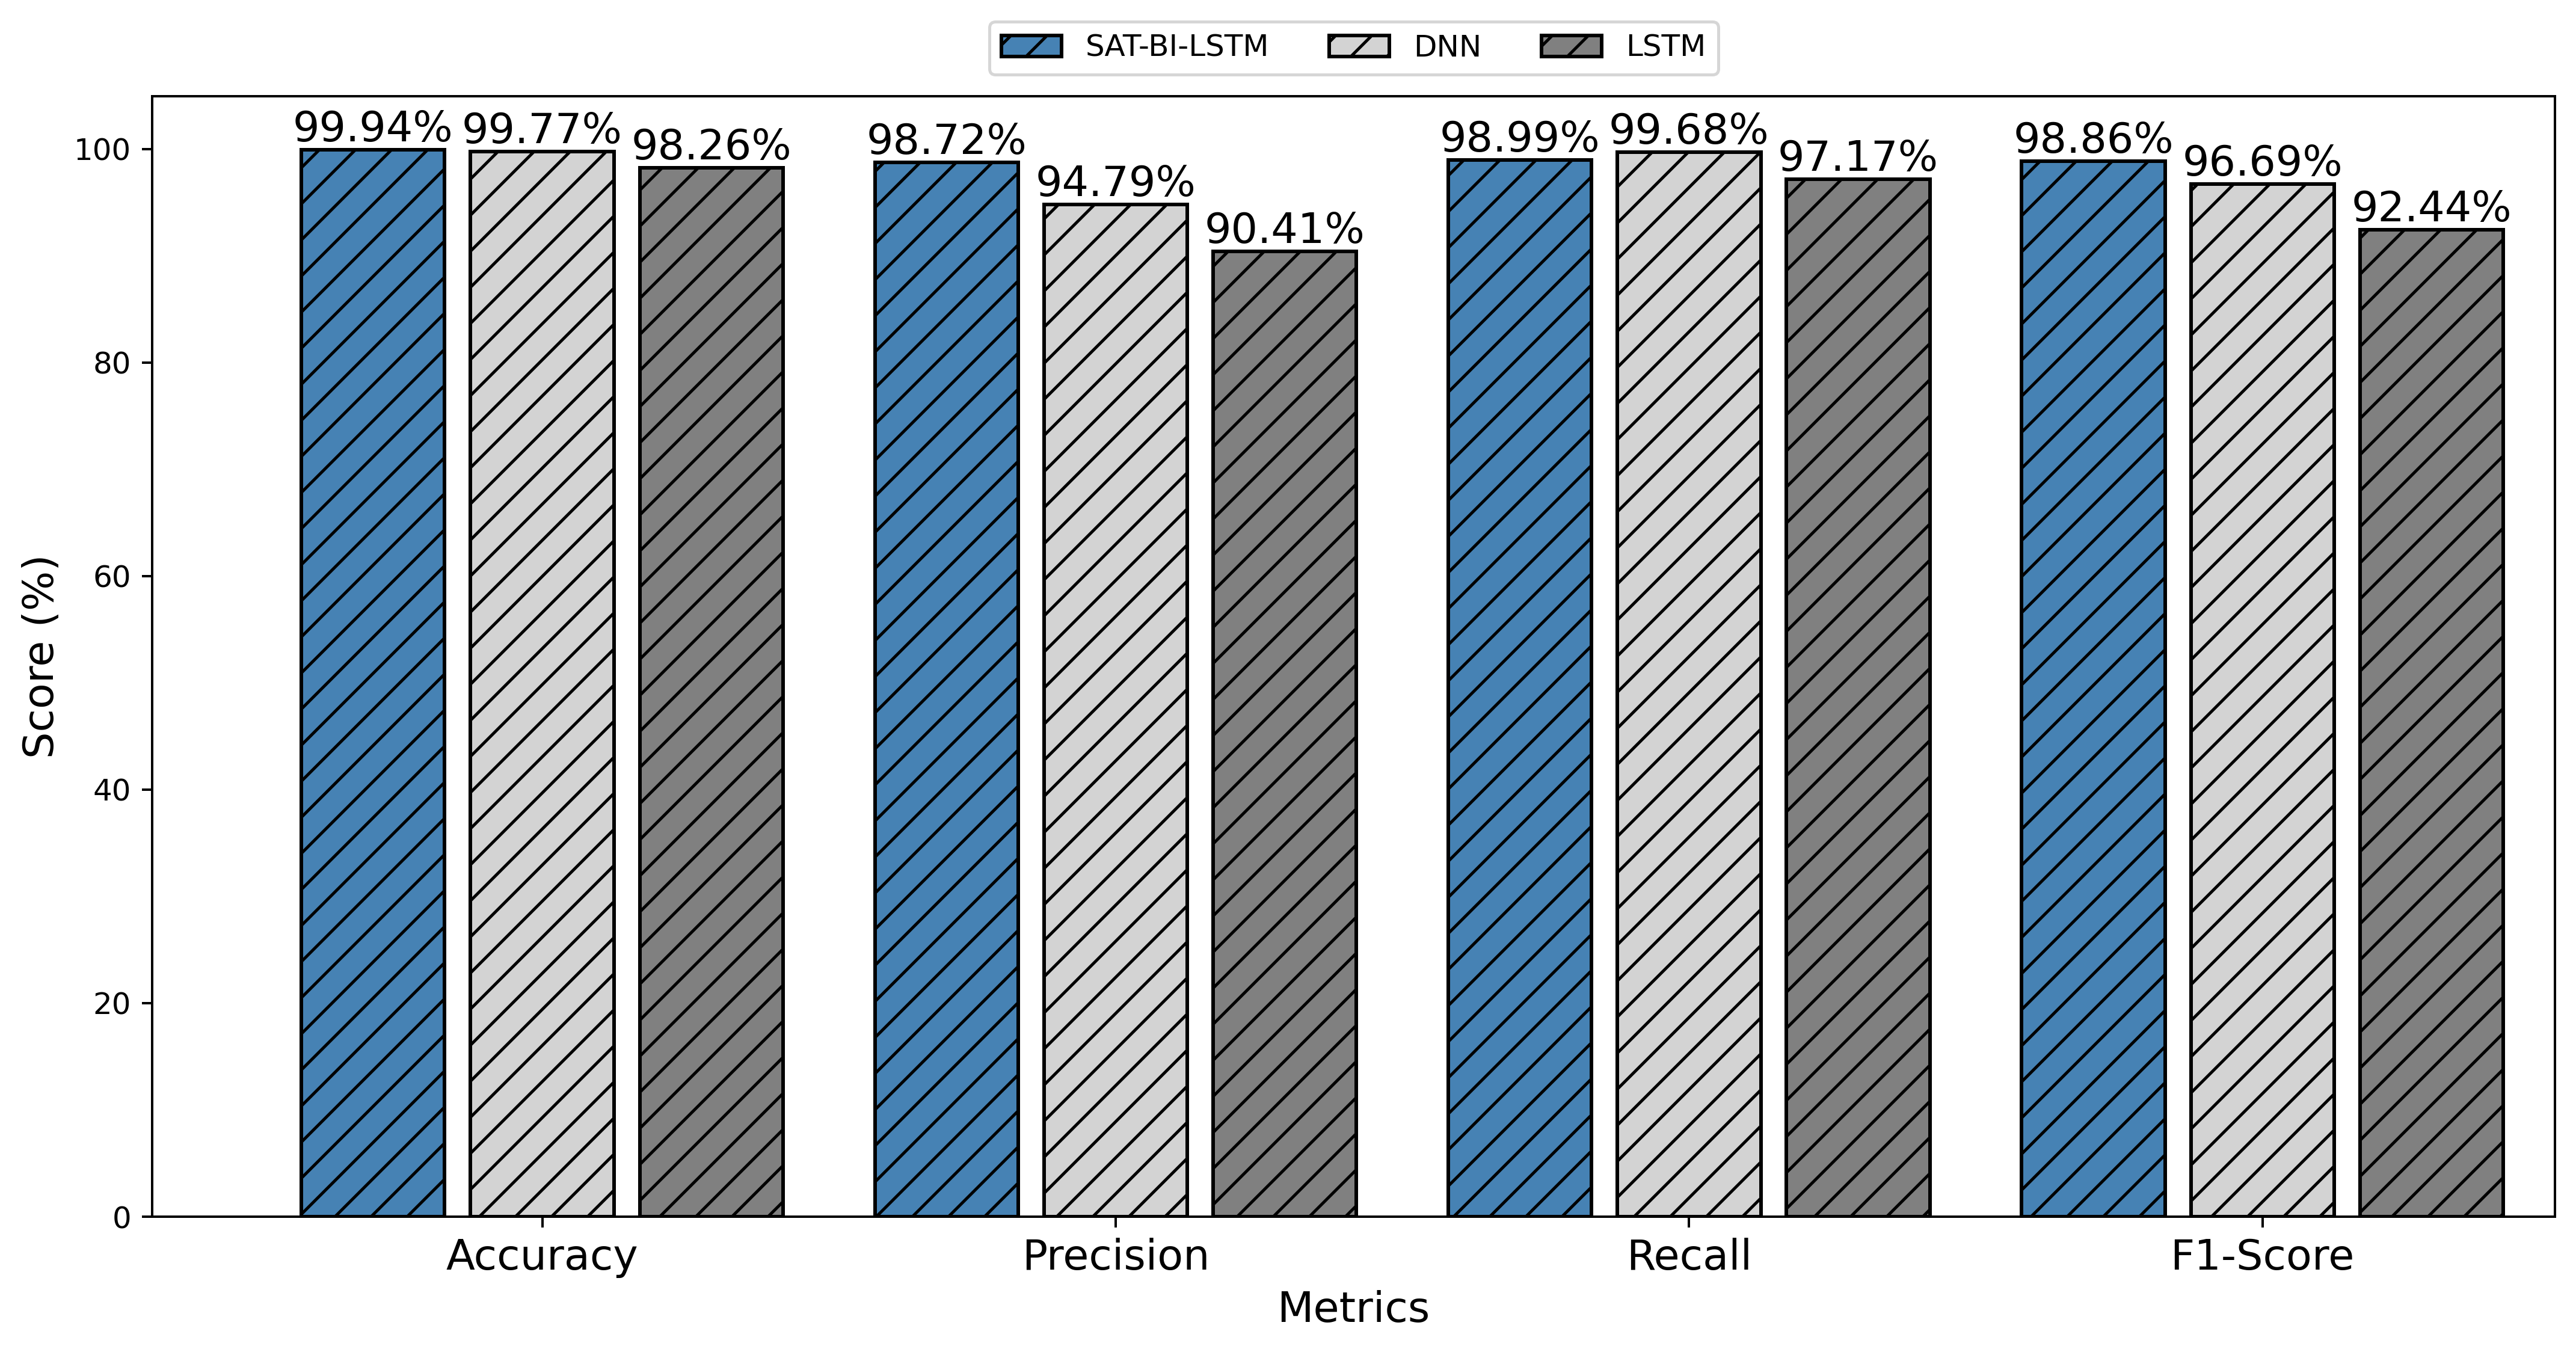

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Metrics for the models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Results with macro average
SAT_BI_LSTM = [0.9994, 0.9872, 0.9899, 0.9886]
DNN = [0.9977, 0.9479, 0.9968, 0.9669]
LSTM = [0.9826, 0.9041, 0.9717, 0.9244]

# Convert to percentage for display purposes
SAT_BI_LSTM = [i * 100 for i in SAT_BI_LSTM]
DNN = [i * 100 for i in DNN]
LSTM = [i * 100 for i in LSTM]

# X axis locations for the groups
x = np.arange(len(metrics))

# Width of bars
width = 0.25  # Width of each bar

# Gap between bars within a group and between groups
bar_gap = 0.09  # Gap between bars within the group
group_gap = 0.17  # Gap between groups of bars

# Plotting with specified size and DPI
fig, ax = plt.subplots(figsize=(12, 6), dpi=360)

# Position adjustments
positions1 = x - width - bar_gap / 2 + group_gap
positions2 = x + group_gap
positions3 = x + width + bar_gap / 2 + group_gap

# Adding bars for SAT-BI-LSTM, DNN, and LSTM with color and edge settings
bars1 = ax.bar(positions1, SAT_BI_LSTM, width, label='SAT-BI-LSTM', color='#4682B4', hatch='//', edgecolor='black', linewidth=1.2)  # Darker Blue with stripes and border
bars2 = ax.bar(positions2, DNN, width, label='DNN', color='#D3D3D3', hatch='//', edgecolor='black', linewidth=1.2)  # Light Gray with stripes and border
bars3 = ax.bar(positions3, LSTM, width, label='LSTM', color='#808080', hatch='//', edgecolor='black', linewidth=1.2)  # Medium Gray with stripes and border

# Adding values on top of bars with font size and position settings
def add_values(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', va='bottom', ha='center', fontsize=14)

add_values(bars1)
add_values(bars2)
add_values(bars3)

# Adding labels with font size
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Score (%)', fontsize=14)
ax.set_xticks(x + group_gap)  # Center the tick labels
ax.set_xticklabels(metrics, fontsize=14)

# Adjust x-limits to add space around the groups
ax.set_xlim(left=x[0] - width - bar_gap - group_gap, right=x[-1] + width + bar_gap + group_gap * 2)  # Adjust limits to fit all groups within the plot

# Adjust layout to avoid overlap
fig.tight_layout()

# Placing legend above the plot area
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=3)

# Directory to save the plot
save_path = '/content/drive/MyDrive/IDS-Research/CICDDOS-2019_DNN_LSTM_SAT_BI-LSTM_NEW'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Save the figure
save_file = os.path.join(save_path, 'cicddo_2019_model_performance_comparison_sp17.png')
plt.savefig(save_file, bbox_inches='tight')

# Print the path for debugging
print(f"Figure saved at: {save_file}")

# Display the plot
plt.show()


Figure saved at: /content/drive/MyDrive/IDS-Research/Comparison_Plots/CICot_2023_model_performance_comparison_OCT1031.jpeg


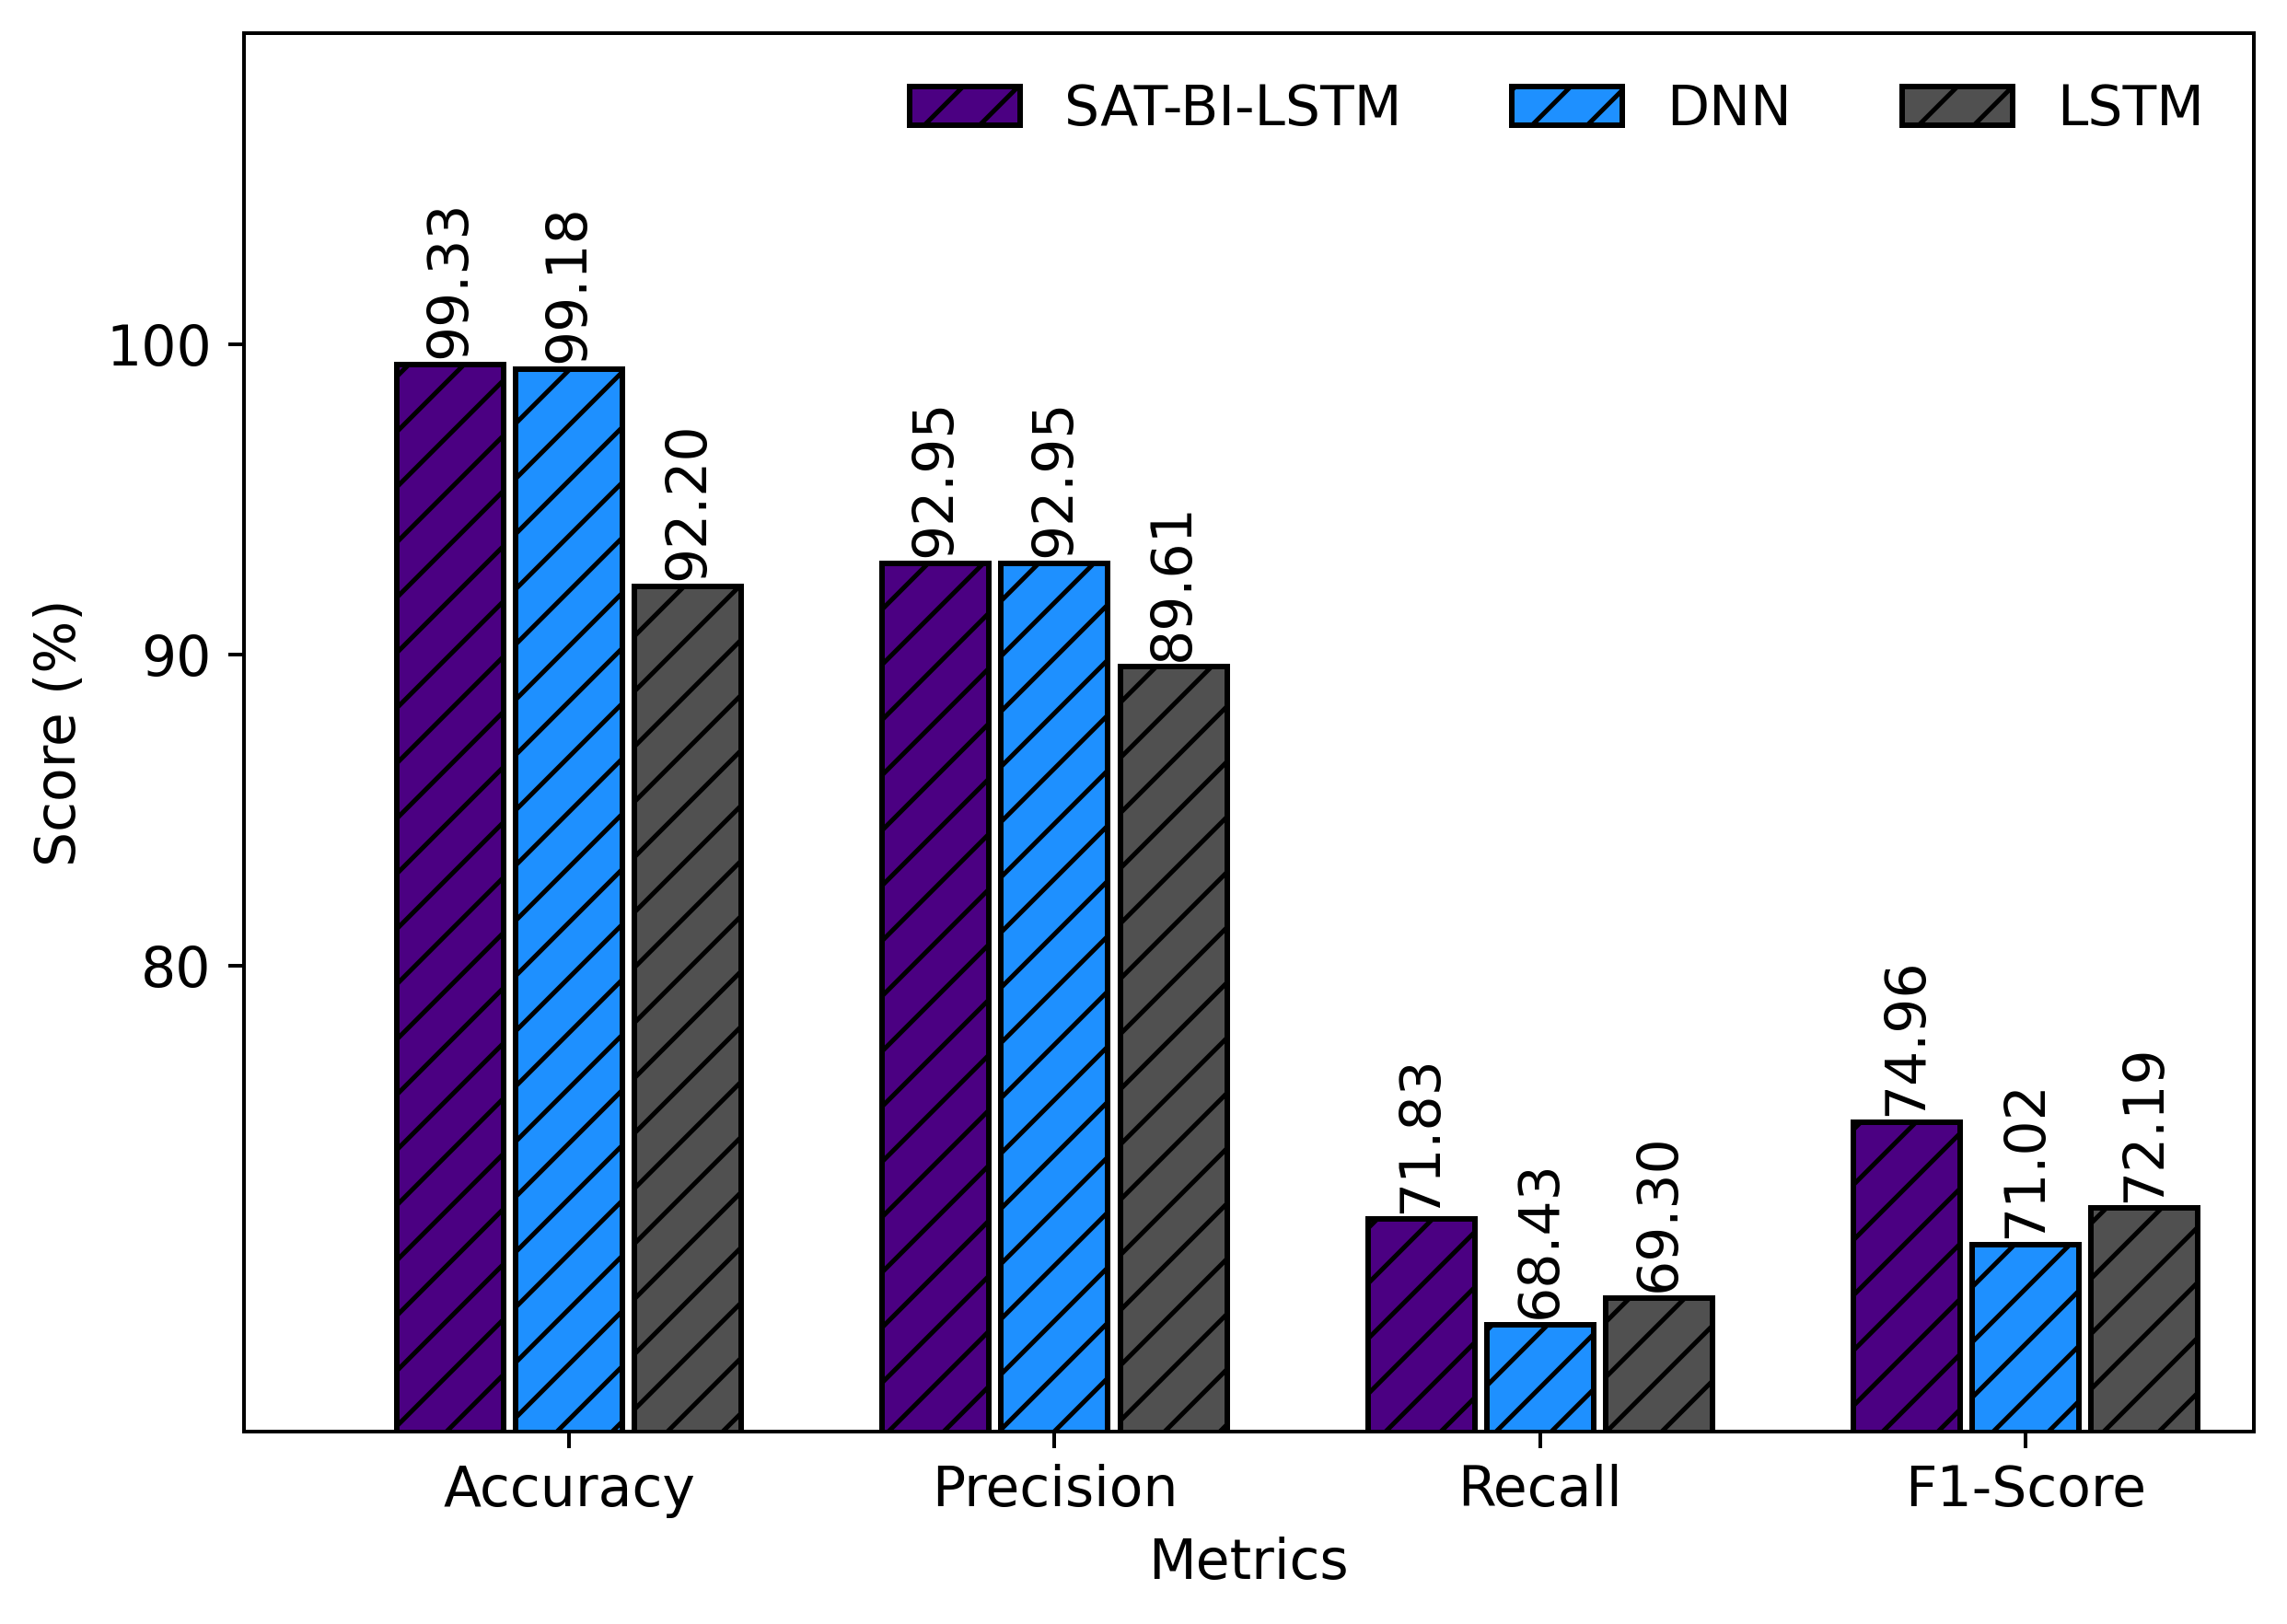

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import os

# # Metrics for the models
# metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# # Results with macro average
# SAT_BI_LSTM = [0.9994, 0.9872, 0.9899, 0.9886]
# DNN = [0.9977, 0.9479, 0.9968, 0.9669]
# LSTM = [0.9826, 0.9041, 0.9717, 0.9244]

# # Convert to percentage for display purposes
# SAT_BI_LSTM = [i * 100 for i in SAT_BI_LSTM]
# DNN = [i * 100 for i in DNN]
# LSTM = [i * 100 for i in LSTM]

# # X axis locations for the groups
# x = np.arange(len(metrics))

# # Width of bars
# width = 0.22  # Width of each bar

# # Plotting with specified size and DPI
# fig, ax = plt.subplots(figsize=(7, 6), dpi=360)

# # Position adjustments
# positions1 = x - width - 0.05 / 2 + 0.2
# positions2 = x + 0.2
# positions3 = x + width + 0.05 / 2 + 0.2

# # Adding bars for SAT-BI-LSTM, DNN, and LSTM with specific colors and patterns
# bars1 = ax.bar(positions1, SAT_BI_LSTM, width, label='SAT-BI-LSTM', color='#4B0082', hatch='//', edgecolor='black', linewidth=1.2)  # Deep indigo
# bars2 = ax.bar(positions2, DNN, width, label='DNN', color='#1E90FF', hatch='//', edgecolor='black', linewidth=1.2)  # Medium intensity blue
# bars3 = ax.bar(positions3, LSTM, width, label='LSTM', color='#505050', hatch='//', edgecolor='black', linewidth=1.2)  # Dark gray

# # Adding values on top of bars without percentage symbol and 90-degree rotation
# def add_values(bars):
#     for bar in bars:
#         yval = bar.get_height()
#         ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=7, rotation=0)

# add_values(bars1)
# add_values(bars2)
# add_values(bars3)

# # Adding labels with font size
# ax.set_xlabel('Metrics', fontsize=8)
# ax.set_ylabel('Score (%)', fontsize=8)
# ax.set_xticks(x + 0.2)  # Center the tick labels
# ax.set_xticklabels(metrics, fontsize=8)

# # Adjust x-limits to add space around the groups
# ax.set_xlim(left=x[0] - width - 0.05 - 0.2, right=x[-1] + width + 0.05 + 0.2 * 2)  # Adjust limits to fit all groups within the plot

# # Adjust layout to avoid overlap
# fig.tight_layout()

# # Placing legend above the plot area
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=3, fontsize=8)

# # Directory to save the plot
# save_path = '/content/drive/MyDrive/IDS-Research/CICDDOS-2019_DNN_LSTM_SAT_BI-LSTM_NEW'

# # Create the directory if it doesn't exist
# os.makedirs(save_path, exist_ok=True)

# # Save the figure
# save_file = os.path.join(save_path, 'cicddo_2019_model_performance_comparison_OCT1031.png')
# plt.savefig(save_file, bbox_inches='tight')

# # Print the path for debugging
# print(f"Figure saved at: {save_file}")

# # Display the plot
# plt.show()
### Final plot for CICIoT2023
import matplotlib.pyplot as plt
import numpy as np
import os

# Metrics for the models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Results with macro average
SAT_BI_LSTM = [0.9933, 0.9295, 0.7183, 0.7496]
DNN = [0.9918, 0.9295, 0.6843, 0.7102]
LSTM = [0.9220, 0.8961, 0.6930, 0.7219]

# Convert to percentage for display purposes
SAT_BI_LSTM = [i * 100 for i in SAT_BI_LSTM]
DNN = [i * 100 for i in DNN]
LSTM = [i * 100 for i in LSTM]

# X axis locations for the groups
x = np.arange(len(metrics))

# Width of bars
width = 0.22  # Width of each bar

# Plotting with specified size and DPI
fig, ax = plt.subplots(figsize=(7, 5), dpi=360)

# Position adjustments
positions1 = x - width - 0.05 / 2 + 0.2
positions2 = x + 0.2
positions3 = x + width + 0.05 / 2 + 0.2

# Adding bars for SAT-BI-LSTM, DNN, and LSTM with specific colors and patterns
bars1 = ax.bar(positions1, SAT_BI_LSTM, width, label='SAT-BI-LSTM', color='#4B0082', hatch='//', edgecolor='black', linewidth=1.2)  # Deep indigo
bars2 = ax.bar(positions2, DNN, width, label='DNN', color='#1E90FF', hatch='//', edgecolor='black', linewidth=1.2)  # Medium intensity blue
bars3 = ax.bar(positions3, LSTM, width, label='LSTM', color='#505050', hatch='//', edgecolor='black', linewidth=1.2)  # Dark gray

# Adding values on top of bars without percentage symbol and 90-degree rotation
# def add_values(bars):
#     for bar in bars:
#         yval = bar.get_height()
#         ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=7, rotation=90)
def add_values(bars, offset=0.5):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval + offset, f'{yval:.2f}',
                va='bottom', ha='center', fontsize=12, rotation=90)

# add_values(bars1)
# add_values(bars2)
# add_values(bars3)

add_values(bars1, offset=0.2)
add_values(bars2, offset=0.2)
add_values(bars3, offset=0.2)

# Adding labels with font size
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score (%)', fontsize=12)
ax.set_xticks(x + 0.2)  # Center the tick labels
ax.set_xticklabels(metrics, fontsize=12)

# Set y-axis limits to start slightly below the lowest bar and end slightly above 100
# ax.set_ylim(85, 102)  # Adjust upper limit to 102 to bring 100 inside the plot box
# ax.set_yticks([90, 95, 100])  # Customize ticks to fit the new range
ax.set_ylim(65, 110)  # Adjust upper limit to bring 100 inside the plot box
ax.set_yticks([80, 90, 100])  # Customize ticks to fit the new range
ax.tick_params(axis='y', labelsize=12)
# Adjust x-limits to add space around the groups
ax.set_xlim(left=x[0] - width - 0.05 - 0.2, right=x[-1] + width + 0.05 + 0.2 * 2)  # Adjust limits to fit all groups within the plot

# Adjust layout to avoid overlap
fig.tight_layout()

# # Placing legend above the plot area
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=3, fontsize=8)
# Place legend inside the plot box
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=3, fontsize=12, frameon=False)

# Directory to save the plot
save_path2 = '/content/drive/MyDrive/IDS-Research/Comparison_Plots'

# Create the directory if it doesn't exist
os.makedirs(save_path2, exist_ok=True)

# Save the figure
save_file = os.path.join(save_path2, 'CICot_2023_model_performance_comparison_OCT1031.jpeg')
plt.savefig(save_file, bbox_inches='tight')

# Print the path for debugging
print(f"Figure saved at: {save_file}")

# Display the plot
plt.show()



Figure saved at: /content/drive/MyDrive/IDS-Research/Comparison_Plots/FOR_FNR_FPR_comparision.jpeg


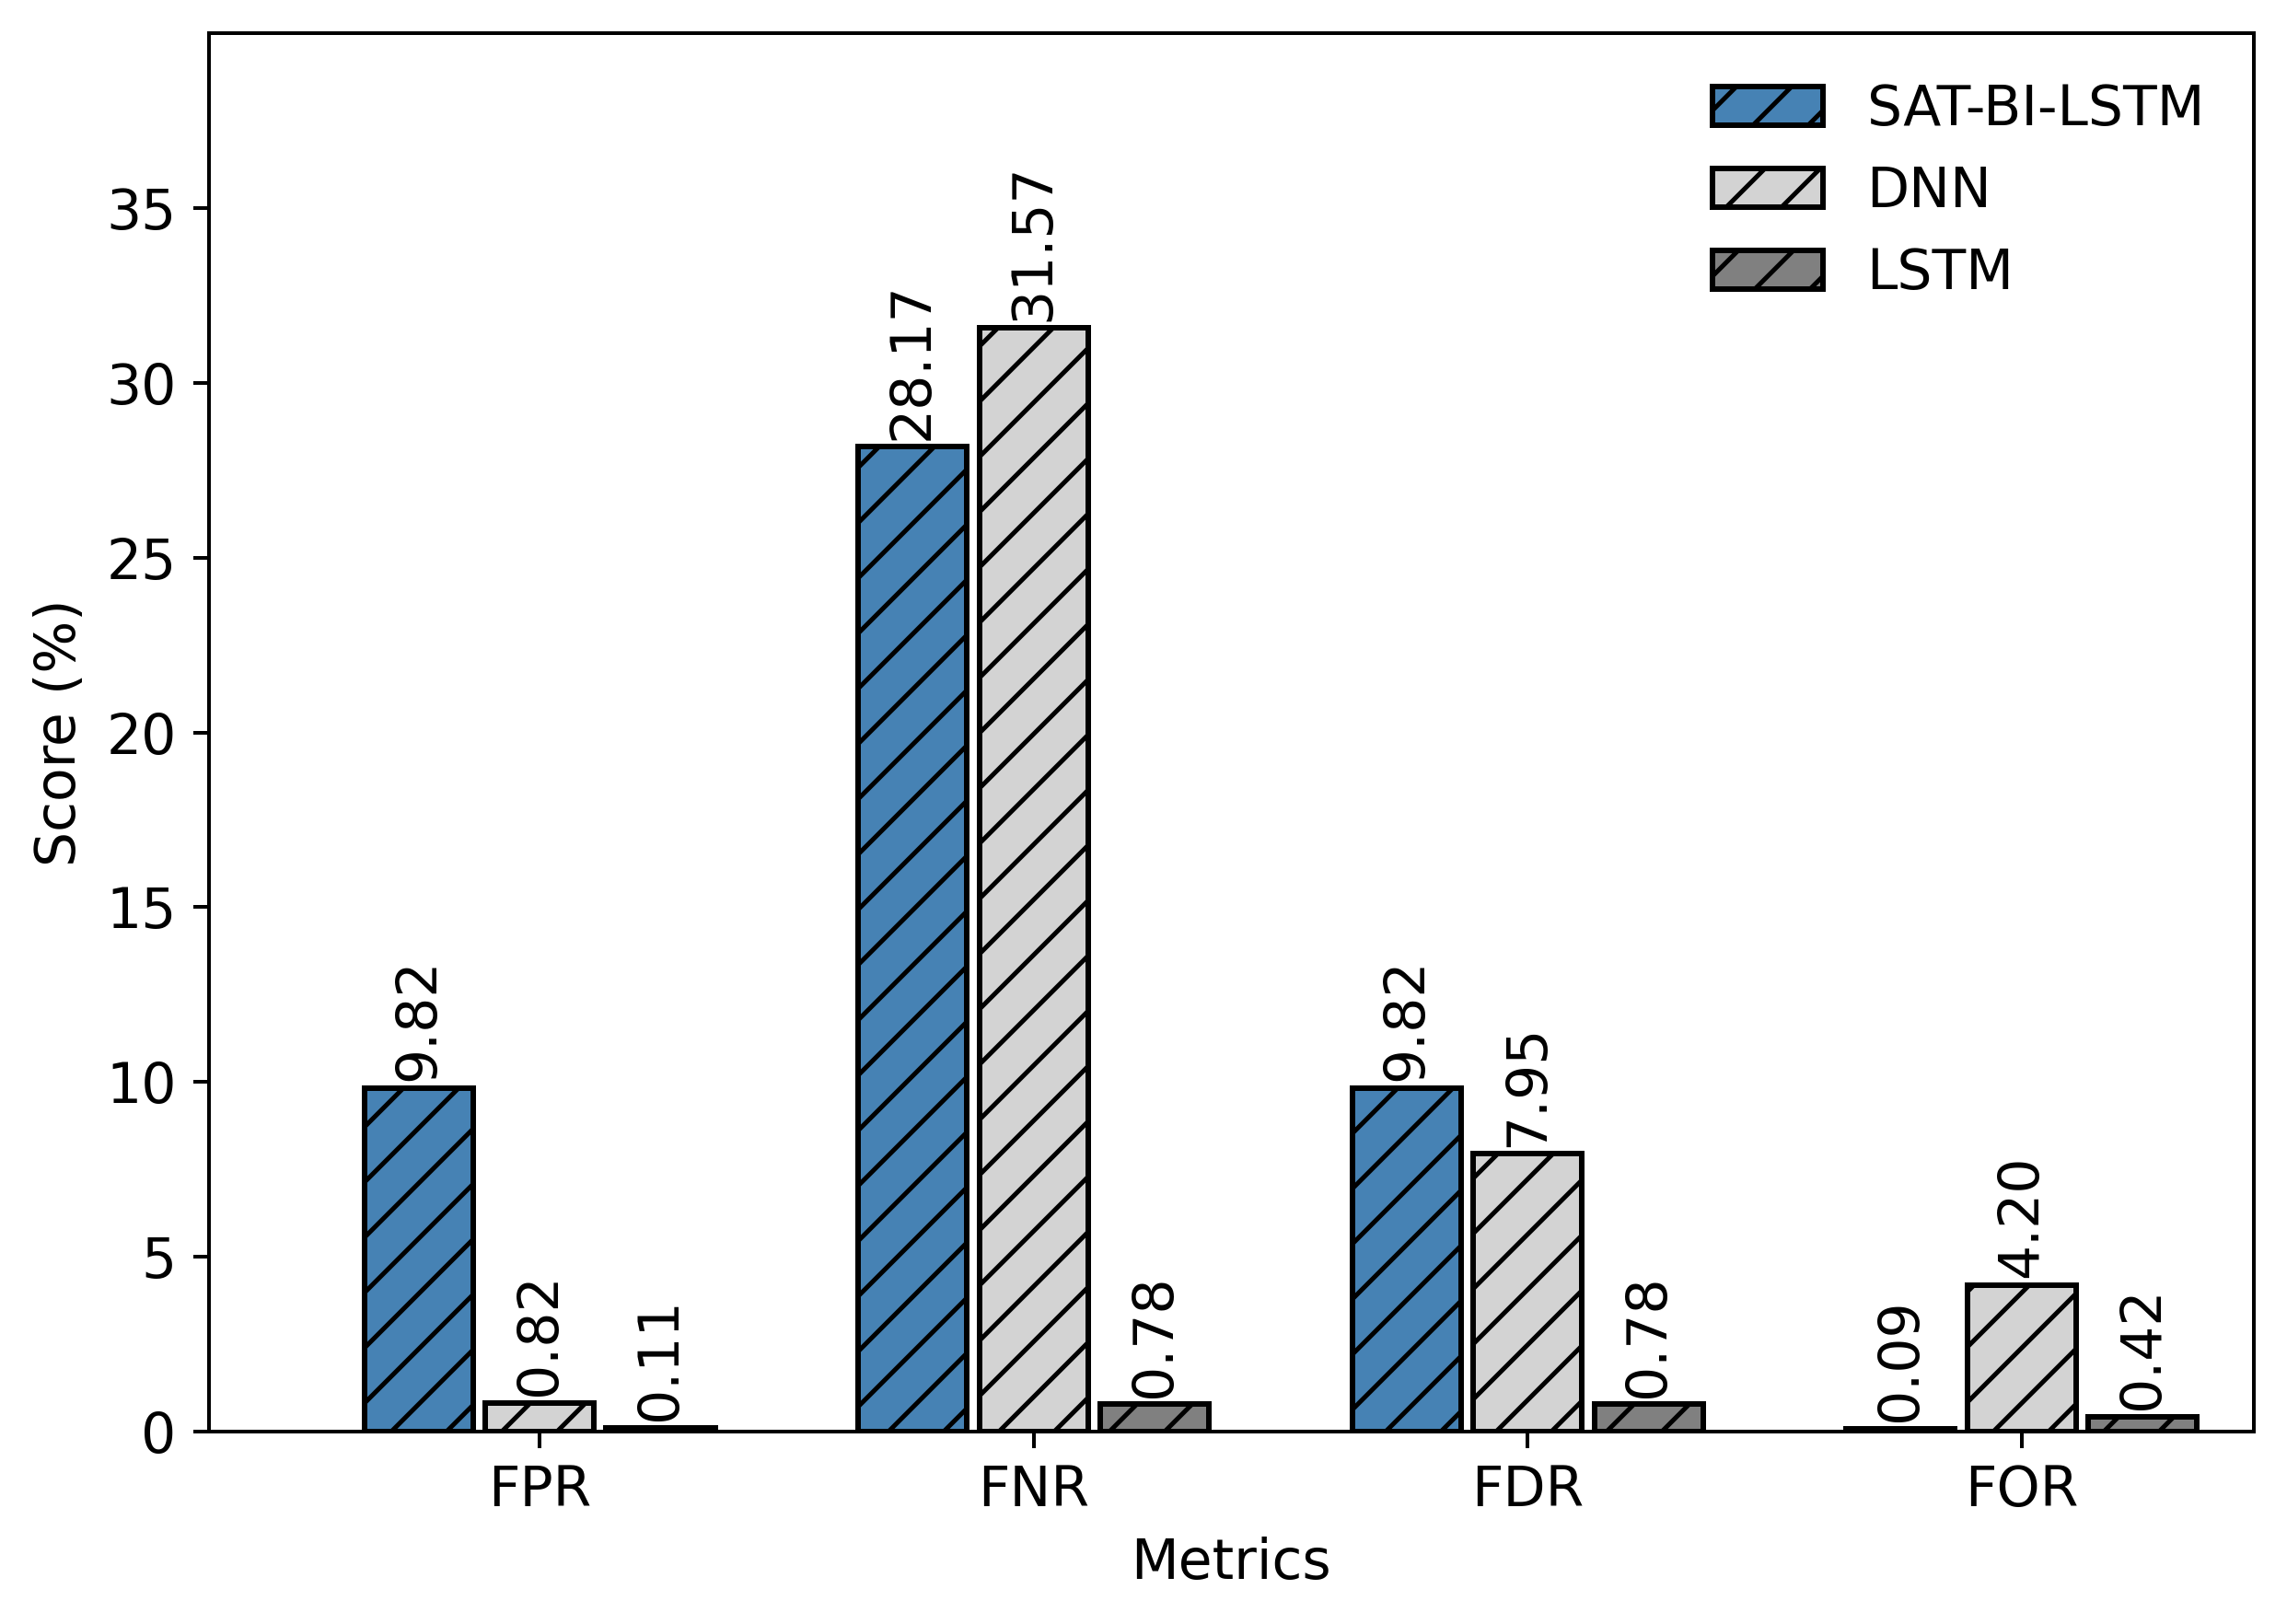

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the metrics (FPR, FNR, FDR, FOR) for each model
metrics = ['FPR', 'FNR', 'FDR', 'FOR']

# Example metric values for the three models
sat_bilstm_values = [0.0982, 0.2817, 0.0982, 0.0009]
dnn_values = [0.0082, 0.3157, 0.0795, 0.042]
lstm_values = [0.0011, 0.0078, 0.0078, 0.0042]

# Convert to percentage
sat_bilstm_values = [i * 100 for i in sat_bilstm_values]
dnn_values = [i * 100 for i in dnn_values]
lstm_values = [i * 100 for i in lstm_values]

# Set the positions for each group of bars
x = np.arange(len(metrics))
bar_width = 0.22

# Plotting
fig, ax = plt.subplots(figsize=(7, 5), dpi=360)

# Position adjustments
positions1 = x - bar_width - 0.05 / 2 + 0.2
positions2 = x + 0.2
positions3 = x + bar_width + 0.05 / 2 + 0.2

# Set the specified vibrant colors
bars1 = ax.bar(positions1, sat_bilstm_values, bar_width, label='SAT-BI-LSTM', color='#4682B4', hatch='//', edgecolor='black', linewidth=1.2)  # Bright Aqua
bars2 = ax.bar(positions2, dnn_values, bar_width, label='DNN', color='#D3D3D3', hatch='//', edgecolor='black', linewidth=1.2)  # Lime Green
bars3 = ax.bar(positions3, lstm_values, bar_width, label='LSTM', color='#808080', hatch='//', edgecolor='black', linewidth=1.2)  # Slate Gray

# Adding values on top of bars
def add_values(bars, offset=0.5):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval + offset, f'{yval:.2f}',
                va='bottom', ha='center', fontsize=12, rotation=90)

add_values(bars1, offset=0.2)
add_values(bars2, offset=0.2)
add_values(bars3, offset=0.2)

# Adding labels
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score (%)', fontsize=12)
ax.set_xticks(x + 0.2)
ax.set_xticklabels(metrics, fontsize=12)

# Set y-axis limits
ax.set_ylim(5, 40)
ax.set_yticks(np.arange(0, 36, 5))
ax.tick_params(axis='y', labelsize=12)

# Adjust x-limits
ax.set_xlim(left=x[0] - bar_width - 0.05 - 0.2, right=x[-1] + bar_width + 0.05 + 0.2 * 2)

# Adjust layout
fig.tight_layout()

# Place legend
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=12, frameon=False)

# Save the plot
save_path = '/content/drive/MyDrive/IDS-Research/Comparison_Plots'
os.makedirs(save_path, exist_ok=True)

save_file = os.path.join(save_path, 'FOR_FNR_FPR_comparision.jpeg')
plt.savefig(save_file, bbox_inches='tight')

print(f"Figure saved at: {save_file}")
plt.show()


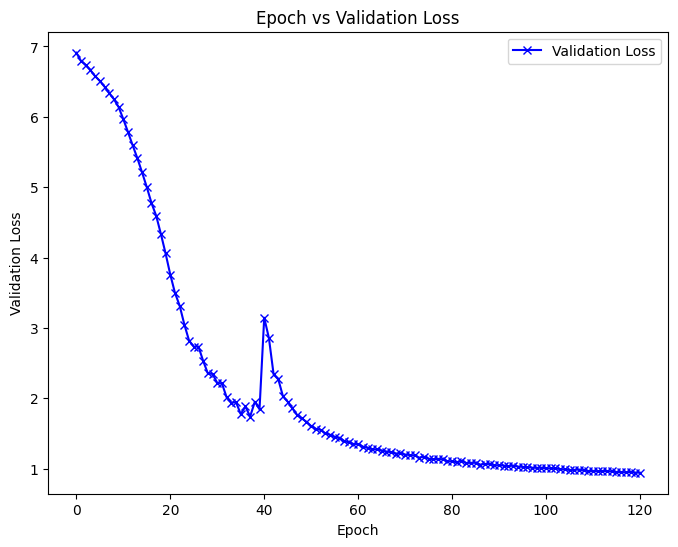

In [ ]:
import matplotlib.pyplot as plt
import os
save_path = '/content/drive/MyDrive/DSP'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Data from your training trace
epochs = list(range(121))
val_loss = [
    6.911358833312988, 6.793478965759277, 6.738299369812012, 6.663385391235352,
    6.577521800994873, 6.509730339050293, 6.429070472717285, 6.336342811584473,
    6.251291275024414, 6.140164852142334, 5.967527389526367, 5.783696174621582,
    5.594353199005127, 5.4114227294921875, 5.20969820022583, 5.001941680908203,
    4.7755351066589355, 4.594841480255127, 4.336503028869629, 4.0597734451293945,
    3.7594079971313477, 3.4985275268554688, 3.3164925575256348, 3.0487046241760254,
    2.8209235668182373, 2.7355587482452393, 2.735807180404663, 2.532163143157959,
    2.355131149291992, 2.346926689147949, 2.219876289367676, 2.2127368450164795,
    2.0143256187438965, 1.9367516040802002, 1.9465110301971436, 1.7758233547210693,
    1.8852620124816895, 1.7409474849700928, 1.9512405395507812, 1.845325231552124,
    3.1457343101501465, 2.856802463531494, 2.341187000274658, 2.27060604095459,
    2.0269927978515625, 1.9524134397506714, 1.8569831848144531, 1.7659544944763184,
    1.71541428565979, 1.6666662693023682, 1.605679988861084, 1.5673506259918213,
    1.5520999431610107, 1.5018736124038696, 1.483980417251587, 1.44761061668396,
    1.4413387775421143, 1.3968302011489868, 1.373232126235962, 1.3525495529174805,
    1.349447250366211, 1.3148785829544067, 1.296523928642273, 1.2783564329147339,
    1.2745076417922974, 1.2587066888809204, 1.2448689937591553, 1.2345227003097534,
    1.2166051864624023, 1.218987226486206, 1.2020100355148315, 1.1942561864852905,
    1.189361810684204, 1.1574978828430176, 1.1718058586120605, 1.142791509628296,
    1.1351430416107178, 1.1401896476745605, 1.1336764097213745, 1.1081469058990479,
    1.1045430898666382, 1.0928617715835571, 1.113408088684082, 1.082181453704834,
    1.083662986755371, 1.0844364166259766, 1.0587650537490845, 1.0681884288787842,
    1.0683130025863647, 1.0493236780166626, 1.0494004487991333, 1.0451688766479492,
    1.0365241765975952, 1.045012354850769, 1.0306998491287231, 1.0262186527252197,
    1.0239650011062622, 1.0149164199829102, 1.012237787246704, 1.014869213104248,
    1.0064876079559326, 1.0059930086135864, 1.0051766633987427, 0.9953469634056091,
    0.990921139717102, 0.9825134873390198, 0.9835724234580994, 0.9884800314903259,
    0.9769432544708252, 0.9679287672042847, 0.9687860012054443, 0.9652795791625977,
    0.9684424996376038, 0.9687911868095398, 0.9611160755157471, 0.954024612903595,
    0.9534533023834229, 0.9500240683555603, 0.9544601440429688, 0.9455667734146118,
    0.9434816241264343
]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(epochs, val_loss, marker='x', color='b')
plt.title('Epoch vs Validation Loss')
plt.legend(['Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.grid(False)
# Save the plot as a high-quality image
plt.savefig(f'{save_path}/epoch_vs_val_loss.png', dpi=300)
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.models import load_model
from tensorflow.python.profiler import profiler_v2 as profiler

# Define paths for saving and loading data
data_save_dir = '/content/drive/MyDrive/IDS-Research/train_test_data_cicddos2019'
log_dir = '/content/drive/MyDrive/IDS-Research/tensorboard_logs'  # Path to save profiler logs
model_checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'

# Load test data
X_test1 = np.load(os.path.join(data_save_dir, 'X_test1.npy'))

# Load the pre-trained model
bigru_attention_model = load_model(model_checkpoint_path)

# Verify the shape of the test data
print(f"Test data shape: {X_test1.shape}")

# Select a single instance of test data for profiling (e.g., the first instance)
single_instance = X_test1[:1]

# Start TensorFlow profiling and specify the log directory
tf.profiler.experimental.start(log_dir)

# Run inference on the single instance
y_pred_probs = bigru_attention_model.predict(single_instance)

# Stop profiling and save the logs
tf.profiler.experimental.stop()

print(f"Profiling completed. Logs saved at: {log_dir}")


Test data shape: (292973, 85, 1)
1/1 [==============================] - 1s 1s/step
Profiling completed. Logs saved at: /content/drive/MyDrive/IDS-Research/tensorboard_logs


In [ ]:
!pip install -U tensorboard-plugin-profile


In [ ]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir /content/drive/MyDrive/IDS-Research/tensorboard_logs


<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.models import load_model
from tensorflow.python.profiler import profiler_v2 as profiler

# Define paths for saving and loading data
data_save_dir = '/content/drive/MyDrive/IDS-Research/train_test_data_cicddos2019'
log_dir = '/content/drive/MyDrive/IDS-Research/tensorboard_logs'  # Path to save profiler logs
model_checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'

# Load test data
X_test1 = np.load(os.path.join(data_save_dir, 'X_test1.npy'))

# Load the pre-trained model
bigru_attention_model = load_model(model_checkpoint_path)

# Verify the shape of the test data
print(f"Test data shape: {X_test1.shape}")

# Select a single instance of test data for profiling (e.g., the first instance)
single_instance = X_test1[:1]

# Start TensorFlow profiling and specify the log directory
tf.profiler.experimental.start(log_dir)

# Run inference on the single instance
y_pred_probs = bigru_attention_model.predict(single_instance)

# Stop profiling and save the logs
tf.profiler.experimental.stop()

print(f"Profiling completed. Logs saved at: {log_dir}")

# Install TensorBoard Plugin
!pip install -U tensorboard-plugin-profile

# Load TensorBoard Extension
%load_ext tensorboard

# Start TensorBoard
%tensorboard --logdir /content/drive/MyDrive/IDS-Research/tensorboard_logs


Test data shape: (292973, 85, 1)
1/1 [==============================] - 1s 983ms/step
Profiling completed. Logs saved at: /content/drive/MyDrive/IDS-Research/tensorboard_logs
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 131172), started 0:00:51 ago. (Use '!kill 131172' to kill it.)

<IPython.core.display.Javascript object>

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/IDS-Research/tensorboard_logs

Reusing TensorBoard on port 6007 (pid 131172), started 0:03:59 ago. (Use '!kill 131172' to kill it.)

<IPython.core.display.Javascript object>

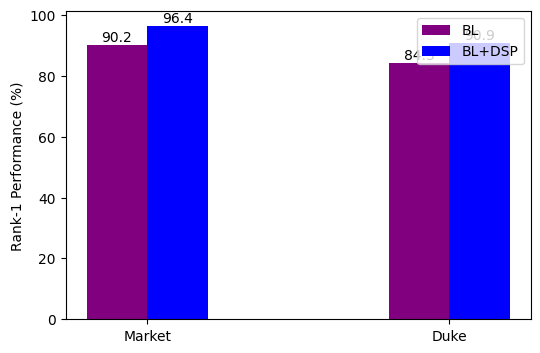

Plot saved to /content/drive/MyDrive/DSP/concise_performance_plot_default.png


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Create the directory if it doesn't exist
save_dir = '/content/drive/MyDrive/DSP'
os.makedirs(save_dir, exist_ok=True)

# Data
datasets = ['Market', 'Duke']
scenarios = ['BL', 'BL+DSP']

# Performance values
bl_values = [90.2, 84.3]  # BL values for Market and Duke
bl_dsp_values = [96.4, 90.9]  # BL+DSP values for Market and Duke

# Bar graph settings
width = 0.2  # Default bar width

# X positions for the groups
x = np.arange(len(datasets))

# Create subplots with a compact size
fig, ax = plt.subplots(figsize=(6, 4))

# Plot bars for BL and BL+DSP
bars_bl = ax.bar(x - width / 2, bl_values, width, label='BL', color='purple')
bars_bl_dsp = ax.bar(x + width / 2, bl_dsp_values, width, label='BL+DSP', color='blue')

# Set labels and ticks
ax.set_ylabel('Rank-1 Performance (%)', fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(datasets, fontsize=10)
ax.legend(loc='upper right', fontsize=10)

# Add values on top of bars
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=10)

add_values(bars_bl)
add_values(bars_bl_dsp)

# Save the plot
save_path = os.path.join(save_dir, 'concise_performance_plot_default.png')
plt.savefig(save_path, bbox_inches='tight')

# Show plot
plt.show()

print(f"Plot saved to {save_path}")


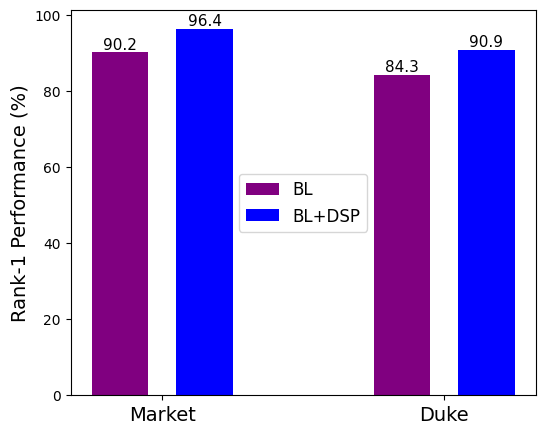

Plot saved to /content/drive/MyDrive/DSP/Duke_Maeket_Rank1_performance.png


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Create the directory if it doesn't exist
save_dir = '/content/drive/MyDrive/DSP'
os.makedirs(save_dir, exist_ok=True)

# Data
datasets = ['Market', 'Duke']
scenarios = ['BL', 'BL+DSP']

# Performance values
bl_values = [90.2, 84.3]  # BL values for Market and Duke
bl_dsp_values = [96.4, 90.9]  # BL+DSP values for Market and Duke

# Bar graph settings
width = 0.2  # Width of the bars
x = np.array([0, 1])  # X positions for Market and Duke

# Create subplots with a compact size
fig, ax = plt.subplots(figsize=(6, 5))

# Plot bars for BL and BL+DSP
bars_bl = ax.bar(x - width / 2 - 0.05, bl_values, width, label='BL', color='purple')
bars_bl_dsp = ax.bar(x + width / 2 + 0.05, bl_dsp_values, width, label='BL+DSP', color='blue')

# Set labels and ticks
ax.set_ylabel('Rank-1 Performance (%)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(datasets, fontsize =14)

# Move the legend inside the plot, centered
ax.legend(loc='center', fontsize=12)

# Add values on top of bars
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=11)

add_values(bars_bl)
add_values(bars_bl_dsp)

# Save the plot
save_path = os.path.join(save_dir, 'Duke_Maeket_Rank1_performance.png')
plt.savefig(save_path, bbox_inches='tight')

# Show plot
plt.show()

print(f"Plot saved to {save_path}")


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support

# Ensure directory for plots exists
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the pre-trained BiGRU model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/BiGRU_Attention_0725.h5'
bigru_attention_model = load_model(checkpoint_path)

# Load the test data
# X_test1 = np.load('/content/drive/MyDrive/IDS-Research/CICDDOS2019_TestSet/X_test.npy')
# Y_test = np.load('/content/drive/MyDrive/IDS-Research/CICDDOS2019_TestSet/y_test.npy')

# Make predictions
y_pred_probs = bigru_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Use class numbers if class names are not available
if Y_test.dtype == np.int64 or Y_test.dtype == np.int32:
    class_names = [str(i) for i in np.unique(Y_test)]
else:
    class_names = np.unique(Y_test)

# Classification report
class_report = classification_report(Y_test, y_pred, target_names=class_names)
print("Classification Report:")
print(class_report)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Calculate FP, FN, TP, and TN from the confusion matrix
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)

# Compute overall FNR, FDR, FOR, and FPR
overall_fnr = np.sum(FN) / (np.sum(FN) + np.sum(TP) + 1e-10)  # False Negative Rate
overall_fdr = np.sum(FP) / (np.sum(FP) + np.sum(TP) + 1e-10)  # False Discovery Rate
overall_for = np.sum(FN) / (np.sum(FN) + np.sum(TN) + 1e-10)  # False Omission Rate
overall_fpr = np.sum(FP) / (np.sum(FP) + np.sum(TN) + 1e-10)  # False Positive Rate

# Compute overall precision, recall, F1-score using macro-averaging
overall_precision, overall_recall, overall_f1, _ = precision_recall_fscore_support(Y_test, y_pred, average='macro')

# Print overall performance metrics
print("\nOverall Performance Metrics:")
print(f"Accuracy: {np.sum(TP) / (np.sum(TP) + np.sum(FP) + np.sum(FN) + np.sum(TN)):.4f}")
print(f"Precision: {overall_precision:.4f}")
print(f"Recall: {overall_recall:.4f}")
print(f"F1-score: {overall_f1:.4f}")
print(f"FPR (False Positive Rate): {overall_fpr:.4f}")
print(f"FNR (False Negative Rate): {overall_fnr:.4f}")
print(f"FDR (False Discovery Rate): {overall_fdr:.4f}")
print(f"FOR (False Omission Rate): {overall_for:.4f}")

# Evaluate the model on the test data
test_loss, test_accuracy = bigru_attention_model.evaluate(X_test1, Y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


9156/9156 [==============================] - 731s 80ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2184
           1       0.98      1.00      0.99      1963
           2       1.00      1.00      1.00     39342
           3       1.00      1.00      1.00     72494
           4       1.00      1.00      1.00     35332
           5       1.00      1.00      1.00     86186
           6       1.00      1.00      1.00     55090
           7       0.92      0.92      0.92       382

    accuracy                           1.00    292973
   macro avg       0.99      0.99      0.99    292973
weighted avg       1.00      1.00      1.00    292973


Overall Performance Metrics:
Accuracy: 0.1249
Precision: 0.9872
Recall: 0.9899
F1-score: 0.9886
FPR (False Positive Rate): 0.0001
FNR (False Negative Rate): 0.0006
FDR (False Discovery Rate): 0.0006
FOR (False Omission Rate): 0.0001
9156/9156 [=====================

In [ ]:
### DNN metrics FOR FDR ...
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score, matthews_corrcoef

# Load the model
model_load_path = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_DNN0812.h5'
dnn_model = load_model(model_load_path)
print(f'Model loaded from {model_load_path}')

# Load the test data
# X_test1 = np.load('/content/drive/MyDrive/IDS-Research/CICDDOS2019_TestSet/X_test.npy')
# Y_test = np.load('/content/drive/MyDrive/IDS-Research/CICDDOS2019_TestSet/y_test.npy')

# Make predictions
y_pred_probs = dnn_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Use class numbers if class names are not available
if Y_test.dtype == np.int64 or Y_test.dtype == np.int32:
    class_names = [str(i) for i in np.unique(Y_test)]
else:
    class_names = np.unique(Y_test)

# Classification report
class_report = classification_report(Y_test, y_pred, target_names=class_names)
print("Classification Report:")
print(class_report)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Calculate FP, FN, TP, and TN from the confusion matrix
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)

# Calculate additional performance metrics
overall_fnr = np.sum(FN) / (np.sum(FN) + np.sum(TP) + 1e-10)  # False Negative Rate
overall_fdr = np.sum(FP) / (np.sum(FP) + np.sum(TP) + 1e-10)  # False Discovery Rate
overall_for = np.sum(FN) / (np.sum(FN) + np.sum(TN) + 1e-10)  # False Omission Rate
overall_fpr = np.sum(FP) / (np.sum(FP) + np.sum(TN) + 1e-10)  # False Positive Rate

# Compute accuracy, precision, recall, F1-score, and MCC
test_accuracy = accuracy_score(Y_test, y_pred)
precision, recall, fscore, _ = precision_recall_fscore_support(Y_test, y_pred, average='macro')
mcc = matthews_corrcoef(Y_test, y_pred)

# Print overall performance metrics
print("\nOverall Performance Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {fscore:.4f}")
print(f"MCC (Matthews Correlation Coefficient): {mcc:.4f}")
print(f"FPR (False Positive Rate): {overall_fpr:.4f}")
print(f"FNR (False Negative Rate): {overall_fnr:.4f}")
print(f"FDR (False Discovery Rate): {overall_fdr:.4f}")
print(f"FOR (False Omission Rate): {overall_for:.4f}")

# Evaluate the model on the test set
test_loss, test_accuracy_detailed = dnn_model.evaluate(X_test1, Y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy (from evaluate method): {test_accuracy_detailed:.4f}')


Model loaded from /content/drive/MyDrive/IDS-Research/CICDDOS2019_DNN0812.h5
9156/9156 [==============================] - 16s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2184
           1       0.97      1.00      0.98      1963
           2       1.00      1.00      1.00     39342
           3       1.00      1.00      1.00     72494
           4       1.00      0.99      0.99     35332
           5       1.00      1.00      1.00     86186
           6       1.00      1.00      1.00     55090
           7       0.64      0.33      0.44       382

    accuracy                           1.00    292973
   macro avg       0.95      0.91      0.93    292973
weighted avg       1.00      1.00      1.00    292973


Overall Performance Metrics:
Accuracy: 0.9968
Precision: 0.9495
Recall: 0.9139
F1-score: 0.9254
MCC (Matthews Correlation Coefficient): 0.9960
FPR (False Positive Rate): 0.0005
FNR (False Ne

In [ ]:
### over all performance LSTM 2019 november
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score, matthews_corrcoef

# Load the model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/LSTM_08_08.h5'
lstm_attention_model = load_model(checkpoint_path)
print("Model loaded successfully.")

# Load test data
# X_test1 = np.load('/content/drive/MyDrive/IDS-Research/CICIoT2023_TestSet/X_test.npy')
# Y_test = np.load('/content/drive/MyDrive/IDS-Research/CICIoT2023_TestSet/y_test.npy')

# Make predictions
y_pred_probs = lstm_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Determine class names if not available
if Y_test.dtype == np.int64 or Y_test.dtype == np.int32:
    class_names = [str(i) for i in np.unique(Y_test)]
else:
    class_names = np.unique(Y_test)

# Generate a classification report
class_report = classification_report(Y_test, y_pred, target_names=class_names)
print("Classification Report:")
print(class_report)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Calculate FP, FN, TP, and TN for each class
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  # False positives per class
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)  # False negatives per class
TP = np.diag(conf_matrix)                            # True positives per class
TN = conf_matrix.sum() - (FP + FN + TP)              # True negatives per class

# Compute overall metrics
overall_fnr = np.sum(FN) / (np.sum(FN) + np.sum(TP) + 1e-10)  # False Negative Rate
overall_fdr = np.sum(FP) / (np.sum(FP) + np.sum(TP) + 1e-10)  # False Discovery Rate
overall_for = np.sum(FN) / (np.sum(FN) + np.sum(TN) + 1e-10)  # False Omission Rate
overall_fpr = np.sum(FP) / (np.sum(FP) + np.sum(TN) + 1e-10)  # False Positive Rate

# Macro-averaged metrics
overall_accuracy = accuracy_score(Y_test, y_pred)
precision, recall, fscore, _ = precision_recall_fscore_support(Y_test, y_pred, average='macro')
mcc = matthews_corrcoef(Y_test, y_pred)

# Print overall performance metrics
print("\nOverall Performance Metrics:")
print(f"Accuracy: {overall_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {fscore:.4f}")
print(f"MCC (Matthews Correlation Coefficient): {mcc:.4f}")
print(f"FPR (False Positive Rate): {overall_fpr:.4f}")
print(f"FNR (False Negative Rate): {overall_fnr:.4f}")
print(f"FDR (False Discovery Rate): {overall_fdr:.4f}")
print(f"FOR (False Omission Rate): {overall_for:.4f}")

# Evaluate model on test set (optional, but may help cross-verify accuracy)
test_loss, test_accuracy_detailed = lstm_attention_model.evaluate(X_test1, Y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy (from evaluate method): {test_accuracy_detailed:.4f}')


Model loaded successfully.
9156/9156 [==============================] - 1097s 120ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2184
           1       0.94      1.00      0.97      1963
           2       1.00      0.99      1.00     39342
           3       0.95      1.00      0.97     72494
           4       0.99      0.89      0.94     35332
           5       1.00      1.00      1.00     86186
           6       1.00      0.99      0.99     55090
           7       0.39      0.91      0.54       382

    accuracy                           0.98    292973
   macro avg       0.90      0.97      0.92    292973
weighted avg       0.98      0.98      0.98    292973


Overall Performance Metrics:
Accuracy: 0.9826
Precision: 0.9041
Recall: 0.9716
F1-score: 0.9244
MCC (Matthews Correlation Coefficient): 0.9780
FPR (False Positive Rate): 0.0025
FNR (False Negative Rate): 0.0174
FDR (False Discovery Rate

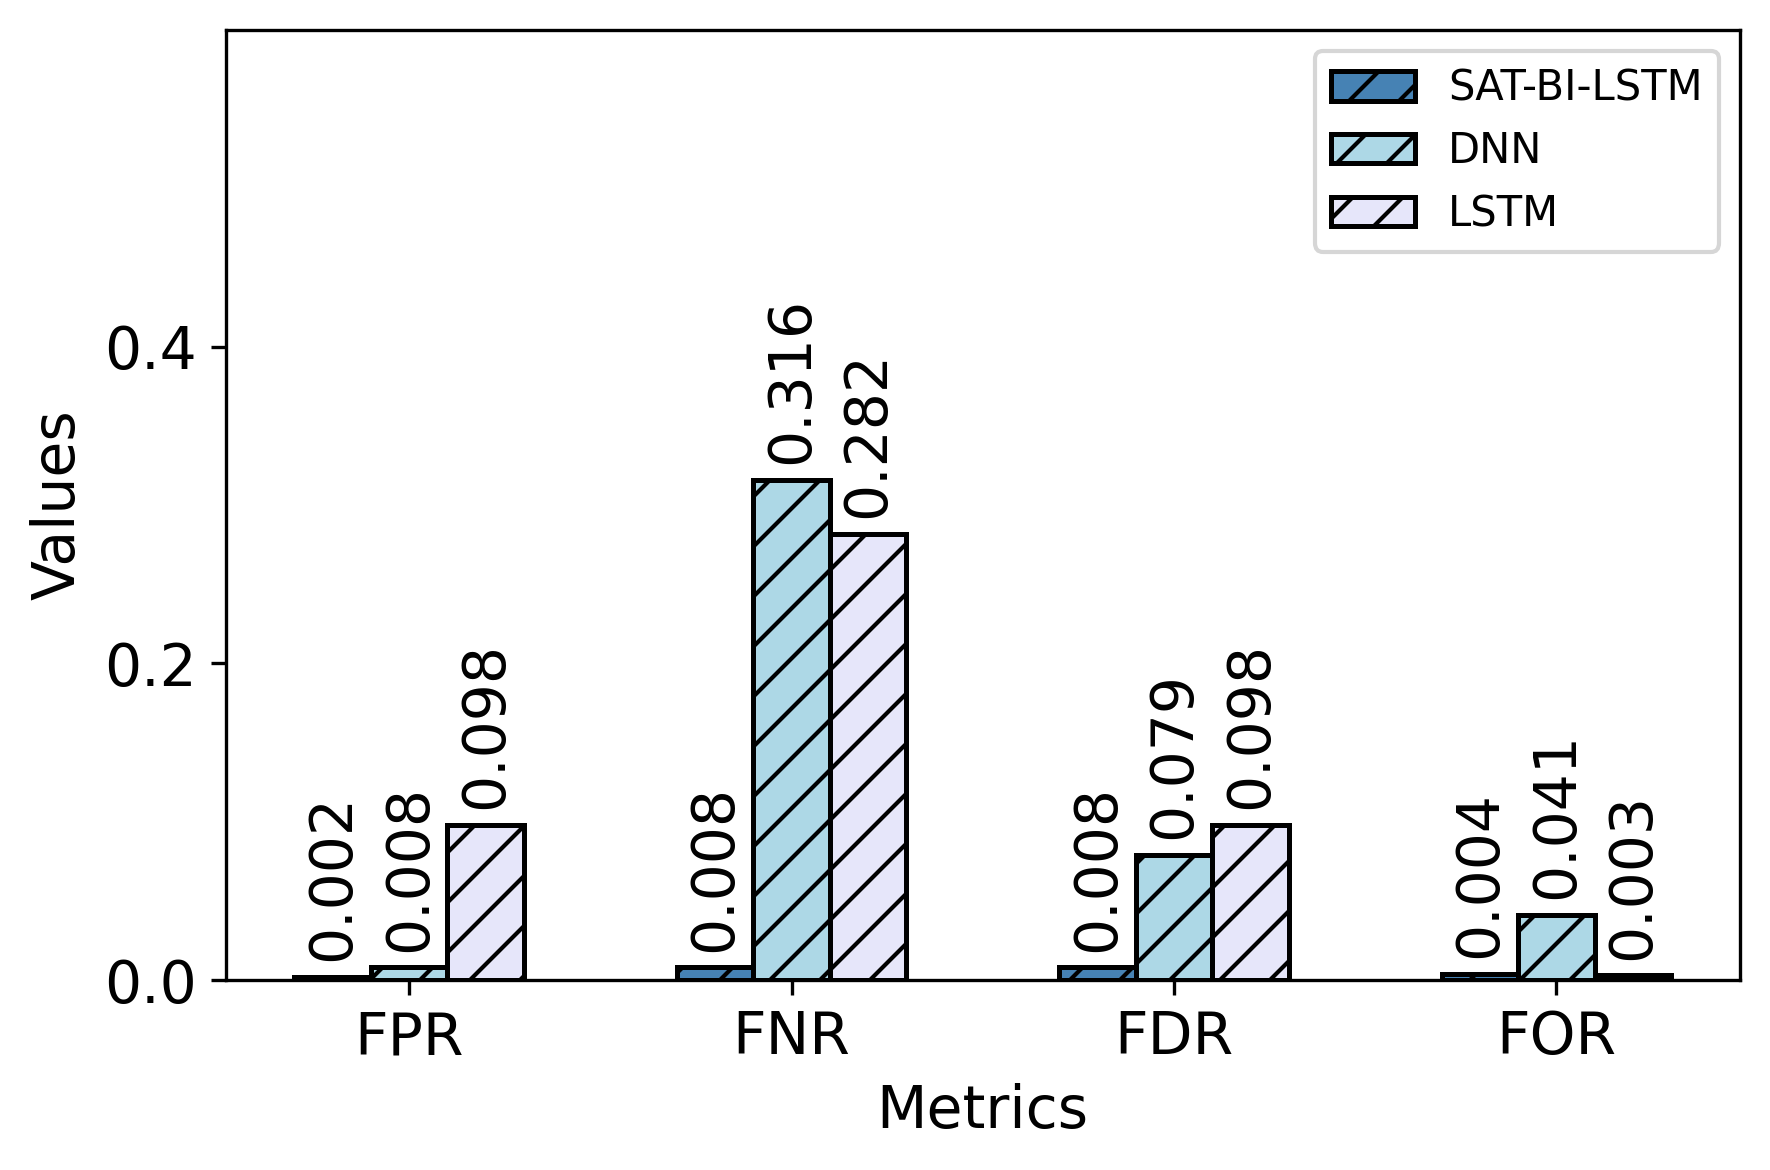

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Define metrics
metrics = ['FPR', 'FNR', 'FDR', 'FOR']

# Metric values for each model
lstm_values = [0.098, 0.282, 0.098, 0.003]
dnn_values = [0.008, 0.316, 0.079, 0.041]
sat_bilstm_values = [0.002, 0.008, 0.008, 0.004]

# Set positions for each group of bars
bar_width = 0.2
index = np.arange(len(metrics))

# Set plot size and DPI for higher quality
plt.figure(figsize=(6.0, 4.0), dpi=300)

# Plot bars with customized colors, hatches, and edges
bars1 = plt.bar(index, sat_bilstm_values, bar_width, label='SAT-BI-LSTM',
                color='#4682B4', hatch='//', edgecolor='black', linewidth=1.2)
bars2 = plt.bar(index + bar_width, dnn_values, bar_width, label='DNN',
                color='#ADD8E6', hatch='//', edgecolor='black', linewidth=1.2)
bars3 = plt.bar(index + 2 * bar_width, lstm_values, bar_width, label='LSTM',
                color='#E6E6FA', hatch='//', edgecolor='black', linewidth=1.2)
size = 14
# Set axis labels with increased font size
plt.xlabel('Metrics', fontsize=size)
plt.ylabel('Values', fontsize=size)
plt.xticks(index + bar_width, metrics, fontsize=size)
plt.yticks(fontsize=size)
plt.legend(fontsize=10)

# Annotate bar values with a bold font and rotated vertically
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}',
                 ha='center', va='bottom', fontsize=size, rotation=90)

# Set y-axis limit for some space above the highest bar
# plt.ylim(0, max(sat_bilstm_values + dnn_values + lstm_values) + 0.1)
plt.ylim(0, 0.5 + 0.1)
plt.yticks(np.arange(0, 0.46, 0.20), fontsize=size)
# Save the plot with tight layout
save_dir = '/content/drive/MyDrive/IDS-Research/CICIoT2023_cicddos2019'
os.makedirs(save_dir, exist_ok=True)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'FOR_FNR_FPR_comparison_1106_CICIoT2023.jpeg'), dpi=300, bbox_inches='tight')
plt.show()


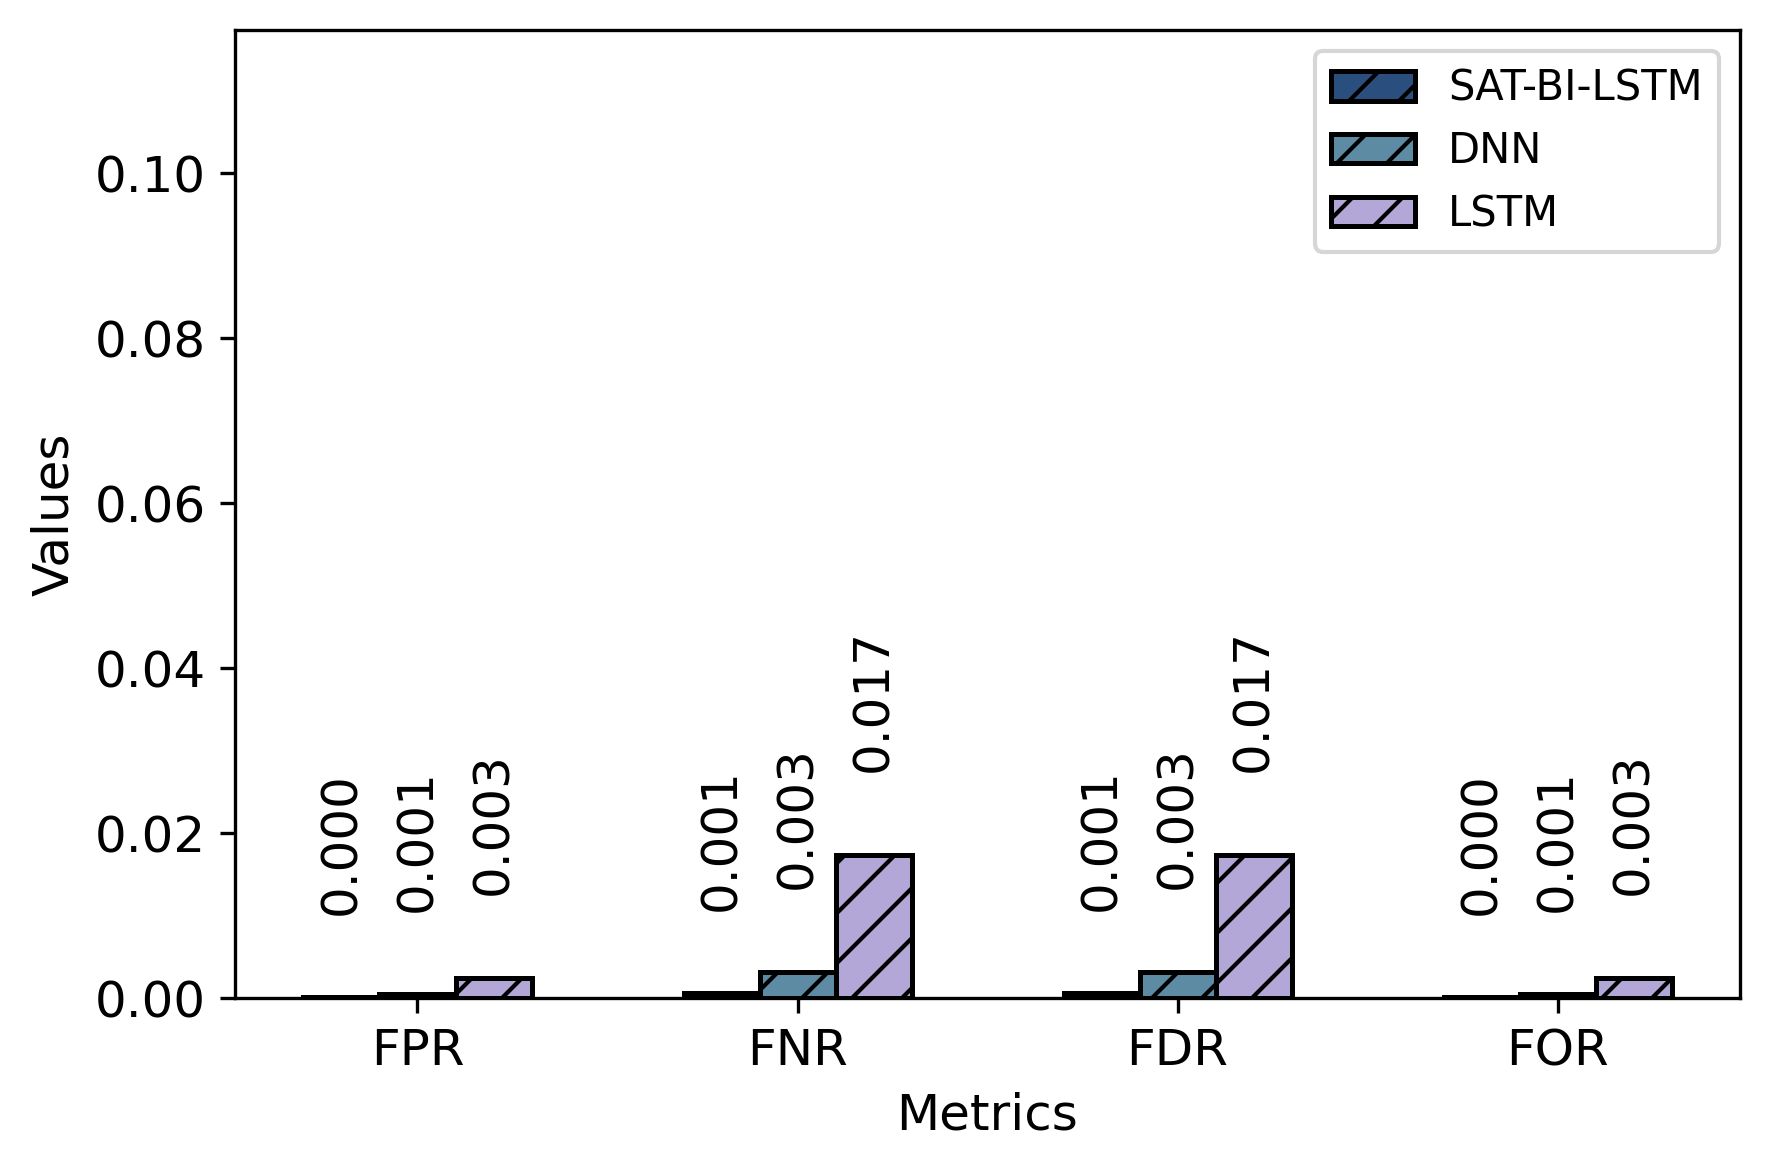

In [ ]:
### Nove cicddo2019 overall performance
import matplotlib.pyplot as plt
import numpy as np
import os

# Define metrics
metrics = ['FPR', 'FNR', 'FDR', 'FOR']

# Metric values for each model
# lstm_values = [0.098, 0.282, 0.098, 0.003]
# dnn_values = [0.008, 0.316, 0.079, 0.041]
# sat_bilstm_values = [0.002, 0.008, 0.008, 0.004]
#####################
## lstm
# FPR (False Positive Rate): 0.0025
# FNR (False Negative Rate): 0.0174
# FDR (False Discovery Rate): 0.0174
# FOR (False Omission Rate): 0.0025
# DNN
# FPR (False Positive Rate): 0.0005
# FNR (False Negative Rate): 0.0032
# FDR (False Discovery Rate): 0.0032
# FOR (False Omission Rate): 0.0005
# sat_bi_biru
# FPR (False Positive Rate): 0.0001
# FNR (False Negative Rate): 0.0006
# FDR (False Discovery Rate): 0.0006
# FOR (False Omission Rate): 0.0001


##################################################
lstm_values = [0.0025,0.0174,0.0174,0.0025]
dnn_values = [0.0005,0.0032,0.0032,0.0005]
sat_bilstm_values =[0.0001,0.0006,0.0006,0.0001]
###################################################

# Set positions for each group of bars
bar_width = 0.2
index = np.arange(len(metrics))

# Set plot size and DPI for higher quality
plt.figure(figsize=(6.0, 4.0), dpi=300)

# Plot bars with customized colors, hatches, and edges
# Define the updated colors for deeper shades
bars1 = plt.bar(index, sat_bilstm_values, bar_width, label='SAT-BI-LSTM',
                color='#2A4E7E', hatch='//', edgecolor='black', linewidth=1.2)  # Darker Blue
bars2 = plt.bar(index + bar_width, dnn_values, bar_width, label='DNN',
                color='#5C8BA3', hatch='//', edgecolor='black', linewidth=1.2)  # Darker Cyan
bars3 = plt.bar(index + 2 * bar_width, lstm_values, bar_width, label='LSTM',
                color='#B3A7D8', hatch='//', edgecolor='black', linewidth=1.2)  # Darker Lavender

size = 12
# Set axis labels with increased font size
plt.xlabel('Metrics', fontsize=size)
plt.ylabel('Values', fontsize=size)
plt.xticks(index + bar_width, metrics, fontsize=size)
plt.yticks(fontsize=size)
plt.legend(fontsize=10)

# Annotate bar values with a bold font and rotated vertically
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}',
                 ha='center', va='bottom', fontsize=size, rotation=90)

# Set y-axis limit for some space above the highest bar
plt.ylim(0, 0.4)
plt.ylim(0, max(sat_bilstm_values + dnn_values + lstm_values) + 0.1)

# Save the plot with tight layout
save_dir = '/content/drive/MyDrive/IDS-Research/CICIoT2023_cicddos2019'
os.makedirs(save_dir, exist_ok=True)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'FOR_FNR_FPR_comparison_1106_cicddos2019.jpeg'), dpi=300, bbox_inches='tight')
plt.show()


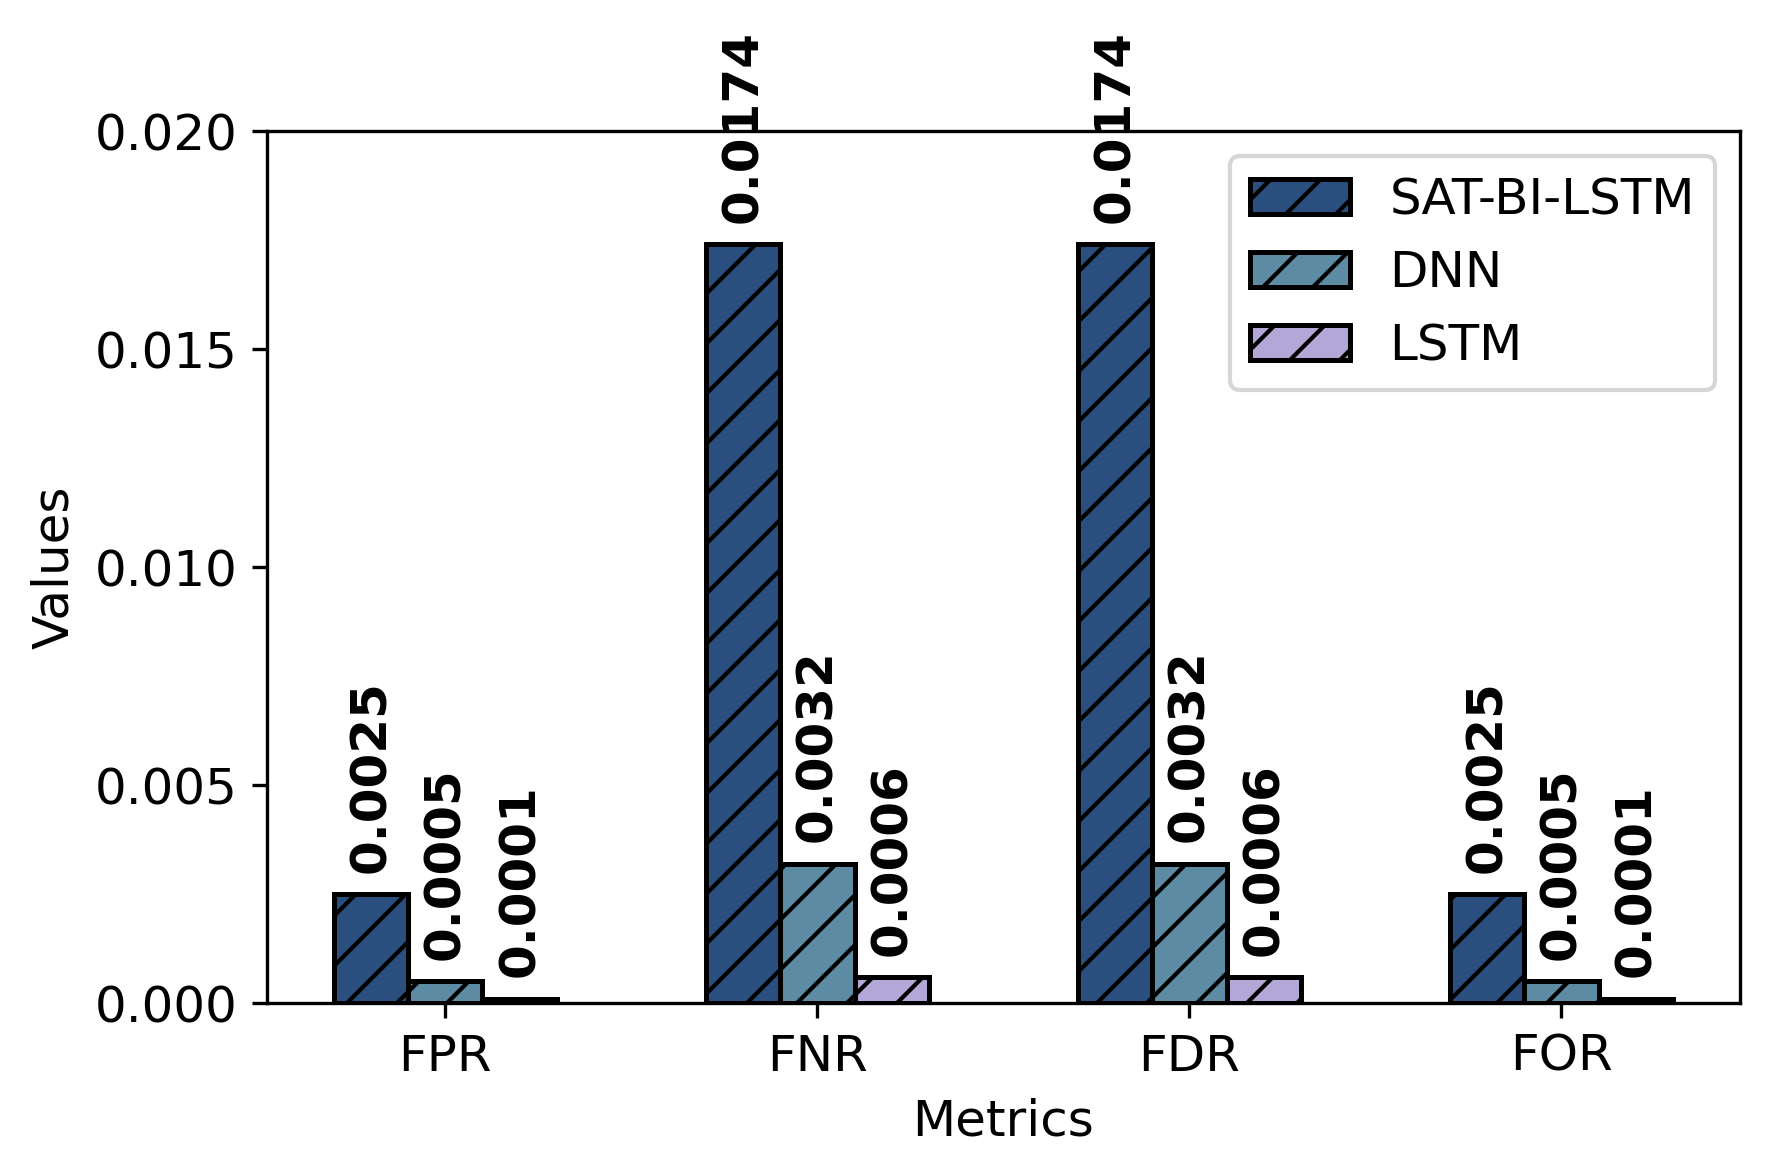

In [ ]:
#### ### cicddo2019 -2 overall performance
import matplotlib.pyplot as plt
import numpy as np
import os

# Define metrics and metric values
metrics = ['FPR', 'FNR', 'FDR', 'FOR']
lstm_values = [0.0001, 0.0006, 0.0006, 0.0001]
dnn_values = [0.0005, 0.0032, 0.0032, 0.0005]
sat_bilstm_values = [0.0025, 0.0174, 0.0174, 0.0025]

# Set positions for each group of bars
bar_width = 0.2
index = np.arange(len(metrics))

# Set plot size and DPI for higher quality
plt.figure(figsize=(6.0, 4.0), dpi=300)

# Plot bars with customized colors, hatches, and edges
bars1 = plt.bar(index, sat_bilstm_values, bar_width, label='SAT-BI-LSTM',
                color='#2A4E7E', hatch='//', edgecolor='black', linewidth=1.2)  # Darker Blue
bars2 = plt.bar(index + bar_width, dnn_values, bar_width, label='DNN',
                color='#5C8BA3', hatch='//', edgecolor='black', linewidth=1.2)  # Darker Cyan
bars3 = plt.bar(index + 2 * bar_width, lstm_values, bar_width, label='LSTM',
                color='#B3A7D8', hatch='//', edgecolor='black', linewidth=1.2)  # Darker Lavender

size = 12
# Set axis labels with increased font size
plt.xlabel('Metrics', fontsize=size)
plt.ylabel('Values', fontsize=size)
plt.xticks(index + bar_width, metrics, fontsize=size)
plt.yticks(fontsize=size)

# Customize y-axis ticks and limits to focus on the range of your data
plt.ylim(0, 0.02)  # Limit y-axis to better fit the range of values
plt.yticks(np.arange(0, 0.021, 0.005), fontsize=size)  # Set y-tick steps to show more granularity
plt.legend(fontsize=size)

# Annotate bar values with a bold font and rotated vertically
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0005, f'{yval:.4f}',  # Increase precision to 4 decimals
                 ha='center', va='bottom', fontsize=size, rotation=90, fontweight='bold')

# Save the plot with tight layout
save_dir = '/content/drive/MyDrive/IDS-Research/CICIoT2023_cicddos2019'
os.makedirs(save_dir, exist_ok=True)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'FOR_FNR_FPR_comparison_1106_cicddos2019.jpeg'), dpi=300, bbox_inches='tight')
plt.show()


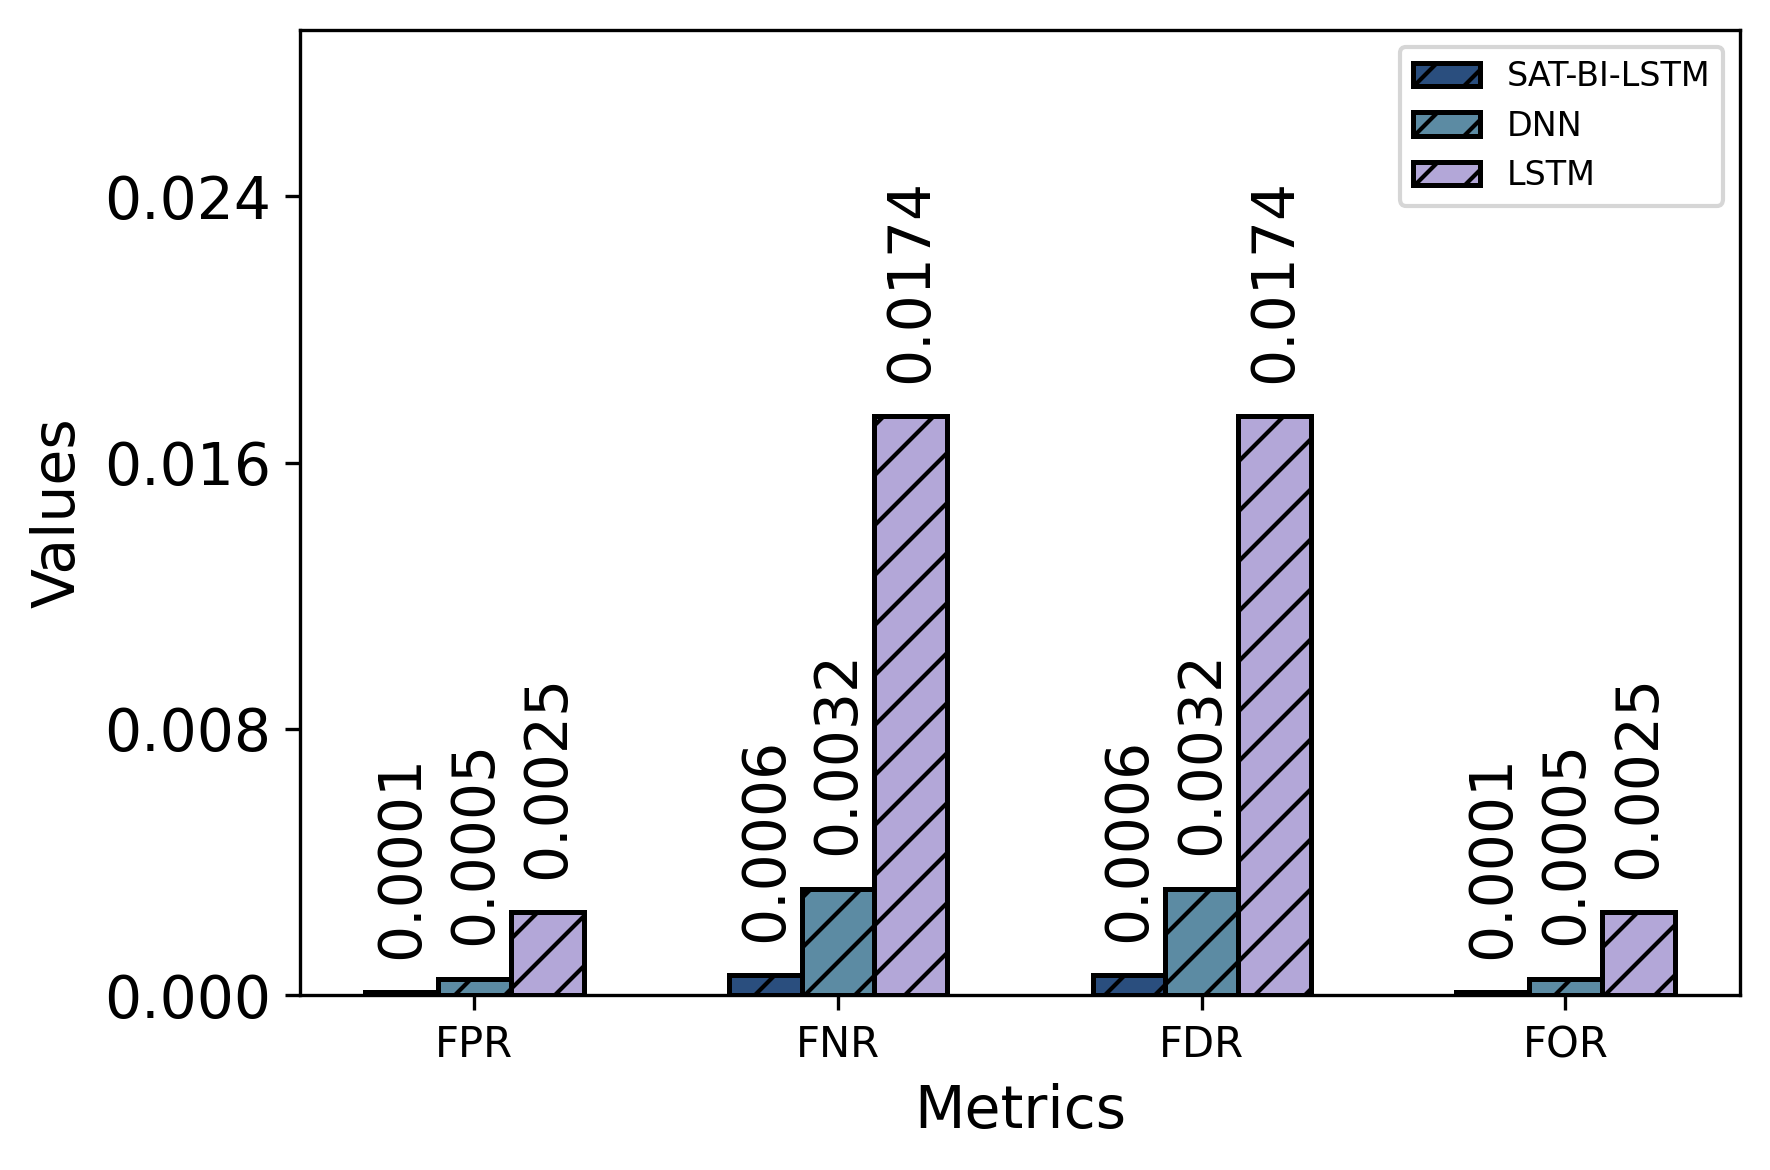

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Define metrics
metrics = ['FPR', 'FNR', 'FDR', 'FOR']

# Metric values for each model
lstm_values = [0.0025, 0.0174, 0.0174, 0.0025]
dnn_values = [0.0005, 0.0032, 0.0032, 0.0005]
sat_bilstm_values = [0.0001, 0.0006, 0.0006, 0.0001]

# Set positions for each group of bars
bar_width = 0.2
index = np.arange(len(metrics))

# Set plot size and DPI for higher quality
plt.figure(figsize=(6.0, 4.0), dpi=300)  # Increased figure size

# Plot bars with customized colors, hatches, and edges
bars1 = plt.bar(index, sat_bilstm_values, bar_width, label='SAT-BI-LSTM',
                color='#2A4E7E', hatch='//', edgecolor='black', linewidth=1.2)  # Darker Blue
bars2 = plt.bar(index + bar_width, dnn_values, bar_width, label='DNN',
                color='#5C8BA3', hatch='//', edgecolor='black', linewidth=1.2)  # Darker Cyan
bars3 = plt.bar(index + 2 * bar_width, lstm_values, bar_width, label='LSTM',
                color='#B3A7D8', hatch='//', edgecolor='black', linewidth=1.2)  # Darker Lavender

# Font size for labels and ticks
size = 14
plt.xlabel('Metrics', fontsize=size)
plt.ylabel('Values', fontsize=size)
plt.xticks(index + bar_width, metrics, fontsize=10)
plt.yticks(fontsize=size)

# Adjust y-ticks to make them more readable and avoid overcrowding
# Set yticks at smaller intervals and a higher upper limit
plt.ylim(0, 0.029)  # Increased upper limit of y-axis to make bars more visible
plt.yticks(np.arange(0, 0.025, 0.008), fontsize=size)  # Set smaller intervals for y-ticks

# Add legend with adjusted fontsize
plt.legend(fontsize=8)

# Annotate bar values with a bold font and rotated vertically
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, f'{yval:.4f}',
                 ha='center', va='bottom', fontsize=size, rotation=90)

# Save the plot with tight layout
save_dir = '/content/drive/MyDrive/IDS-Research/CICIoT2023_cicddos2019'
os.makedirs(save_dir, exist_ok=True)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'FOR_FNR_FPR_comparison_1106_cicddos2019.jpeg'), dpi=300, bbox_inches='tight')
plt.show()
